# Time Series Analysis

## Load Libraries

In [3]:
#load Libraries
import pandas as pd
import numpy as np
import seaborn as seaborn
import matplotlib.pyplot as plt
import matplotlib as mp1
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import folium
from sklearn import metrics
#from mpl_toolkits.basemap import Basemap
from sklearn import metrics
import itertools
import os

## Load Sales Data

In [4]:
## Define a function to load all the files from a specific folder
def loadFiles(myPath):
    a=1
    salesFilesPath = [x for x in os.listdir(myPath)]
    
    for dataFile in salesFilesPath:
        print("Loading file: " + dataFile)
        tmpSales_df = pd.read_csv(myPath + "\\" + dataFile,low_memory=False)
        if a == 1 :
            sales_df = tmpSales_df
            a=0
            #print("Stored")
        else:
            sales_df = sales_df.append(tmpSales_df, ignore_index=True)
            #print("Append")
    return sales_df
    
salesTs_df=loadFiles("C:\\Users\\Eduardo Cantu\\Documents\\Masters\\CapstoneA\\Data\\JupyterNotebooks\\SMU_Capstone\\Data")

Loading file: Sales_Data_1.1.09_ 12.31.09.csv
Loading file: Sales_Data_1.1.10_ 12.31.10.csv
Loading file: Sales_Data_1.1.11_ 12.31.11.csv
Loading file: Sales_Data_1.1.12_ 12.31.12.csv
Loading file: Sales_Data_1.1.13_ 12.31.13.csv
Loading file: Sales_Data_1.1.14_ 12.31.14.csv
Loading file: Sales_Data_1.1.15_ 12.31.15.csv
Loading file: Sales_Data_1.1.16_ 12.31.16.csv
Loading file: Sales_Data_1.1.17_ 12.31.17.csv
Loading file: Sales_Data_1.1.18_ 12.31.18.csv


## EDA Analysis
### Data Types

In [5]:
salesTs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539867 entries, 0 to 539866
Data columns (total 24 columns):
Invoice#         539855 non-null object
Invoice Type     528838 non-null object
Customer#        539855 non-null object
Customer Name    539852 non-null object
SO#              455396 non-null object
Ship Address     538609 non-null object
Ship Zipcode     455843 non-null object
Fab Mat Cost     539867 non-null object
FGHO Mat Cost    539867 non-null float64
BOL              537300 non-null object
Freight          539866 non-null float64
Location         539854 non-null object
Ship Date        539866 non-null object
Master#          539783 non-null object
Description      539843 non-null object
Qty              539865 non-null float64
Price Descrip    539681 non-null object
SRV              539865 non-null object
FGHO             539865 non-null object
Price each       539865 non-null float64
MaterialCost     539865 non-null float64
HT Lumber        539865 non-null object
Labo

#### Features of interest
__Ship Date__: This is to be use as the time component  
__Price each__: This can be aggregated by date as cashflow or income per date

#### Calculated Fields

In [28]:
# itemMargin
# 'Price each' - 'MaterialCost'
salesTs_df['itemMargin'] =salesTs_df['Qty'] * (salesTs_df['Price each'] - salesTs_df['MaterialCost'])






### Remove Duplicates
_Evaluate if these duplicates are valid or not before deleting them_

In [29]:
salesTs_df.head()

Invoice# Invoice Type Customer#                     Customer Name      SO#  \
0   A75545    All Other    A15216  Applied Materials- Inc - Crating      NaN   
1  W225343    HT Lumber       210                York International   W84192   
2  W225343    HT Lumber       210                York International   W84179   
3  W225344    HT Lumber       210                York International   W99801   
4  W225344    HT Lumber       210                York International  W100090   

                 Ship Address Ship Zipcode Fab Mat Cost  FGHO Mat Cost  \
0    Sales Order Number Hours          NaN            0            0.0   
1  5005 Interstate Dr- North         73069       401.33            0.0   
2  5005 Interstate Dr- North         73069       401.33            0.0   
3  5005 Interstate Dr- North         73069       680.54            0.0   
4  5005 Interstate Dr- North         73069       680.54            0.0   

      BOL     ...       Qty Price Descrip    SRV   FGHO Price each  \
0     NaN     ...      40.0           pcs  False  False      55.00   
1  W79753     ...      20.0           pcs  False  False      16.43   
2  W79753     ...      10.0           pcs  False  False      42.52   
3  W79754     ...       2.0           pcs  False  False     131.93   
4  W79754     ...       2.0           pcs  False  False     194.00   

   MaterialCost HT Lumber   Labor     Release Type  itemMargin  
0         0.000     False   0.000              NaN     2200.00  
1         9.060      True   3.263    Blanket Order      147.40  
2        22.013      True  11.475    Blanket Order      205.07  
3        63.585      True   6.300  Single Shipment      136.69  
4       101.845     False  21.938  Single Shipment      184.31  

[5 rows x 25 columns]

In [9]:
#Print shape before duplicate removal
print("Data Shape before duplicate Removal:", salesTs_df.shape)

Data Shape before duplicate Removal: (539867, 25)


In [10]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = salesTs_df[salesTs_df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF.count())

Duplicate Rows except first occurrence based on all columns are :
Invoice#         1297
Invoice Type     1266
Customer#        1297
Customer Name    1297
SO#              1258
Ship Address     1296
Ship Zipcode     1262
Fab Mat Cost     1300
FGHO Mat Cost    1300
BOL              1284
Freight          1300
Location         1297
Ship Date        1300
Master#          1300
Description      1300
Qty              1300
Price Descrip    1300
SRV              1300
FGHO             1300
Price each       1300
MaterialCost     1300
HT Lumber        1300
Labor            1300
Release Type      644
itemMargin       1300
dtype: int64


In [18]:
## Section to Delete the duplicates from the main dataset
salesTs_df=salesTs_df.drop_duplicates()

In [19]:
salesTs_df.shape

(538567, 25)

### Data Description

#### Categorical Information
Observations from the data:
    * There are 3922 rows with no date. These rows can be deleted.  
    * SRV and FGHO fields can be removed. All the values are False
    

In [20]:
# Describe the Categorical Objects
list_include = ['object']
salesTs_df.describe(include=list_include).T

count  unique                               top    freq
Invoice#       538558  253975                           W272894      88
Invoice Type   527572      13                         All Other  231645
Customer#      538558    1289                            A15216   80489
Customer Name  538555    1407  Applied Materials- Inc - Crating   80489
SO#            454138  154226                           W108342    1449
Ship Address   537313   11787             76 N. Meridian Avenue   49886
Ship Zipcode   454581    2185                             78728   54168
Fab Mat Cost   538567   65440                                 0   65536
BOL            536016  234294                               EOM    4143
Location       538557       6                            Austin  217222
Ship Date      538566    3157                          00/00/00    3905
Master#        538483   29304              Proj: Multiple Skids    3304
Description    538543   97301   Less Freight Discount 1 Percent    4957
Price Descrip  538381      87                               pcs  345191
SRV            538565       1                             False  538565
FGHO           538565       1                             False  538565
HT Lumber      538565       2                             False  503410
Release Type   175859       9                        As Release  116005

In [21]:
#Categorical Values
list_include = ['object']
unique_values_dict = {}
for col in salesTs_df.select_dtypes(include=list_include).columns:
    if col not in ['SONumber','MasterNmber','Description']:
        unique_value = str(salesTs_df[col].unique())
        tlist = unique_values_dict.get(unique_value, [])
        tlist.append(col)
        unique_values_dict[unique_value] = tlist[:]
for unique_val, columns in unique_values_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("--------------------------------------------------")

Columns containing the unique values :  ['A75545' 'W225343' 'W225344' ... 'A146903' 'A146904' 'A146905']
['Invoice#']
--------------------------------------------------
Columns containing the unique values :  ['All Other' 'HT Lumber' 'Corrugated' 'FGHO/Supplies' 'Lumber' nan
 'Sample' 'Wood' 'Other' 'FGHO/Corrugated' 'FOAM-IN-PLACE' 'Jabil DIA' '2'
 'Foam']
['Invoice Type']
--------------------------------------------------
Columns containing the unique values :  ['A15216' '210' 'W15792' ... 'W16784' 'W16786' 'K162']
['Customer#']
--------------------------------------------------
Columns containing the unique values :  ['Applied Materials- Inc - Crating' 'York International'
 'WebOrder / Return Box' ... 'AMETEK/PROCESS & ANALYTICAL INSTRUMENTS'
 'Raschig-USA Inc.' 'Johnson Controls Inc ']
['Customer Name']
--------------------------------------------------
Columns containing the unique values :  [nan 'W84192' 'W84179' ... 'A57555' 'A57465' 'A57546']
['SO#']
---------------------------

In [22]:
# Remove the rows or observations with date = 00/00/00
salesTs_df = salesTs_df[salesTs_df['Ship Date'] != "00/00/00"]

In [23]:
# Describe the Categorical Objects after removing the rows with date = 00/00/00
list_include = ['object']
salesTs_df.describe(include=list_include).T

count  unique                               top    freq
Invoice#       534662  252219                           W272894      88
Invoice Type   525818      13                         All Other  230638
Customer#      534662    1284                            A15216   80257
Customer Name  534659    1401  Applied Materials- Inc - Crating   80257
SO#            452512  154175                           W108342    1449
Ship Address   533756   11784             76 N. Meridian Avenue   49878
Ship Zipcode   451052    2184                             78728   54126
Fab Mat Cost   534662   65150                                 0   65099
BOL            533136  234201                               EOM    4143
Location       534661       6                            Austin  216678
Ship Date      534661    3156                            3/1/11     664
Master#        534596   29095              Proj: Multiple Skids    3274
Description    534655   96550   Less Freight Discount 1 Percent    4935
Price Descrip  534482      87                               pcs  343923
SRV            534660       1                             False  534660
FGHO           534660       1                             False  534660
HT Lumber      534660       2                             False  499555
Release Type   175647       9                        As Release  115884

#### Numerical Data
_Evaluate from these data is what would need to be forecast. There are negative values on prices should these be deleted?_

In [24]:
# Describe the Float Objects
list_include = ['float64','int64']
salesTs_df.describe(include=list_include).T

count        mean          std        min    25%    50%  \
FGHO Mat Cost  534662.0  388.286205  1943.462229 -594000.00  0.000   0.00   
Freight        534661.0    1.009461    18.462436   -1716.26  0.000   0.00   
Qty            534660.0  304.804998  5657.716785 -267300.00  2.000  18.00   
Price each     534660.0   84.544672   934.332965 -373437.83  2.740  13.76   
MaterialCost   534660.0   32.983304   207.771075   -1650.00  1.050   5.63   
Labor          534660.0    1.286444     7.841620       0.00  0.000   0.00   
itemMargin     534660.0   51.561367   880.699957 -373437.83  1.221   6.49   

                   75%        max  
FGHO Mat Cost  311.350  594000.00  
Freight          0.000    2720.27  
Qty             70.000  944460.00  
Price each      53.520  373437.83  
MaterialCost    21.514   41175.49  
Labor            0.000    1016.50  
itemMargin      28.380  373437.83

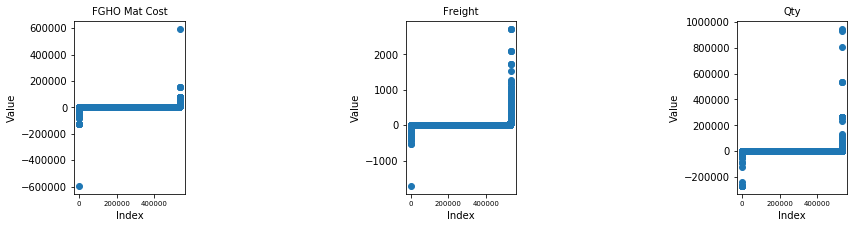

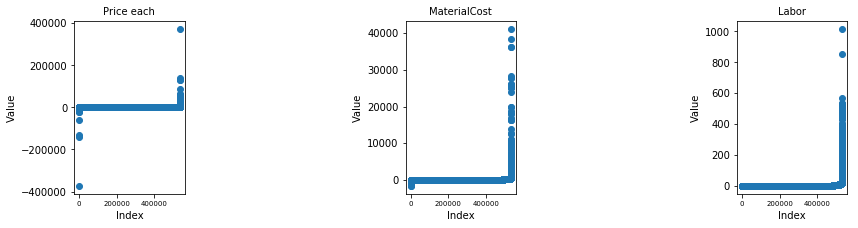

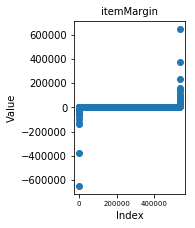

In [30]:
# Verify all float values
list_include = ['float64','int64']
i=1
for col in salesTs_df.select_dtypes(include=list_include).columns:
    if i<=3:
        #plt.figure(figsize=(10,4))
        plt.subplot(1,3,i)
        plt.scatter(range(salesTs_df.shape[0]),np.sort(salesTs_df[col].values))
        plt.xlabel('Index', size=10)
        plt.title(col, size=10)
        plt.ylabel('Value', size=10)
        plt.xticks(size=7)
        i = i + 1
    else:
                
        plt.subplots_adjust(top=1, bottom=0.4, left=0.01, right=1.8, hspace=0.25, wspace=2)
        plt.show()
        
        i=1
        plt.subplot(1,3,i)
        plt.scatter(range(salesTs_df.shape[0]),np.sort(salesTs_df[col].values))
        plt.xlabel('Index', size=10)
        plt.title(col, size=10)
        plt.ylabel('Value', size=10)
        plt.xticks(size=7)
        i = i + 1
        
        
        

plt.subplots_adjust(top=1, bottom=0.4, left=0.01, right=1.8, hspace=0.25, wspace=2)
plt.show() 

#### Correlation Matrix

It can be observed that there is a positve correation between _Price each_ and _MaterialCost_. All other variables seem to be independent of each other.  
There there are some outliers in the data that may skew some of the results if used as part of the analysis. 

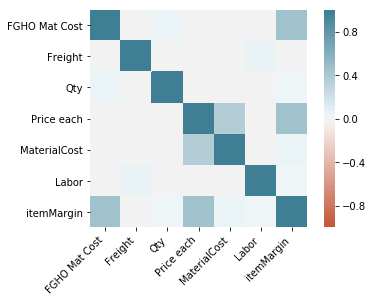

In [31]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

data = salesTs_df.copy()

corr = data.corr()
ax = seaborn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=seaborn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

#### Scatter Matrix
This scatter matrix shows in many cases that the variables are independent of each other. This is in line with the previous heat map. However, there is a need to understand if some of these variables can be the basis for a new feature. For example costs, can be the addition of _Freight, MaterialCosts, and Labor_ if this were to be of interest.

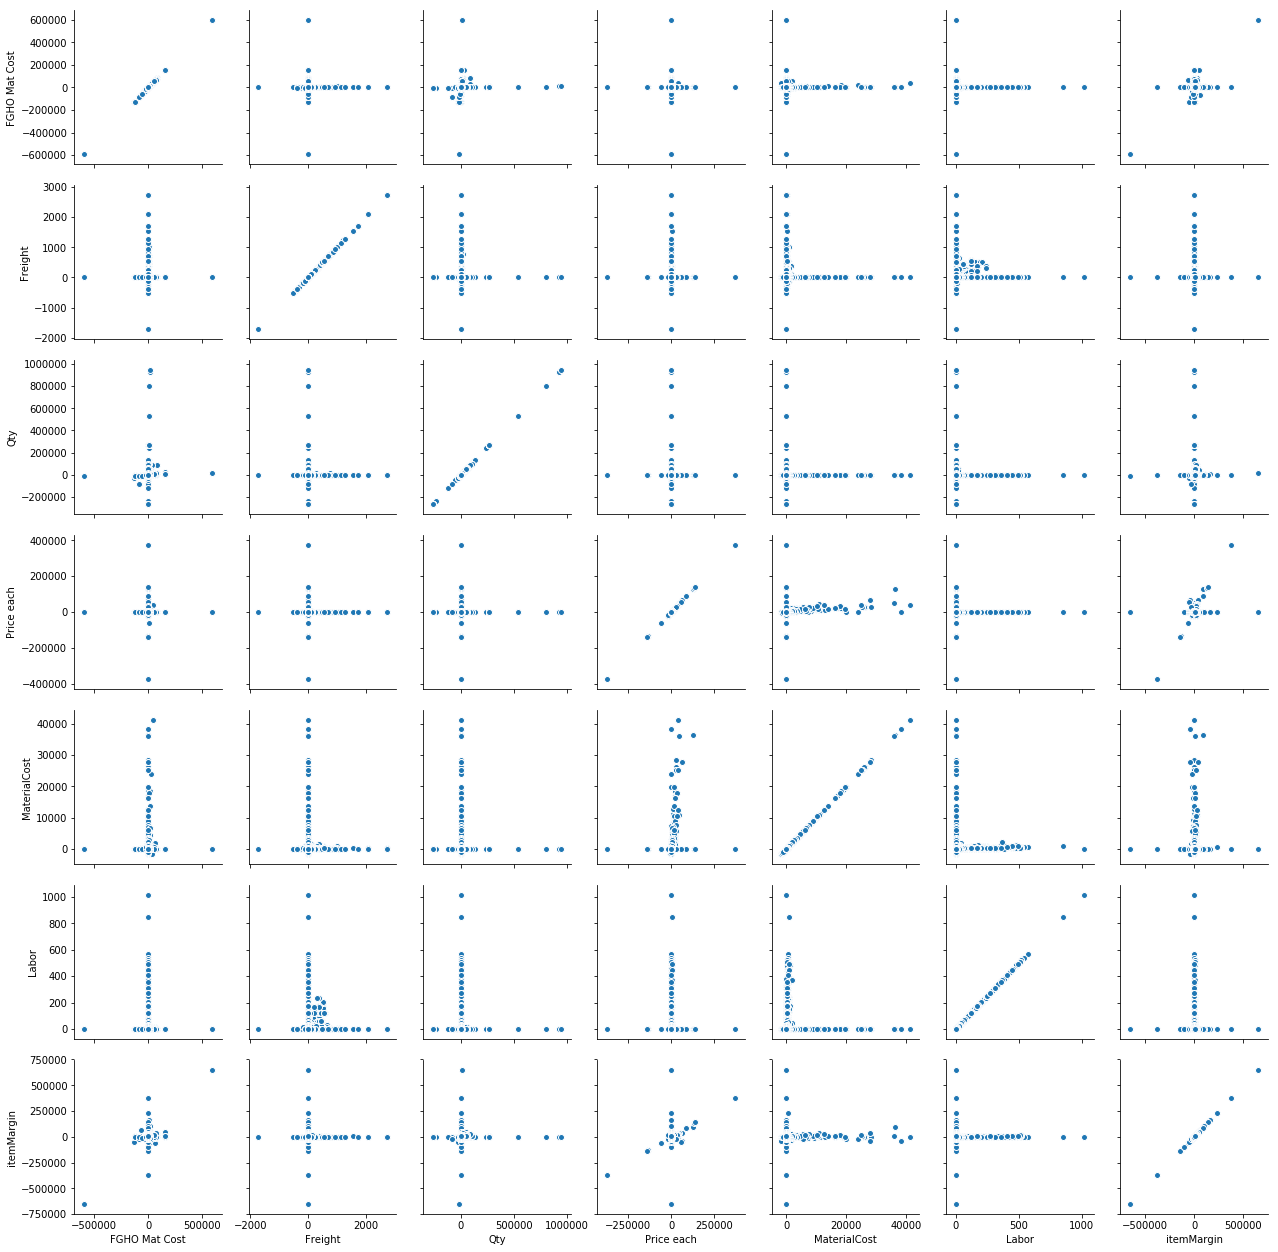

In [33]:
# Basic correlogram
data=data.dropna(how='all')
seaborn.pairplot(data[['FGHO Mat Cost','Freight','Qty','Price each', 'MaterialCost','Labor', 'itemMargin']], diag_kind=None)
#plt.show()


#### Histograms
The histograms show large outliers in each of the variables. The majority of the values are concentrated in the hundred range.

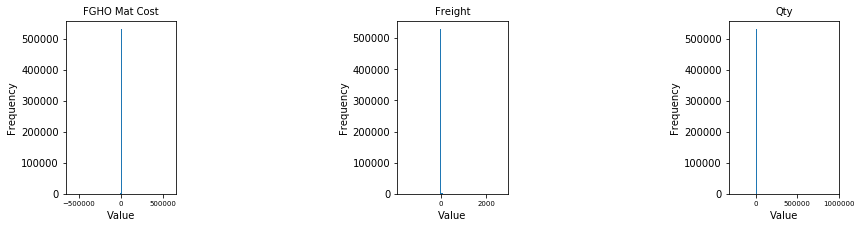

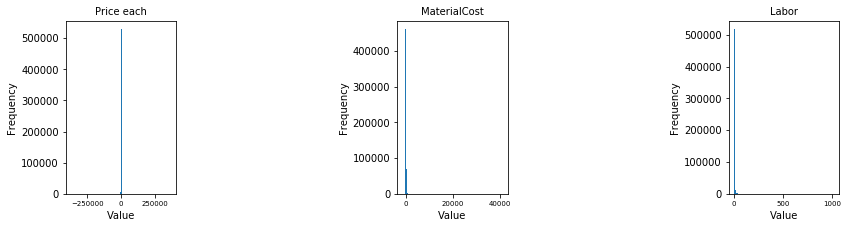

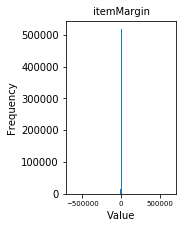

In [34]:
# Verify all float values
list_include = ['float64','int64']
i=1
for col in salesTs_df.select_dtypes(include=list_include).columns:
    if i<=3:
        #plt.figure(figsize=(10,4))
        plt.subplot(1,3,i)
        plt.hist(x=salesTs_df[col].dropna().values, bins=100)
        plt.xlabel('Value', size=10)
        plt.title(col, size=10)
        plt.ylabel('Frequency', size=10)
        plt.xticks(size=7)
        i = i + 1
    else:
                
        plt.subplots_adjust(top=1, bottom=0.4, left=0.01, right=1.8, hspace=0.25, wspace=2)
        plt.show()
        
        i=1
        plt.subplot(1,3,i)
        plt.hist(x=salesTs_df[col].dropna().values, bins=100)
        plt.xlabel('Value', size=10)
        plt.title(col, size=10)
        plt.ylabel('Frequency', size=10)
        plt.xticks(size=7)
        i = i + 1
        
        
        

plt.subplots_adjust(top=1, bottom=0.4, left=0.01, right=1.8, hspace=0.25, wspace=2)
plt.show() 

### Missing Values

There are no considerable number of missing values in the _Ship Date_, _Price each_,or _Qty_ columns that would need estimation.

In [35]:
# Missing Values
dtype_df=salesTs_df.dtypes.reset_index()
dtype_df.columns=["Count","ColumnType"]
dtype_df.groupby("ColumnType").aggregate('count').reset_index()
missing_df=salesTs_df.isnull().sum(axis=0).reset_index()
missing_df.columns=['ColumnName','MissingCount']
missing_df=missing_df.ix[missing_df['MissingCount']>0]
missing_df=missing_df.sort_values(by='MissingCount')

missing_df = missing_df.merge(dtype_df,left_on = 'ColumnName', right_on = 'Count', how= 'left')
missing_df

D:\Masters\Anaconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


ColumnName  MissingCount          Count ColumnType
0         Freight             1        Freight    float64
1        Location             1       Location     object
2       Ship Date             1      Ship Date     object
3      itemMargin             2     itemMargin    float64
4           Labor             2          Labor    float64
5       HT Lumber             2      HT Lumber     object
6    MaterialCost             2   MaterialCost    float64
7      Price each             2     Price each    float64
8            FGHO             2           FGHO     object
9             SRV             2            SRV     object
10            Qty             2            Qty    float64
11  Customer Name             3  Customer Name     object
12    Description             7    Description     object
13        Master#            66        Master#     object
14  Price Descrip           180  Price Descrip     object
15   Ship Address           906   Ship Address     object
16            BOL          1526            BOL     object
17   Invoice Type          8844   Invoice Type     object
18            SO#         82150            SO#     object
19   Ship Zipcode         83610   Ship Zipcode     object
20   Release Type        359015   Release Type     object

### Trend Summary  
This section will explore the trend in sales, material quantities, and orders count. There are some observation that need to be remove along the analysis due wrong dates and negative sales. 
_The removed records would need to be validated_

In [36]:
# Order Sum by day

## Time Series for Price each and Qty

priceTs_df = salesTs_df[['Ship Date',
                        'Price each',
                        'itemMargin',
                        'Qty']]

priceTs_df['Ship Date'] =  pd.to_datetime(priceTs_df['Ship Date'])

order_sum_df=priceTs_df.groupby(['Ship Date']).agg(['sum','count']).reset_index().sort_values(by=(['Ship Date']))
sales_sum_df=order_sum_df.set_index('Ship Date')

sales_sum_df['Year'] = sales_sum_df.index.year
sales_sum_df['Month'] = sales_sum_df.index.month
sales_sum_df['WeekdayName'] = sales_sum_df.index.weekday_name
sales_sum_df.head()

D:\Masters\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Price each       itemMargin             Qty        Year Month  \
                  sum count        sum count       sum count               
Ship Date                                                                  
2000-03-01       2.10     1    295.200     1     240.0     1  2000     3   
2001-04-29      22.46     1     23.720     1      10.0     1  2001     4   
2008-11-26       0.25     1     40.500     1     162.0     1  2008    11   
2009-01-04      55.00     1   2200.000     1      40.0     1  2009     1   
2009-01-05    4392.80   133  43028.573   133  151333.0   133  2009     1   

           WeekdayName  
                        
Ship Date               
2000-03-01   Wednesday  
2001-04-29      Sunday  
2008-11-26   Wednesday  
2009-01-04      Sunday  
2009-01-05      Monday

In [37]:
## Remove dates outside the range provided in the data
sales_sum_df = sales_sum_df[(sales_sum_df.index >= '2009-1-1') & (sales_sum_df.index <= '2018-12-31')]

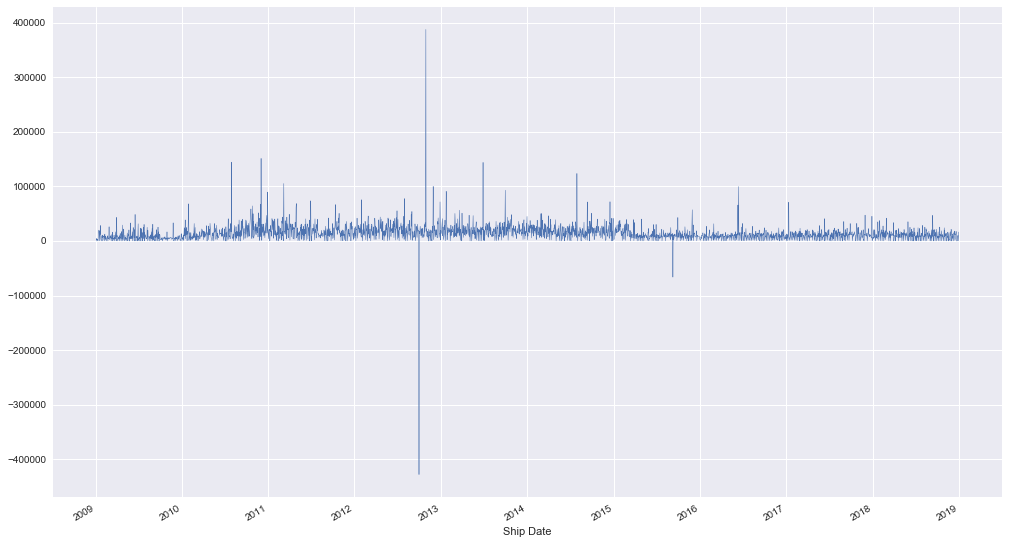

In [38]:
seaborn.set(rc={'figure.figsize':(17, 10)})
sales_sum_df['Price each','sum'].plot(linewidth=0.5);

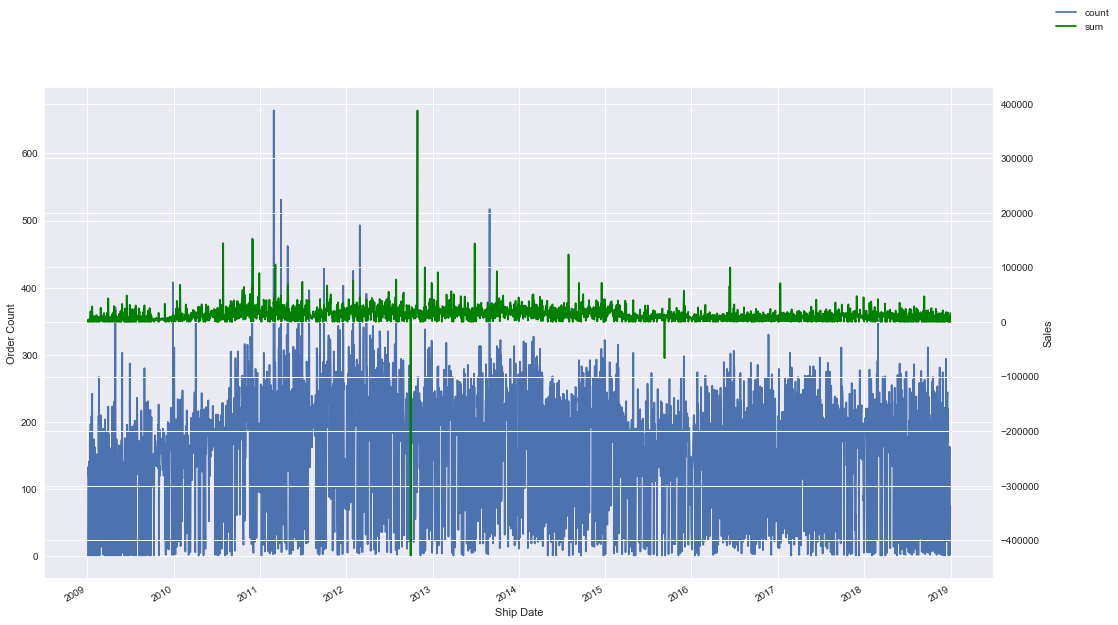

In [39]:
ax = sales_sum_df['Price each'].plot(y='count', legend=False)
ax2 = ax.twinx()
sales_sum_df['Price each'].plot(y="sum", ax=ax2, legend=False, color="g")
ax.figure.legend()
ax.set_ylabel('Order Count');
ax2.set_ylabel('Sales');

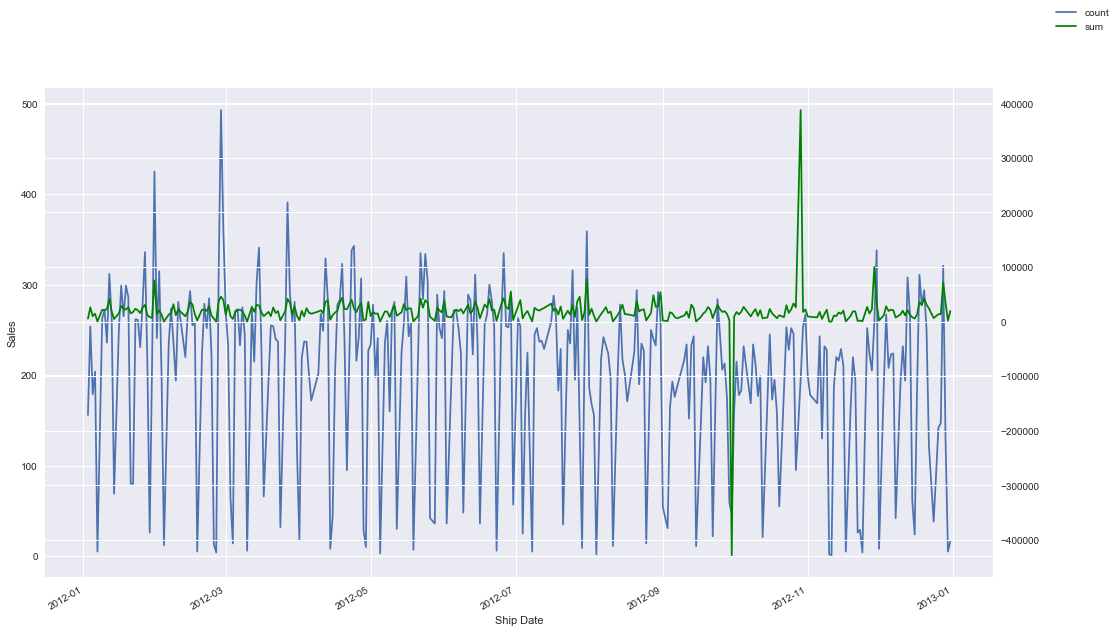

In [40]:
ax = sales_sum_df.loc['2012','Price each'].plot(y='count', legend=False)
ax2 = ax.twinx()
sales_sum_df.loc['2012','Price each'].plot(y='sum', ax=ax2, legend=False, color="g")
ax.figure.legend()
ax.set_ylabel('Sales');

In [41]:
sales_sum_df[sales_sum_df['Price each','sum'] > 300000]

Price each        itemMargin            Qty        Year Month  \
                  sum count         sum count      sum count               
Ship Date                                                                  
2012-10-29  387463.65   195  457302.349   195  24568.0   195  2012    10   

           WeekdayName  
                        
Ship Date               
2012-10-29      Monday

In [42]:
sales_sum_df[sales_sum_df['Price each','sum'] < 0]

Price each        itemMargin              Qty        Year Month  \
                    sum count         sum count        sum count               
Ship Date                                                                      
2012-09-30 -427899.3800    47 -50855.2500    47    6881.59    47  2012     9   
2015-09-09  -66254.1625   211  86042.6065   211  126666.00   211  2015     9   

           WeekdayName  
                        
Ship Date               
2012-09-30      Sunday  
2015-09-09   Wednesday

In [43]:
## Remove the dates with issues. Given the case that these records are valid, then this piece of code should be removed
sales_sum_df=sales_sum_df[sales_sum_df['Price each','sum'] < 300000]

sales_sum_df=sales_sum_df[sales_sum_df['Price each','sum'] > 0]

#### Plot - Total of Sales and Number of orders

This plot is difficult to follow since are daily values. It can still be seen that the trends follow each other. Monthly aggregate plots can give a better sense of how these two variables follow each other.

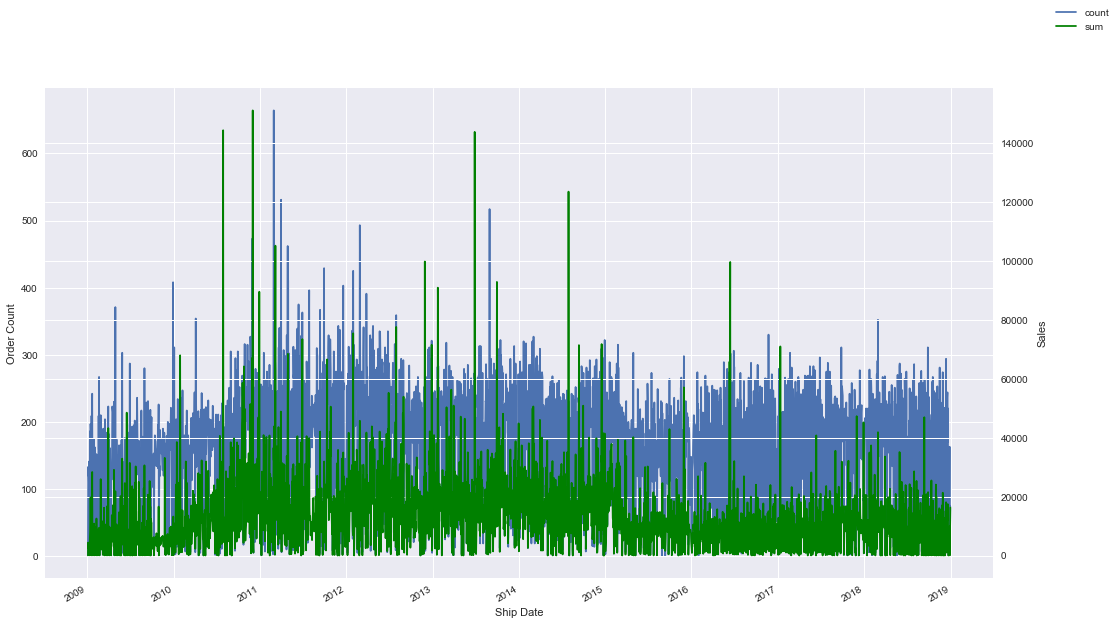

In [44]:
ax = sales_sum_df['Price each'].plot(y='count', legend=False)
ax2 = ax.twinx()
sales_sum_df['Price each'].plot(y="sum", ax=ax2, legend=False, color="g")
ax.figure.legend()
ax.set_ylabel('Order Count');
ax2.set_ylabel('Sales');

**Total Quantity plot vs Total Orders**  
_The plot shows negative quantities. Does this means that these are returns?_ 

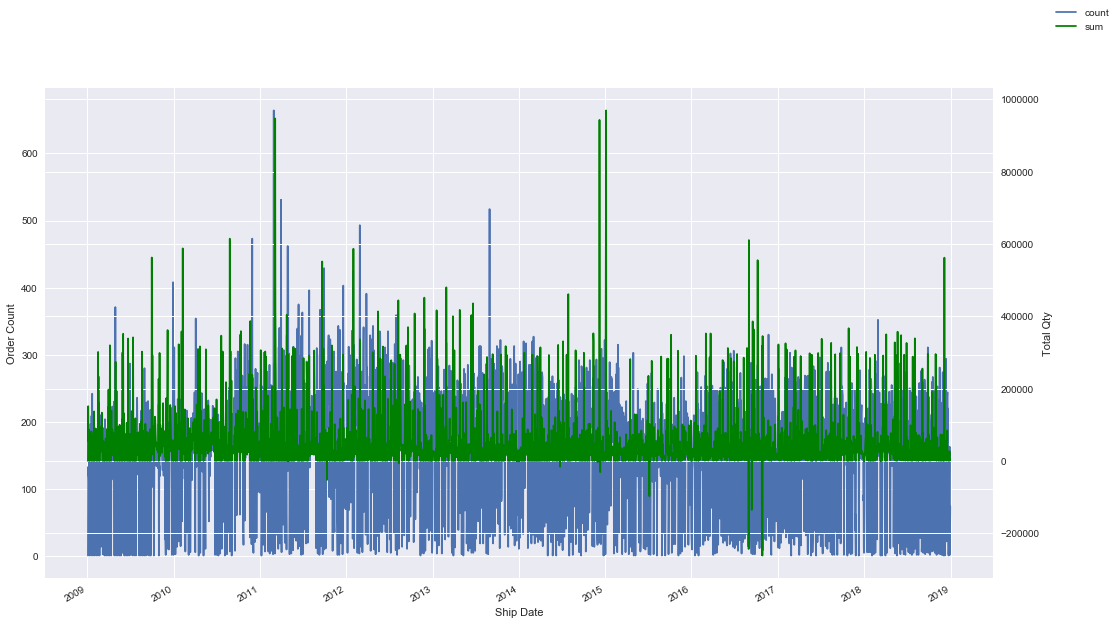

In [45]:
ax = sales_sum_df['Qty'].plot(y='count', legend=False)
ax2 = ax.twinx()
sales_sum_df['Qty'].plot(y="sum", ax=ax2, legend=False, color="g")
ax.figure.legend()
ax.set_ylabel('Order Count');
ax2.set_ylabel('Total Qty');

**Total Margin vs Total Orders** 

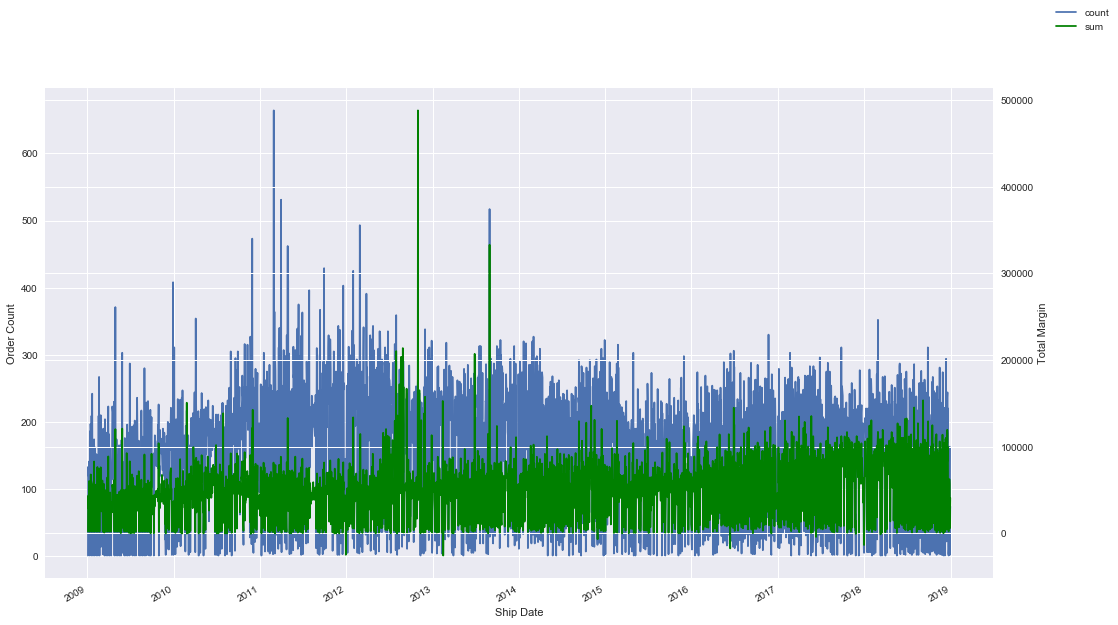

In [46]:
ax = sales_sum_df['itemMargin'].plot(y='count', legend=False)
ax2 = ax.twinx()
sales_sum_df['itemMargin'].plot(y="sum", ax=ax2, legend=False, color="g")
ax.figure.legend()
ax.set_ylabel('Order Count');
ax2.set_ylabel('Total Margin');

#### Correlation between Price and Quantity

The Price and Quantity variables are positive correlated. The more Quantity is sold the more the total price or revenue. Also,  the correlation between order count and revenue is present as expected. 

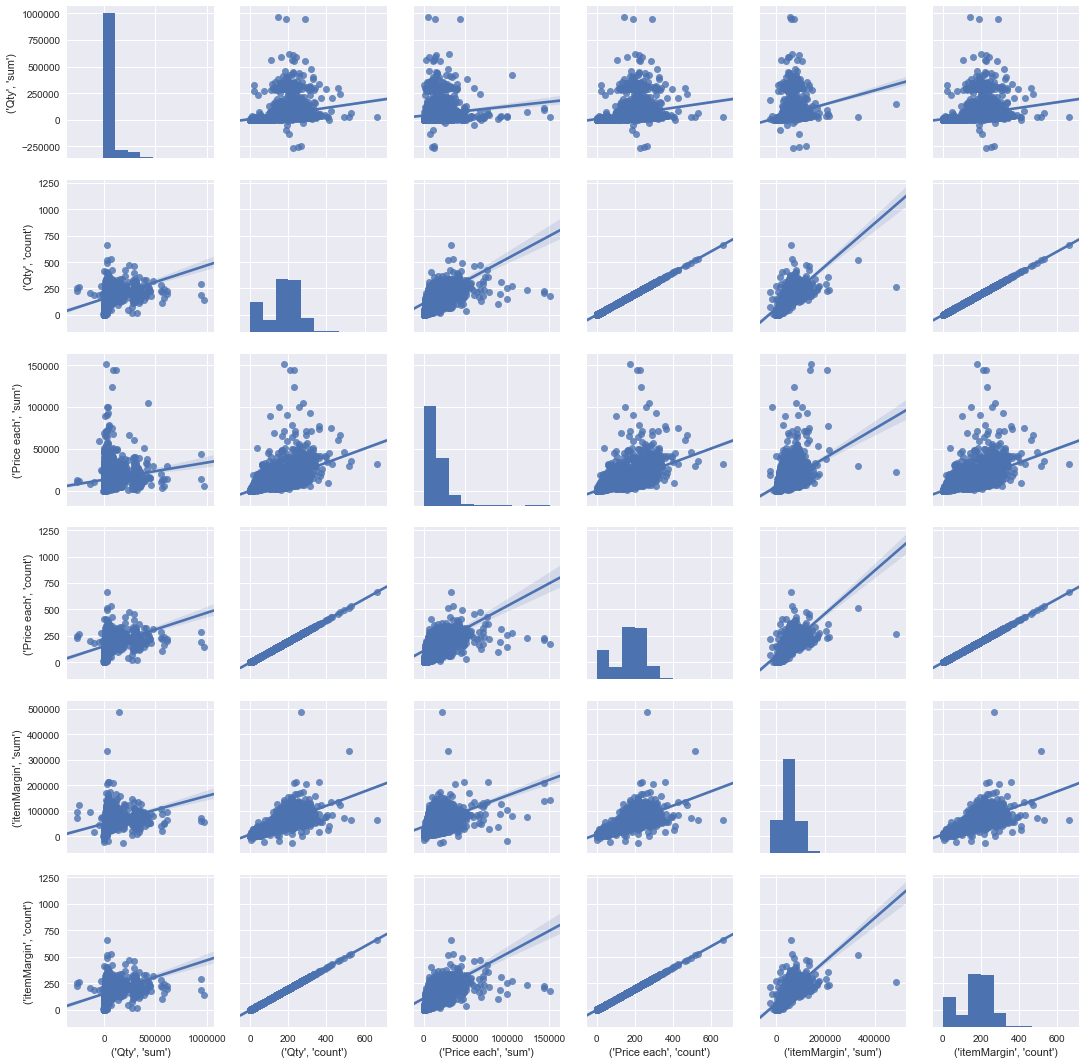

In [47]:
# Basic correlogram
data=sales_sum_df.dropna(how='all')
seaborn.pairplot(data[['Qty','Price each','itemMargin']], diag_kind='hist', kind='reg')
#plt.show()

### Monthly Aggregate

#### Quantity and Sales over time  

The quantities trend starts a downtrend before reaching around 2011. However, the sales remain stable during this downward trend in quantities, which may suggest lower quantities of more expensive packaging sales.  

In [49]:
y = sales_sum_df['Price each'].resample('MS').sum()
y2=sales_sum_df['Qty'].resample('MS').sum()
y3=sales_sum_df['itemMargin'].resample('MS').sum()

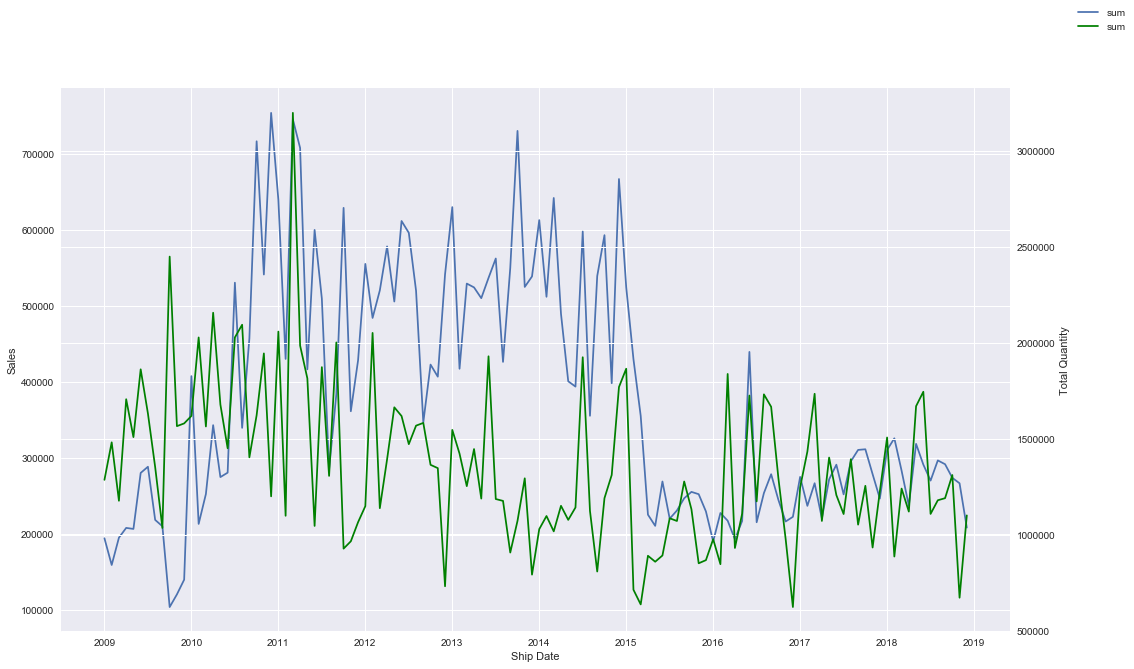

In [50]:
ax = y.plot(y='sum', legend=False)
ax2 = ax.twinx()
y2.plot(y="sum", ax=ax2, legend=False, color="g")
ax.figure.legend()
ax.set_ylabel('Sales');
ax2.set_ylabel('Total Quantity');

#### Margin Over Time

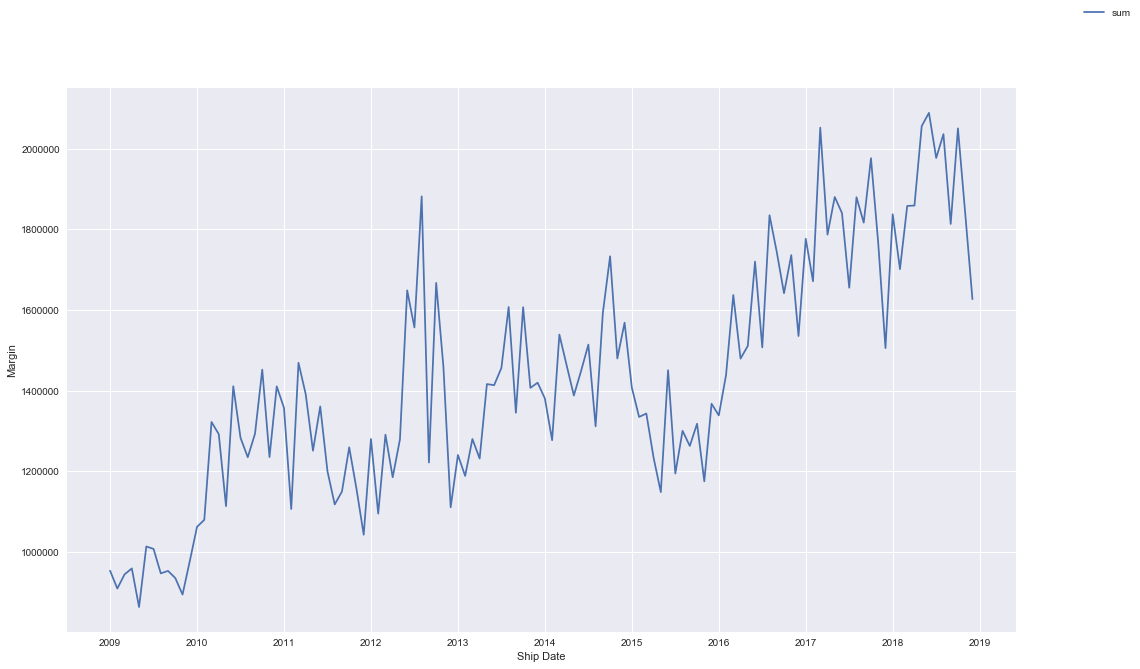

In [51]:
ax = y3.plot(y='sum', legend=False)
ax.figure.legend()
ax.set_ylabel('Margin');

### Decomposition of the trend


#### This is for the split for the monthly total orders  
The number of orders reached its peak around mid-2011, since then there has been a downward trend in the number of orders of materials for packaging, reaching its lowest point on mid-2015, since then it has to a 50 % of what was in 2011.

D:\Masters\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


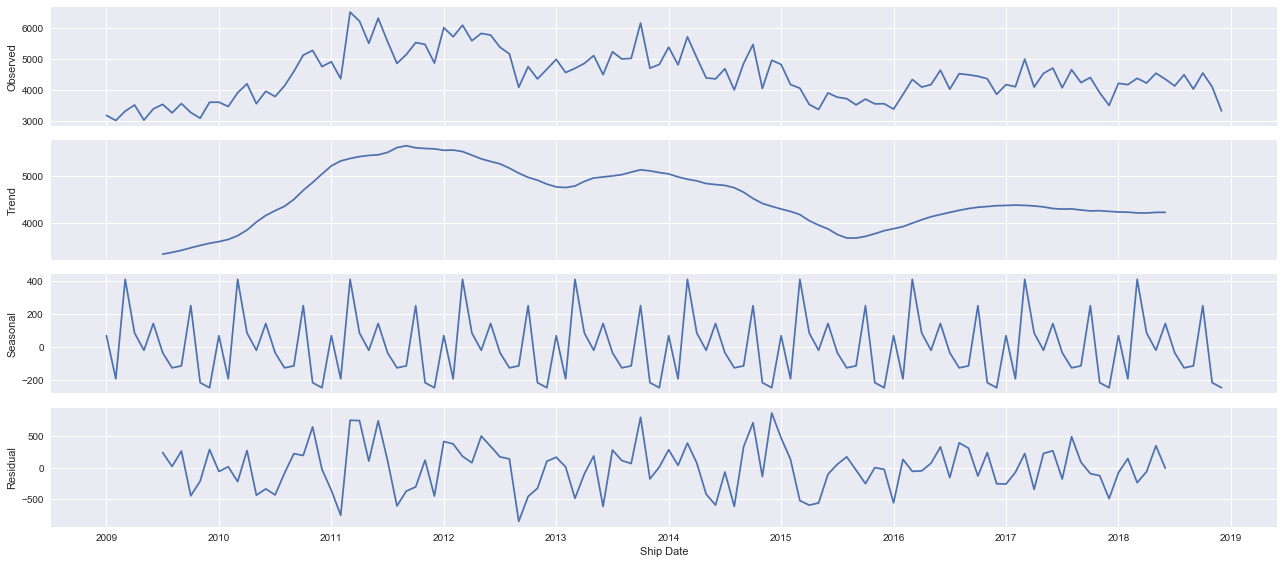

In [53]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y['count'], model='additive')
fig = decomposition.plot()
plt.show()

#### Split for the Sales Variable (Price each)
The sales revenue peaked at the end of 2011. During next three years and a half the trend remained flat until mid-2014 when the sales revenue started to tren down, it reached its lowest point at the end of 2015, and the recovery has been slow, but constant. However, the number of orders has maintained constant, which indicates an increase in prices or the orders includes sophisticated, more expensive packages.

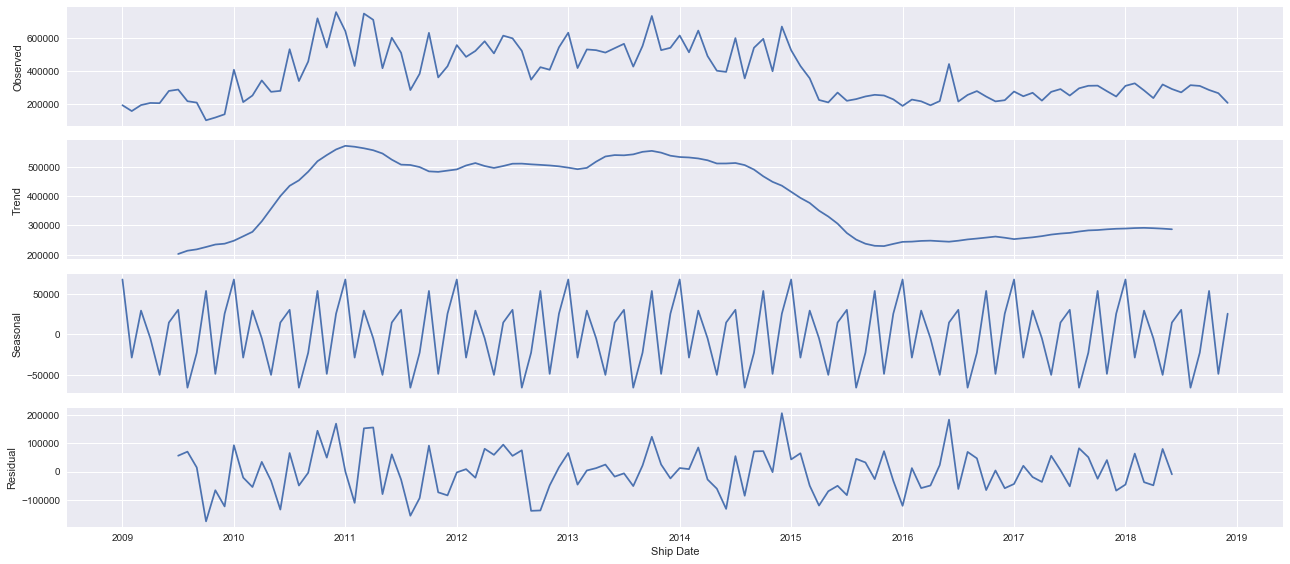

In [31]:

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y['sum'], model='additive')
fig = decomposition.plot()
plt.show()

#### This is the split for the total monthly quantities
The monthly quantities showed a downward trend from 2011 until mid-2015 when the trend started to pick up until the end of 2016. Since 2016 the monthly quantities trend has been flat. Also, the residual or random component has maintained the variability under control since 2016.
On the seasonality shows a decrease in quantities at the end of each year and picking up the highest number of material in the first and second quarters.

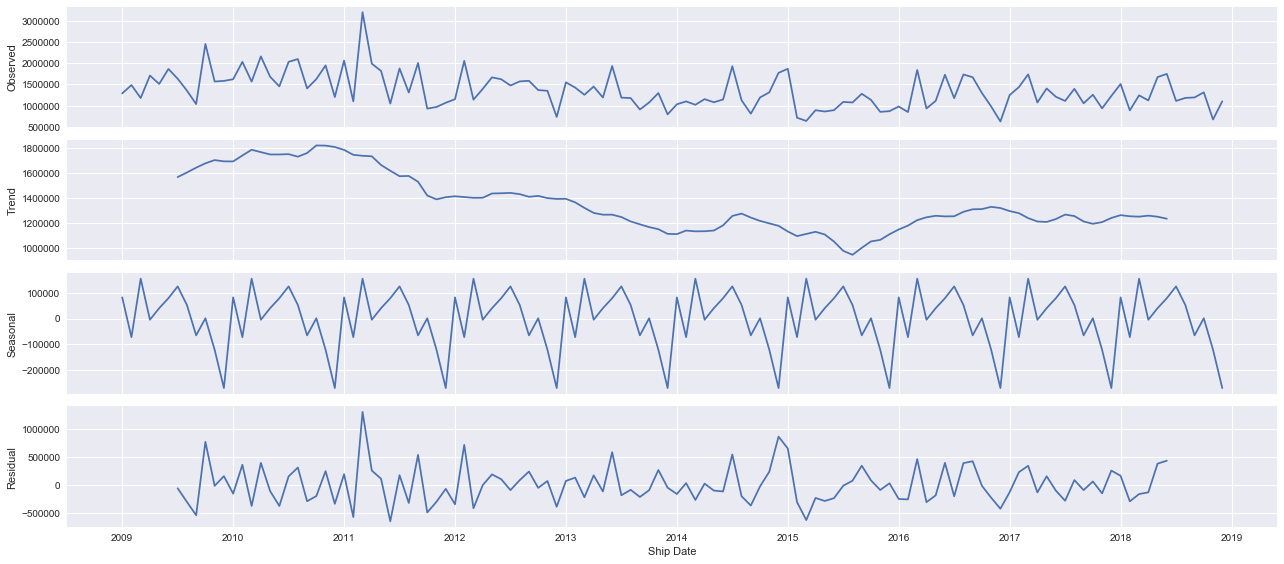

In [54]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y2['sum'], model='additive')
fig = decomposition.plot()
plt.show()

#### This is the split for the Margins over time

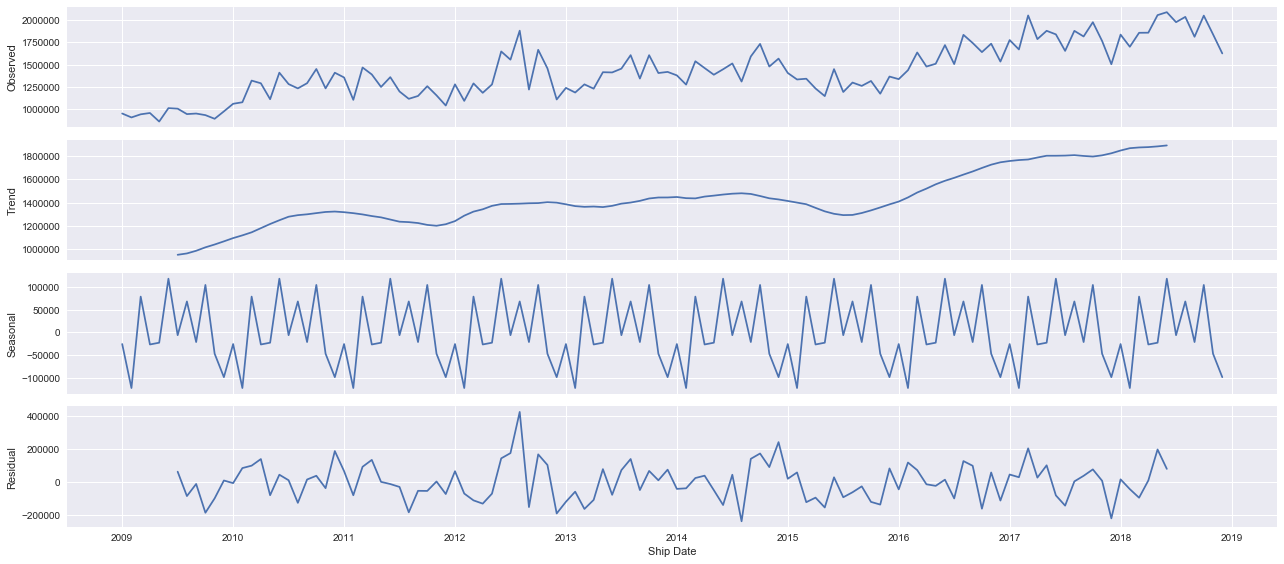

In [55]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y3['sum'], model='additive')
fig = decomposition.plot()
plt.show()

### Customer Trends

In [56]:
customerTs_df = salesTs_df[['Ship Date',
                        'Customer#',
                        'Price each',
                        'itemMargin',
                        'Qty']]
customerTs_df['Ship Date'] = pd.to_datetime(customerTs_df['Ship Date'])

D:\Masters\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [102]:
customerTs_df=customerTs_df.set_index('Ship Date')
## Remove dates outside the range provided in the data
customerTs_df = customerTs_df[(customerTs_df.index >= '2009-1-1') & (customerTs_df.index <= '2018-12-31')]

In [103]:
customerTs_df.head()

Customer#  Price each  itemMargin   Qty
Ship Date                                         
2009-01-04    A15216       55.00     2200.00  40.0
2009-01-05       210       16.43      147.40  20.0
2009-01-05       210       42.52      205.07  10.0
2009-01-05       210      131.93      136.69   2.0
2009-01-05       210      194.00      184.31   2.0

In [104]:
customerTs_df.shape

(534657, 4)

In [105]:
marginByCustomer=customerTs_df.groupby(['Customer#']).sum().reset_index().sort_values(by=(['itemMargin']), ascending=False)
marginByCustomer['runningMargin']=np.cumsum(marginByCustomer['itemMargin'])
marginByCustomer['CdfCustomer'] = 100 * marginByCustomer['runningMargin']/marginByCustomer['itemMargin'].sum()

In [106]:
marginByCustomer

Customer#    Price each    itemMargin          Qty  runningMargin  \
36         210  1.259457e+06  1.923836e+07  72342782.00   1.923836e+07   
51      A15216  1.866203e+07  1.266967e+07     84905.00   3.190803e+07   
530      A1740  8.281784e+05  1.066357e+07   5863244.00   4.257160e+07   
863       K100  1.560772e+05  8.421715e+06   2549186.00   5.099332e+07   
0          100  1.085403e+06  8.001225e+06   4632886.00   5.899454e+07   
998     M16147  4.435233e+05  4.798940e+06    731328.00   6.379348e+07   
903     M15986  8.791391e+05  3.826302e+06    296520.00   6.761978e+07   
44        8120  3.058864e+05  3.796522e+06   2357458.00   7.141630e+07   
66      A15578  8.937968e+05  3.288732e+06    660962.00   7.470504e+07   
968     M16110  5.871149e+05  3.252494e+06   2666399.00   7.795753e+07   
534       A523  8.402133e+05  3.176062e+06    238401.37   8.113359e+07   
1076    W16130  2.611985e+05  2.733995e+06   1091970.00   8.386759e+07   
628     D16028  1.851008e+05  2.246158e+06    449991.00   8.611374e+07   
26       15426  5.541509e+05  2.210230e+06    653151.00   8.832397e+07   
307     A16111  4.202996e+05  2.165249e+06    237223.00   9.048922e+07   
560     D15913  2.194683e+05  2.096779e+06    847990.00   9.258600e+07   
1036    W15763  2.109308e+05  2.002332e+06   1792142.00   9.458833e+07   
1059    W16051  2.133769e+04  1.979517e+06   4566191.00   9.656785e+07   
902     M15978  1.632313e+05  1.960753e+06    410850.00   9.852860e+07   
203     A15979  1.791486e+05  1.915959e+06    629250.00   1.004446e+08   
870       K113  3.476789e+04  1.842457e+06   3874966.00   1.022870e+08   
916     M16026  6.731657e+04  1.601045e+06   3950197.00   1.038881e+08   
7        15014  9.827754e+04  1.582065e+06    237909.00   1.054701e+08   
973     M16115  2.475921e+05  1.521801e+06    261351.00   1.069919e+08   
192     A15966  6.360496e+05  1.459042e+06     60324.00   1.084510e+08   
1180    W16603  5.760768e+04  1.412995e+06   1560845.00   1.098640e+08   
1084    W16193  7.518309e+04  1.383527e+06    694586.00   1.112475e+08   
53      A15295  7.023111e+04  1.294050e+06     20235.00   1.125415e+08   
126     A15849  1.349563e+04  1.206137e+06    391321.00   1.137477e+08   
1006    M16159  2.304394e+05  1.159706e+06     17684.00   1.149074e+08   
...        ...           ...           ...          ...            ...   
415     A16228  1.322000e+01  3.828000e+01        29.00   1.720230e+08   
1243    W16724  5.300000e+01  3.662400e+01         1.00   1.720231e+08   
1122    W16480  2.634000e+01  2.634000e+01         1.00   1.720231e+08   
153     A15906  2.472500e+02  2.465000e+01         5.00   1.720231e+08   
788     D16266  1.720000e+00  1.930000e+01        25.00   1.720231e+08   
711     D16147  1.430000e+02  5.000000e+00         1.00   1.720231e+08   
606     D15990  7.680000e-01  4.975000e+00        25.00   1.720231e+08   
523     A16355  2.800000e+00  1.000000e+00       100.00   1.720231e+08   
115     A15807  1.340000e+03  0.000000e+00         0.00   1.720231e+08   
1088    W16250  0.000000e+00  0.000000e+00     -2535.00   1.720231e+08   
1032      Void  3.500000e-01  0.000000e+00         0.00   1.720231e+08   
486     A16312  9.940000e+01  0.000000e+00         0.00   1.720231e+08   
932     M16052  1.094000e+01  0.000000e+00         0.00   1.720231e+08   
914     M16021  3.400000e-01  0.000000e+00      8665.00   1.720231e+08   
60      A15564  1.277780e+03  0.000000e+00         0.00   1.720231e+08   
86      A15686  4.400000e+02  0.000000e+00         0.00   1.720231e+08   
65      A15576  0.000000e+00  0.000000e+00        65.00   1.720231e+08   
723     D16163  2.000000e+01  0.000000e+00         0.00   1.720231e+08   
891     M15902  5.490000e+01  0.000000e+00         0.00   1.720231e+08   
1260    W16752  1.382000e+01  0.000000e+00         0.00   1.720231e+08   
100     A15759  2.623580e+03 -1.136868e-13         0.00   1.720231e+08   
1129    W16494  1.574000e+01 -5.999700e+01       543.00   1.720231e+08   
910     M

** 5 % (63 customers)  of the total customer (1284) contribute to 80 % of the total margin **

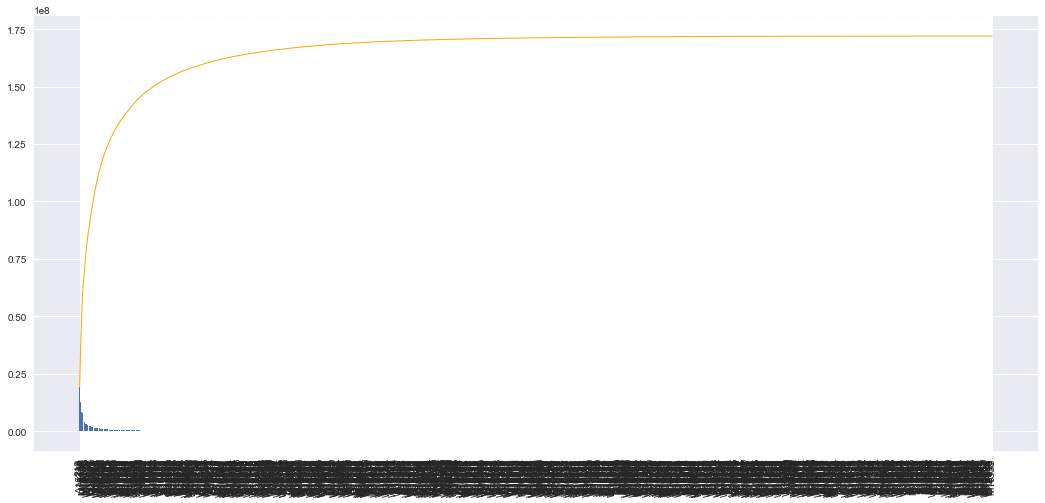

In [203]:
y=marginByCustomer
plt.xticks(rotation='vertical')
plt.bar(y['Customer#'].values ,y['itemMargin'].values )
plt.plot(y['Customer#'].values ,y['runningMargin'].values, color='orange', linewidth=1 )

<BarContainer object of 63 artists>

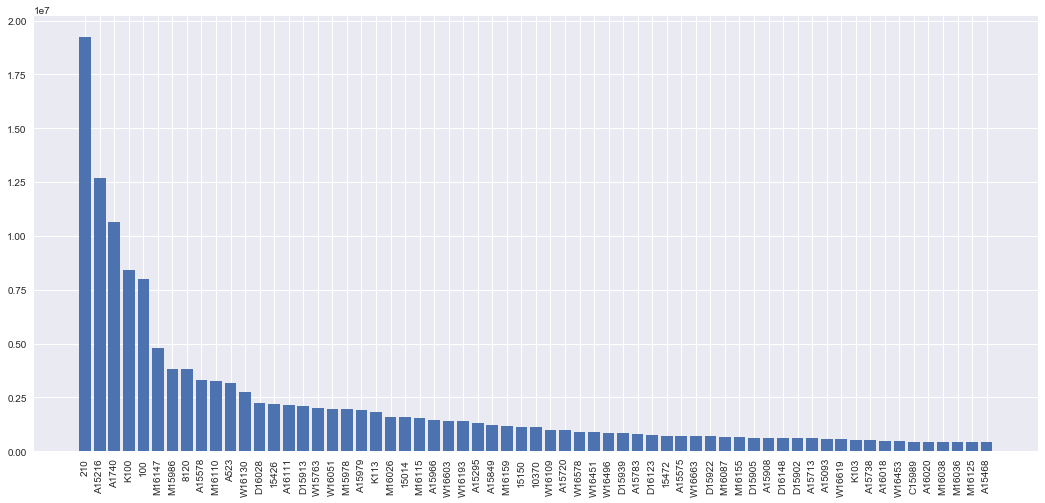

In [107]:
y=marginByCustomer[marginByCustomer['CdfCustomer'] <= 80]
plt.xticks(rotation='vertical')
plt.bar(y['Customer#'].values ,y['itemMargin'].values )


In [108]:
topCustomersTs_df=customerTs_df[customerTs_df['Customer#'].isin(y['Customer#'])]

In [109]:
topCustomersTs_df.shape

(456875, 4)

In [156]:
topCustomersTsAgg_df=topCustomersTs_df.groupby(['Ship Date','Customer#']).sum().reset_index().sort_values(by=(['Ship Date']), ascending=False)
topCustomersTsAgg_df['Ship Date'] = pd.to_datetime(topCustomersTsAgg_df['Ship Date'])

In [157]:
topCustomersTsAgg_df=topCustomersTsAgg_df.set_index('Ship Date')
topCustomersTsAgg_df['Year'] = topCustomersTsAgg_df.index.year
topCustomersTsAgg_df['Month'] = topCustomersTsAgg_df.index.month
topCustomersTsAgg_df['WeekdayName'] = topCustomersTsAgg_df.index.weekday_name
topCustomersTsAgg_df=topCustomersTsAgg_df.reset_index()
topCustomersTsAgg_df.head()

Ship Date Customer#  Price each  itemMargin     Qty  Year  Month  \
0 2018-12-31    W16130       25.54    1101.060   310.0  2018     12   
1 2018-12-31    A15783       41.70     368.950    10.0  2018     12   
2 2018-12-31       100        8.48      59.060    55.0  2018     12   
3 2018-12-31    A15578     1501.76    8907.341  1216.0  2018     12   
4 2018-12-31    A15738      243.22    1520.388    80.0  2018     12   

  WeekdayName  
0      Monday  
1      Monday  
2      Monday  
3      Monday  
4      Monday

In [158]:
#table = pivot_table(df, values='D', index=['A', 'B'],
#...                     columns=['C'], aggfunc=np.sum)
topCustomersTable = pd.pivot_table(topCustomersTsAgg_df, values='itemMargin',index=['Year','Month'],columns=['Customer#'])

In [162]:
topCustomersTable=topCustomersTable.reset_index()
topCustomersTable.head()

Customer#  index  Year  Month          100        10370        15014  \
0              0  2009      1  2598.063474   637.597000  1155.443333   
1              1  2009      2  2546.342600   767.025800  1816.231667   
2              2  2009      3  2404.486045  1082.629818   659.378000   
3              3  2009      4  2037.710682   946.770333  1370.765833   
4              4  2009      5  1939.210400  1183.039111  1286.281000   

Customer#     15150       15426        15472          210   ...    W16109  \
0          1017.397  780.295571  1453.268750  5023.928333   ...    9560.0   
1           910.412  755.819333  1581.267167  3036.713800   ...    9000.0   
2           839.720  790.518389  1388.927143  2883.338526   ...    4500.0   
3           895.070  808.137000  1078.969500  2634.562571   ...    9000.0   
4          1092.375  884.347813   743.460500  3612.611200   ...       NaN   

Customer#  W16130     W16193       W16451       W16453    W16496  W16578  \
0             NaN  1944.2950  3235.202500  1352.701333       NaN     NaN   
1             NaN  3633.3475  2431.365000   884.541333       NaN     NaN   
2             NaN  3366.3444  3384.798333  2042.601500  1499.520     NaN   
3             NaN  2732.7580  3626.073333  2726.158000   605.625     NaN   
4             NaN  2292.0920  2331.782500   472.581667       NaN     NaN   

Customer#  W16603  W16619  W16663  
0             NaN     NaN     NaN  
1             NaN     NaN     NaN  
2             NaN     NaN     NaN  
3             NaN     NaN     NaN  
4             NaN     NaN     NaN  

[5 rows x 66 columns]

#### Top Customer Margin Plot

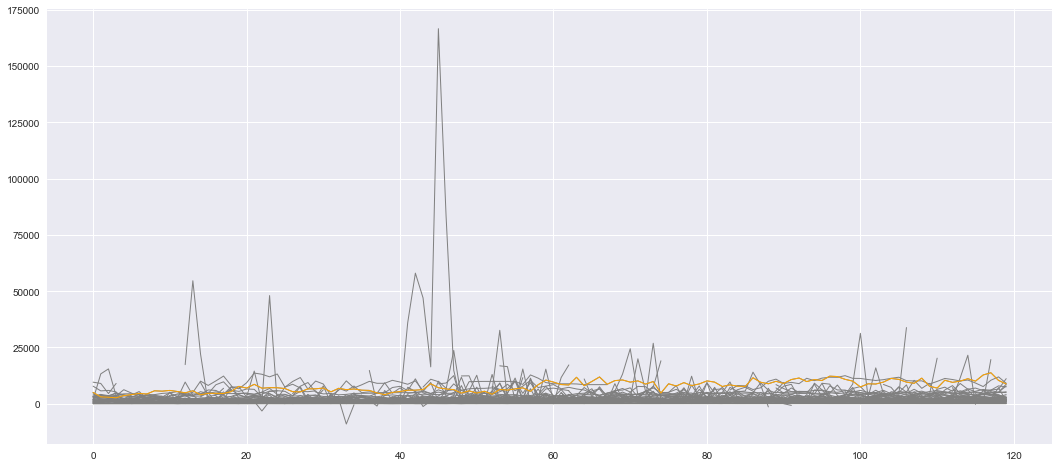

In [163]:
# multiple line plot
for column in topCustomersTable:
    plt.plot(topCustomersTable.index, topCustomersTable[column], marker='', color='grey', linewidth=1)


plt.plot(topCustomersTable.index, topCustomersTable['210'],marker='', color='orange', linewidth=1)

** Individual Margin Plots by Customer **

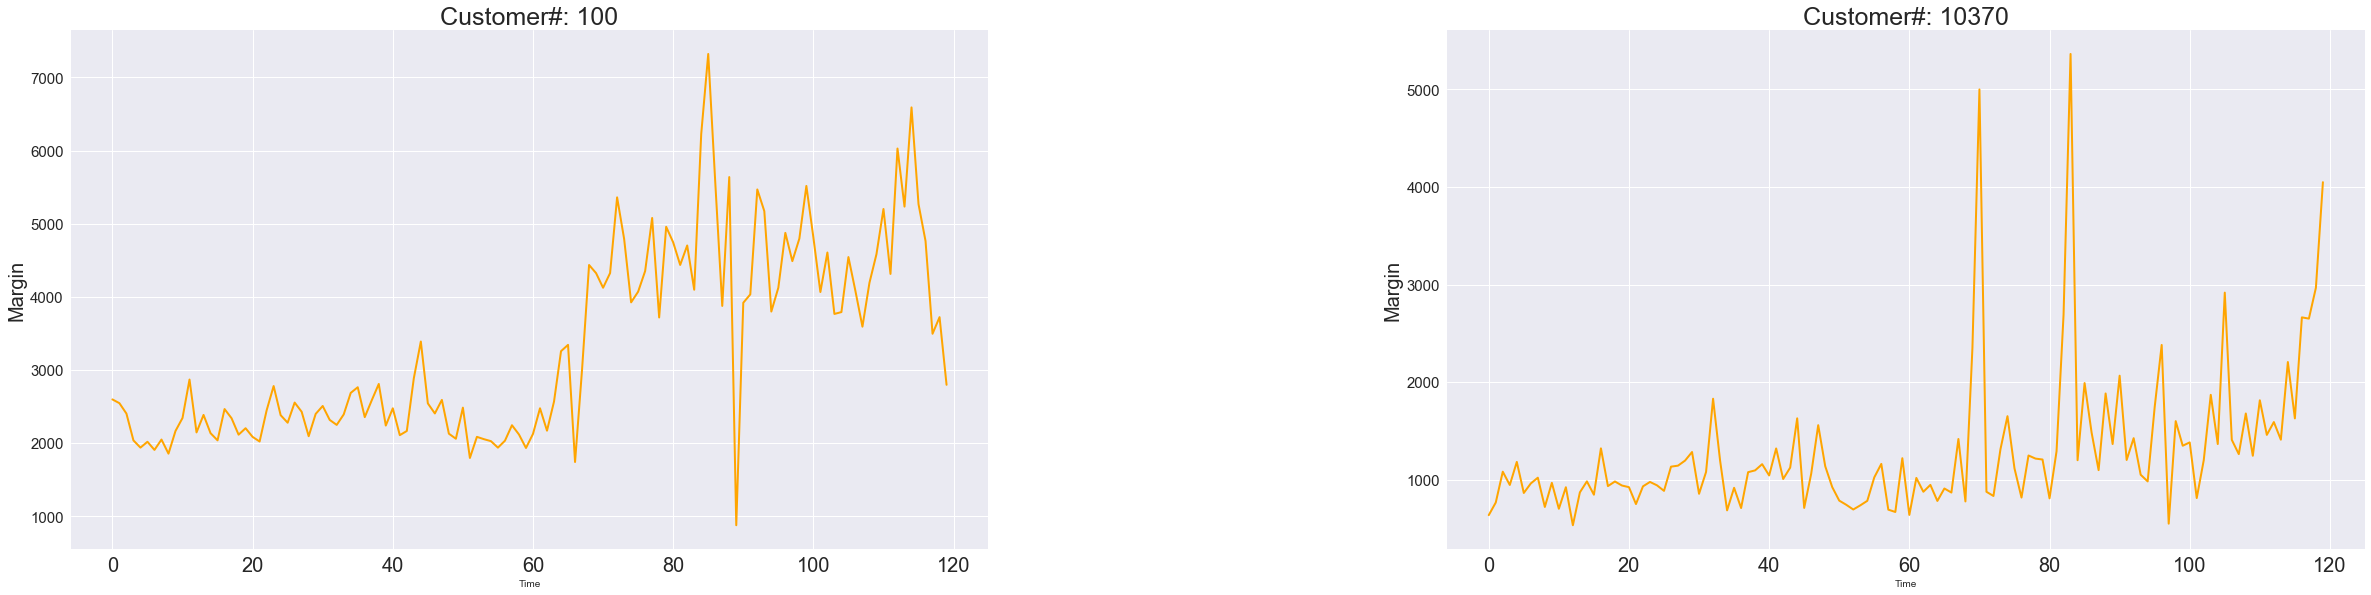

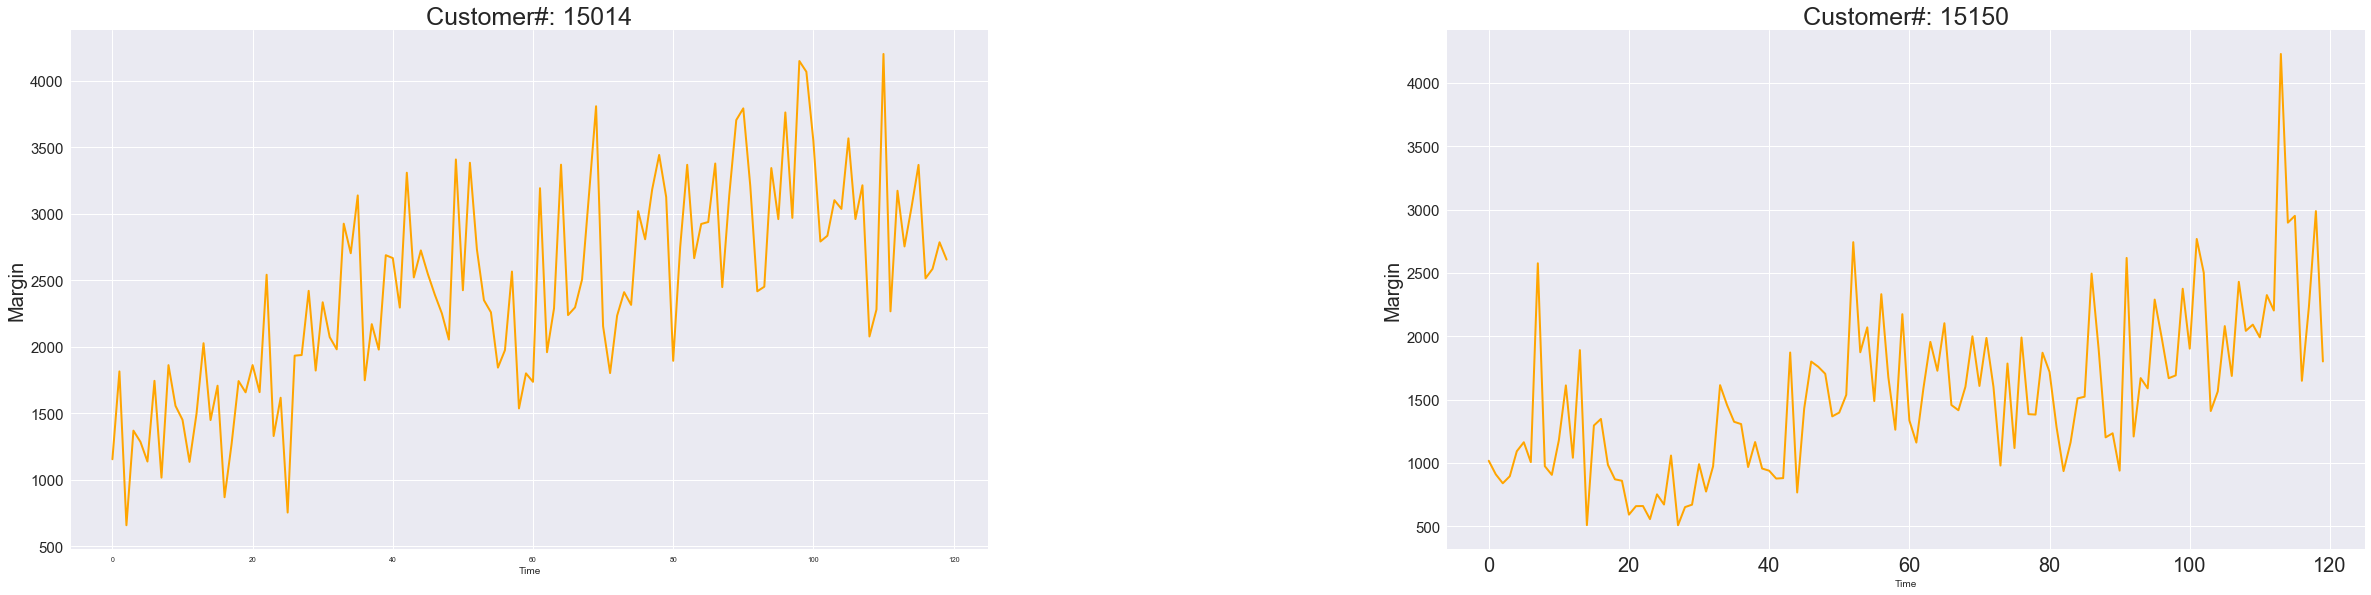

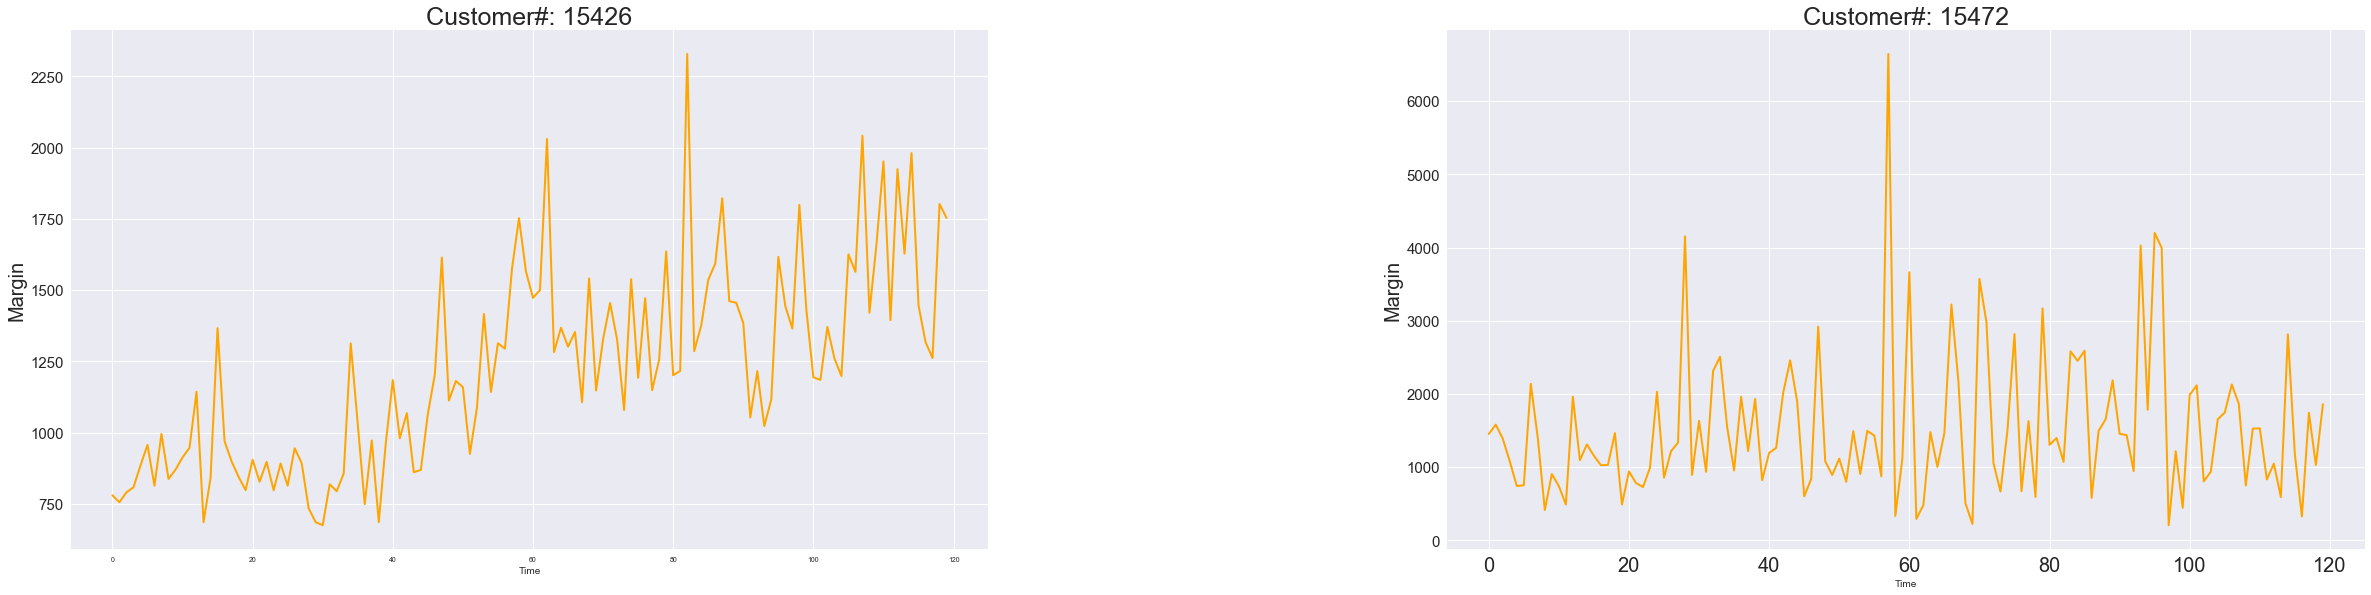

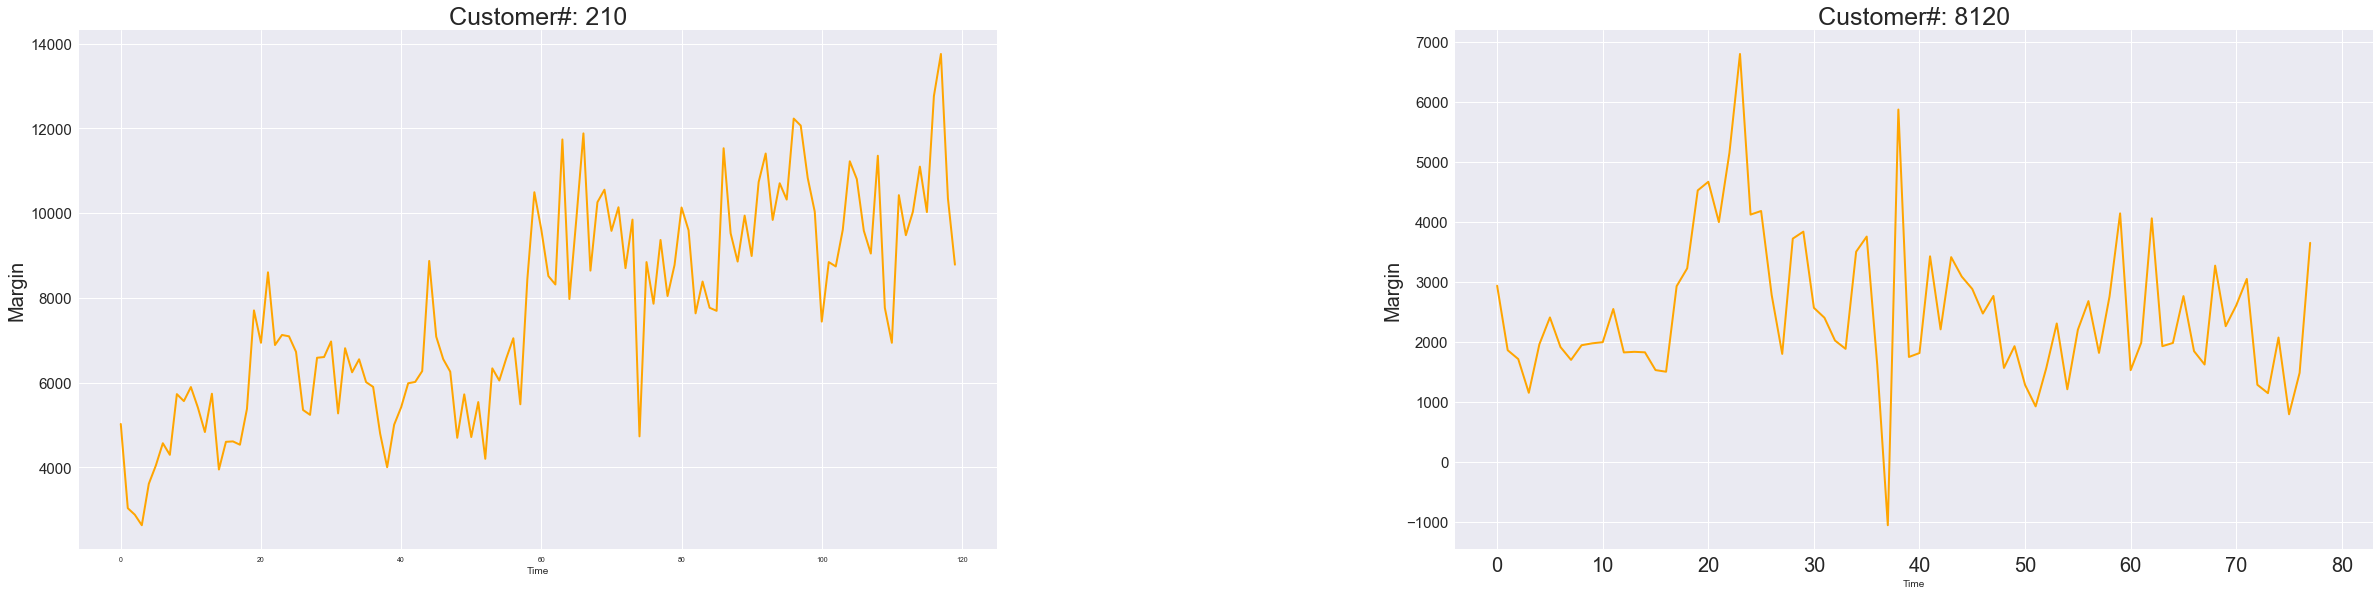

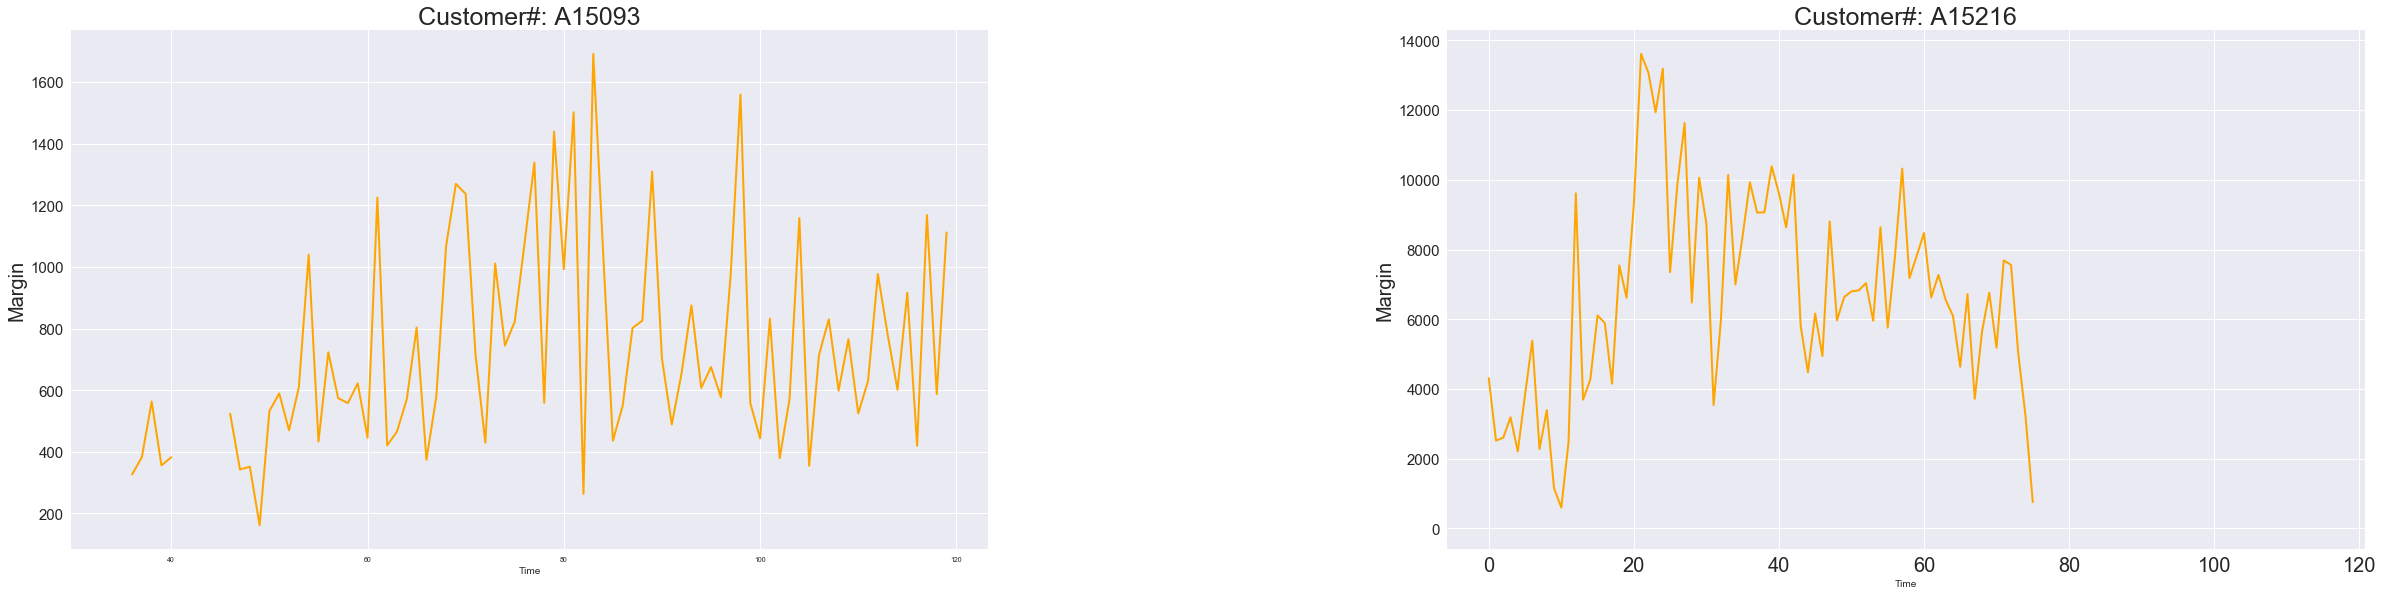

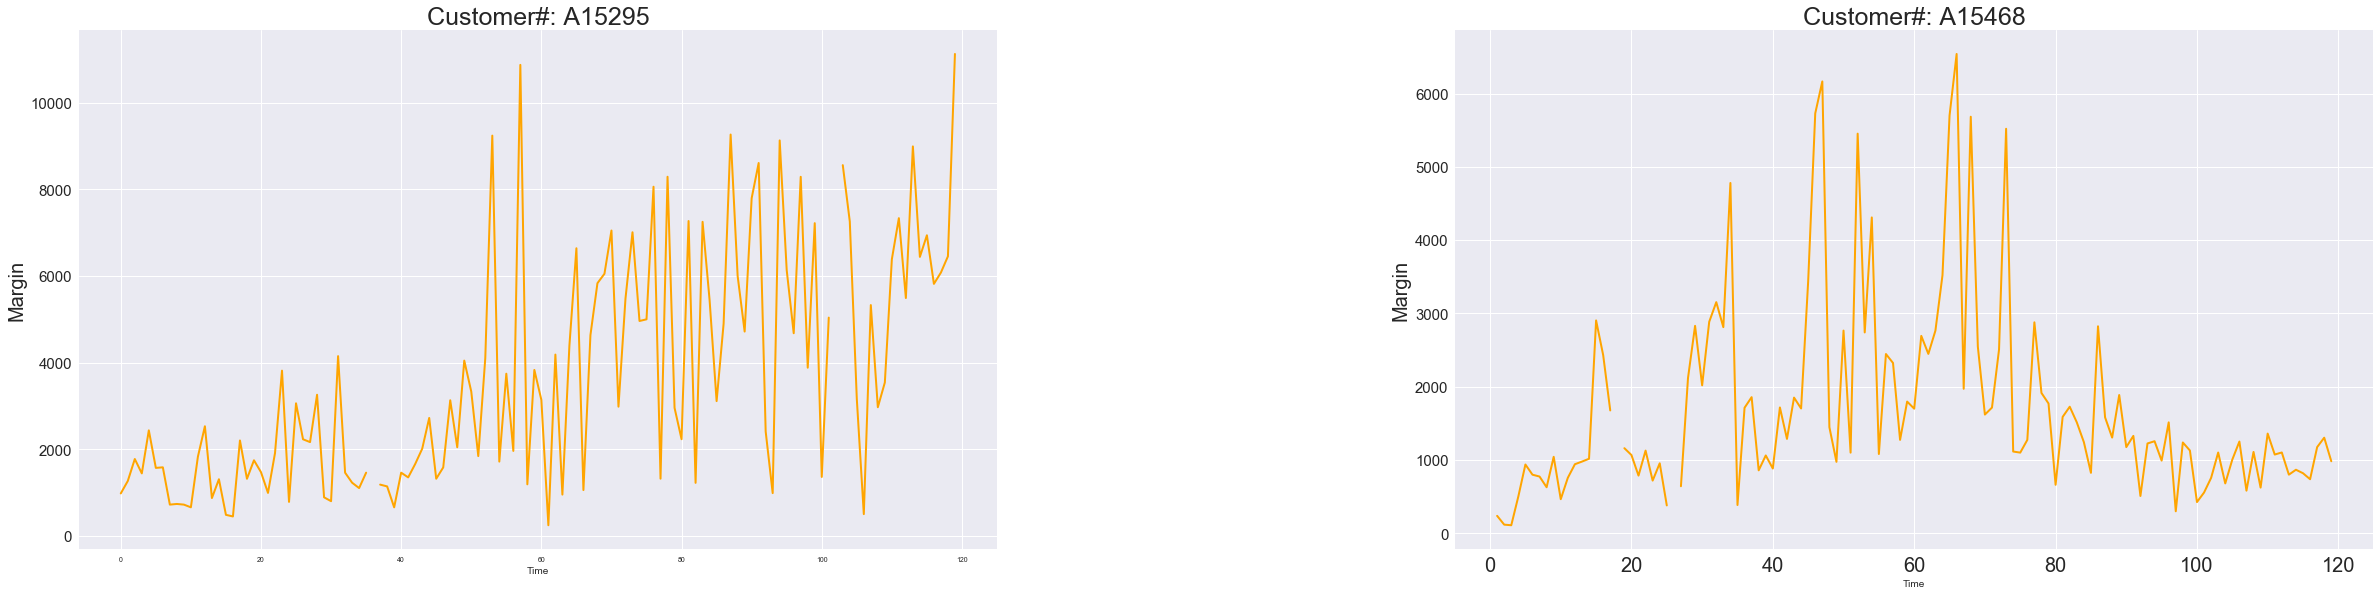

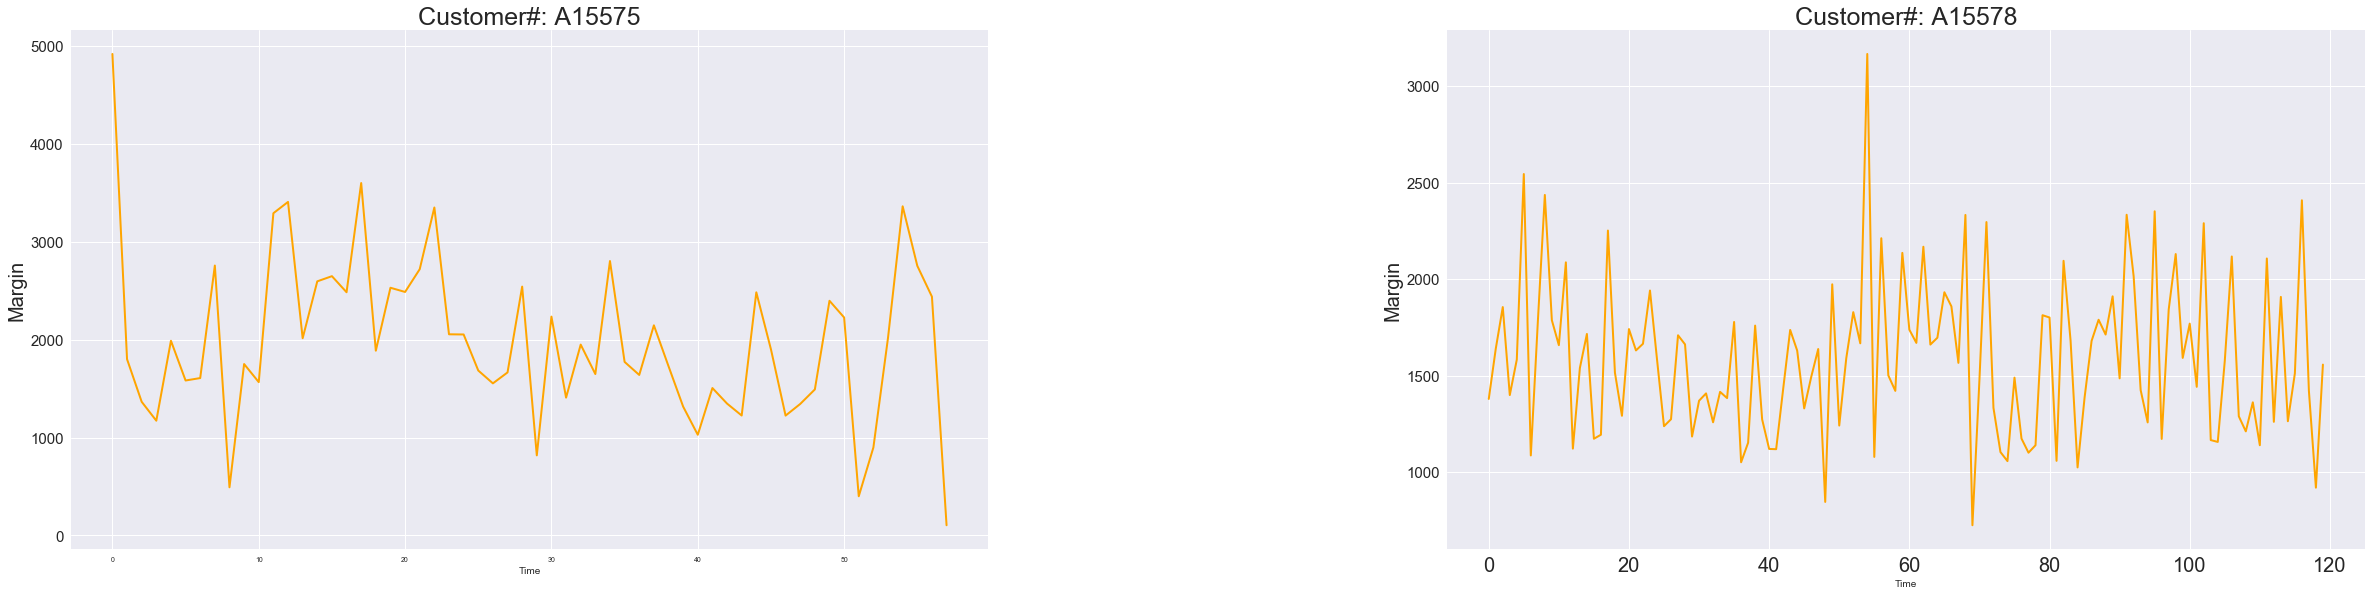

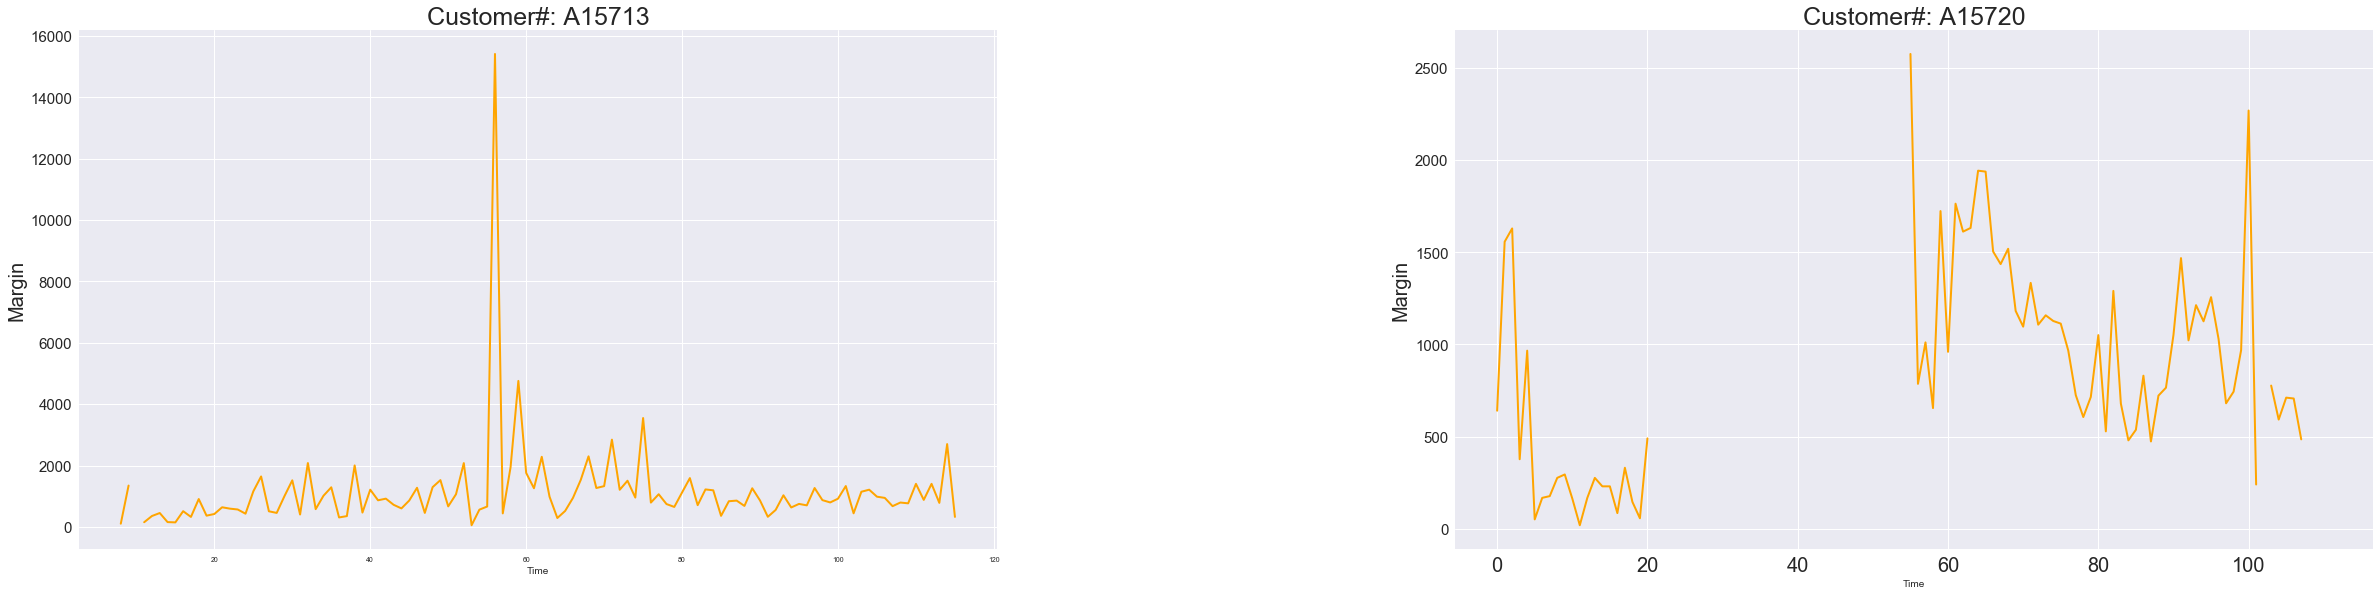

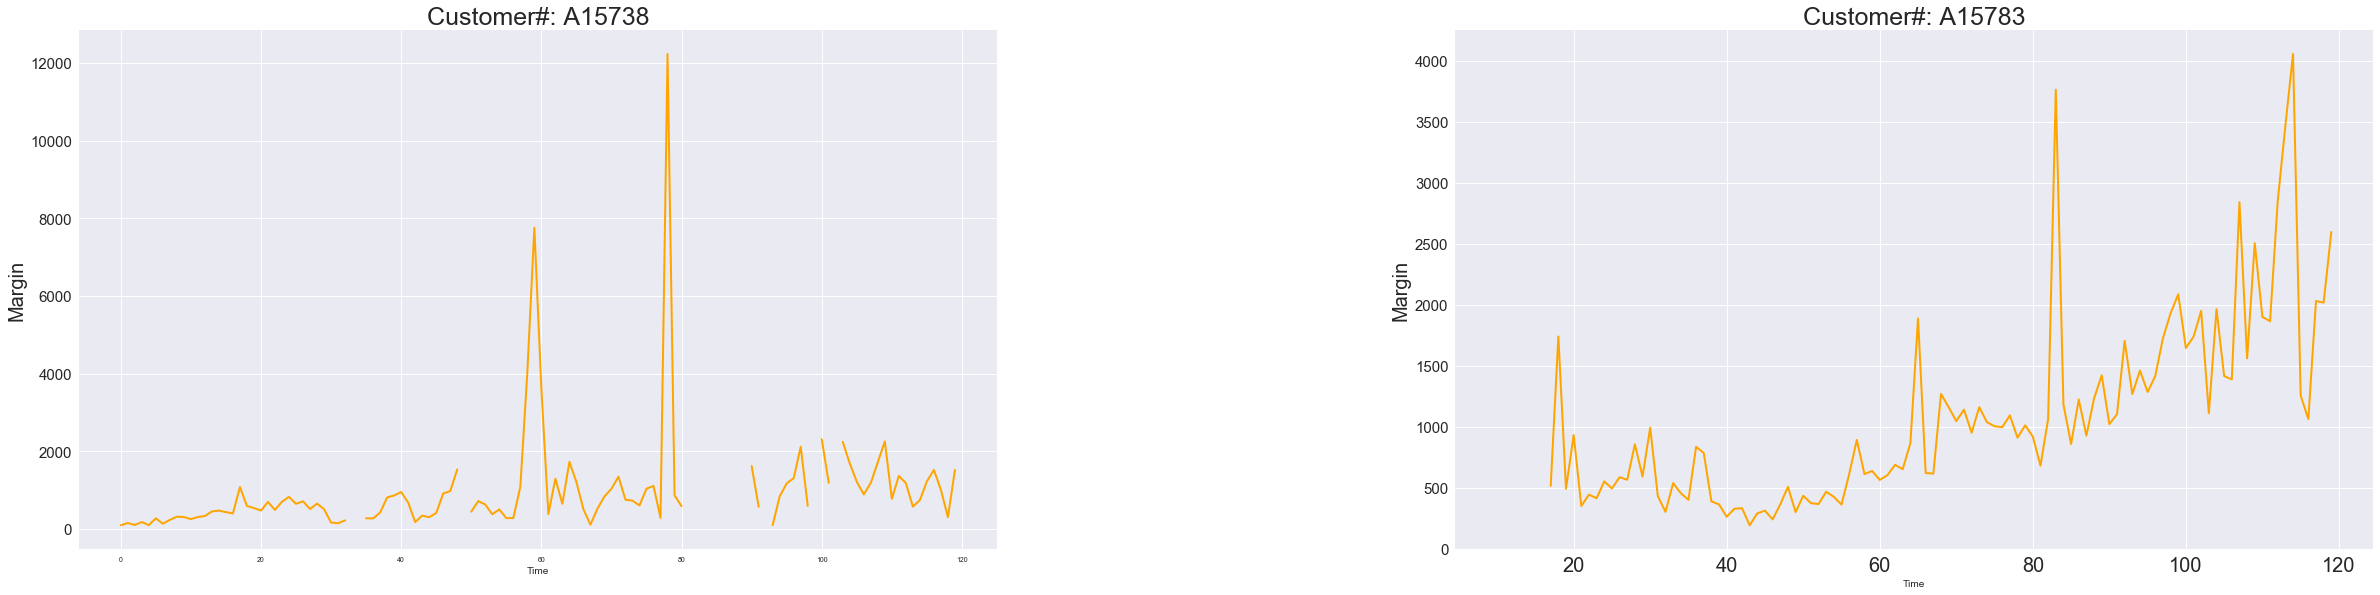

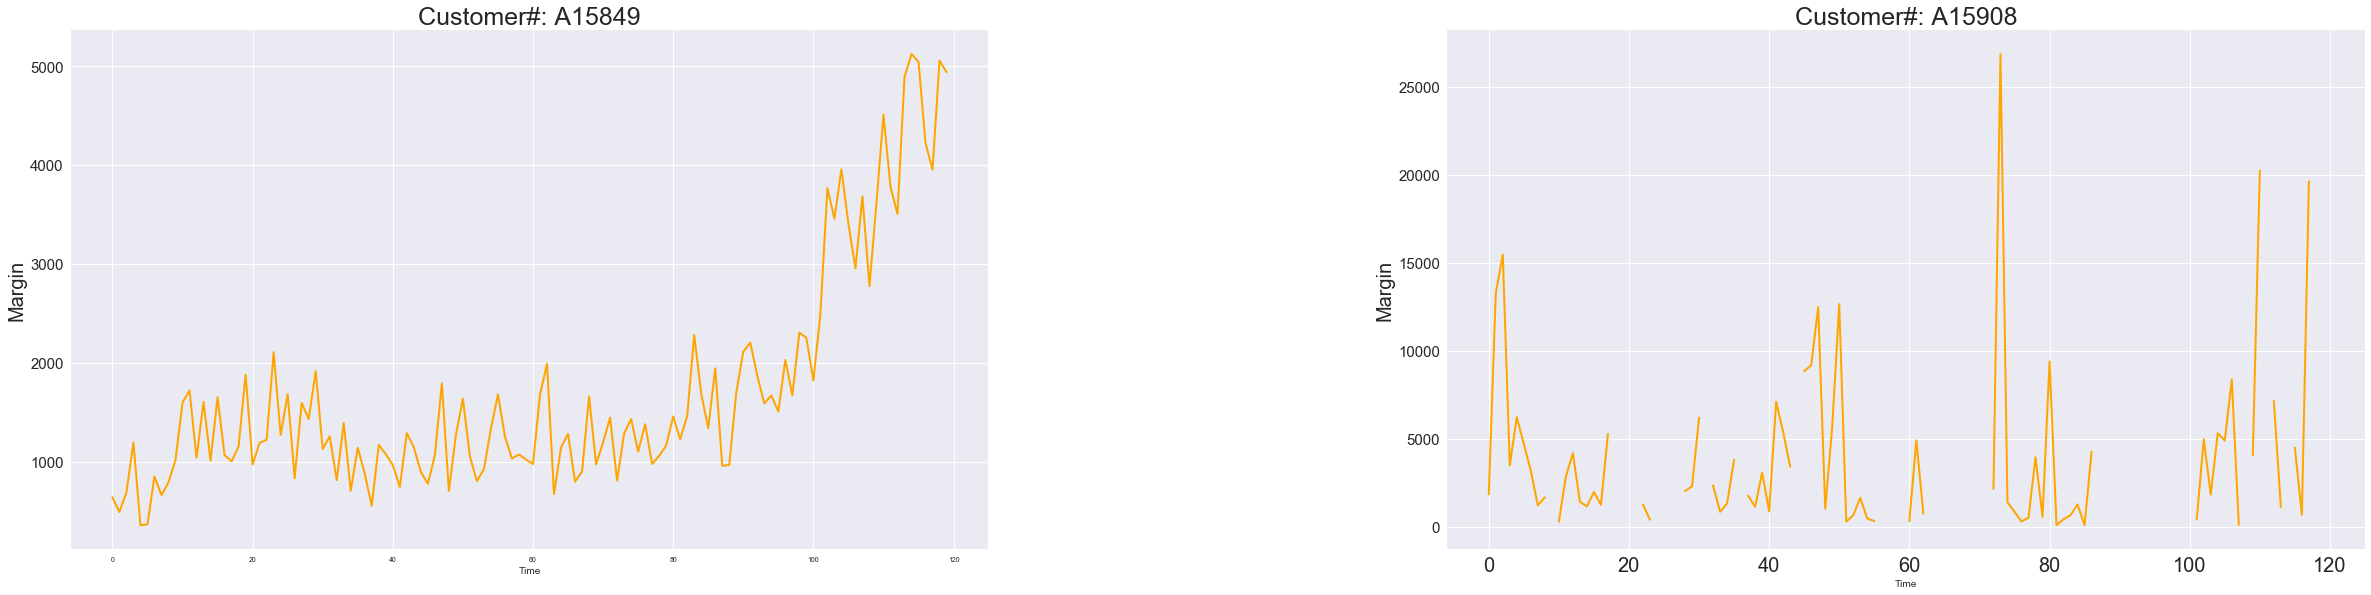

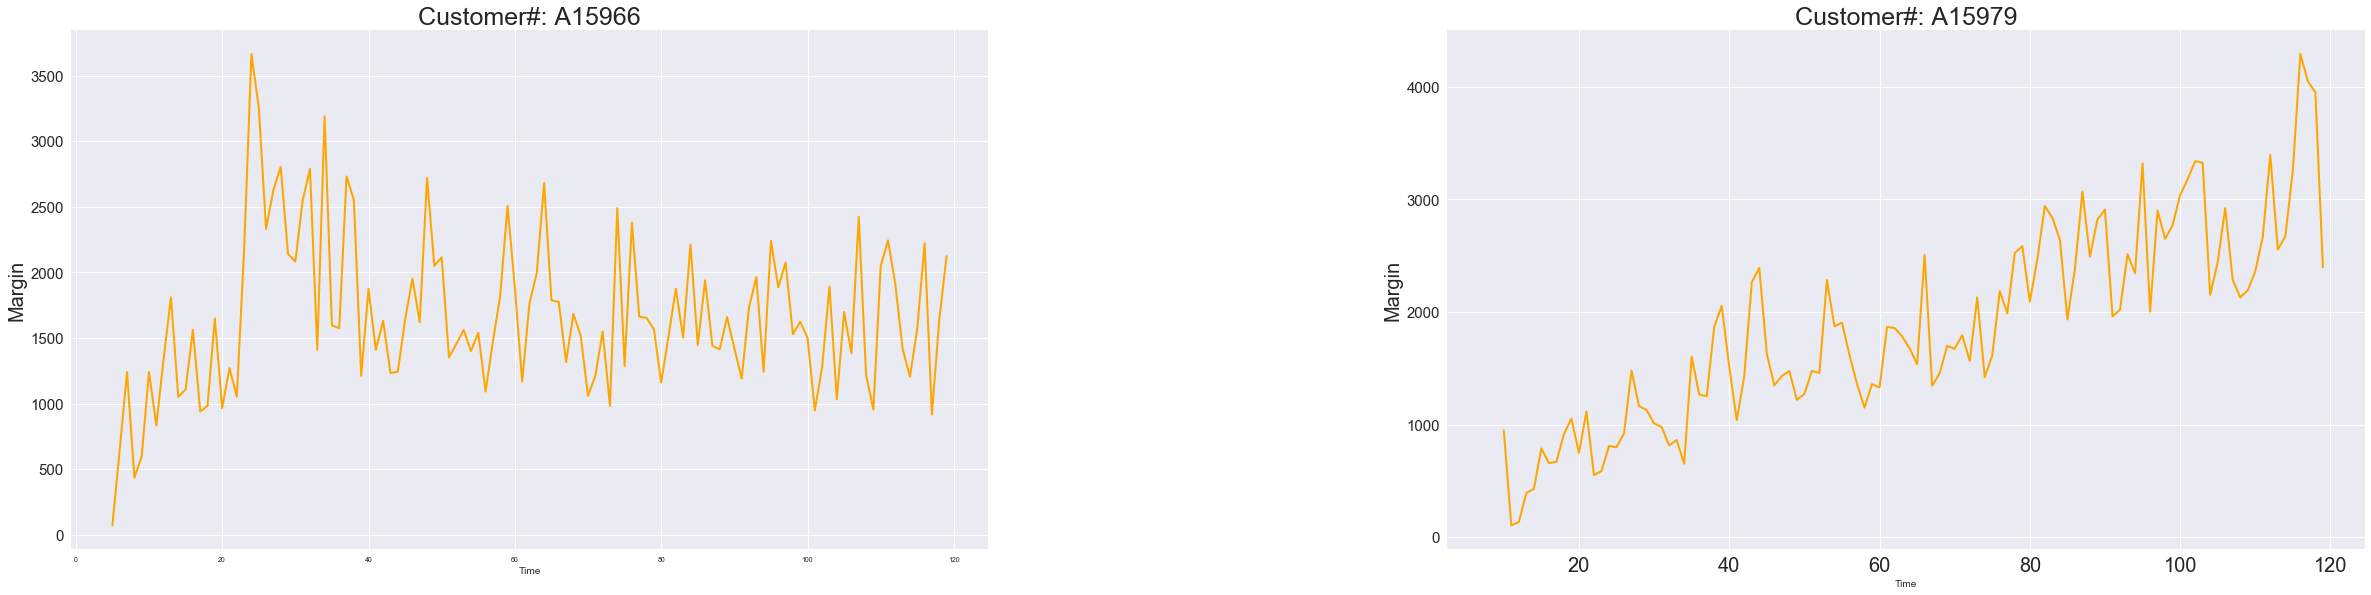

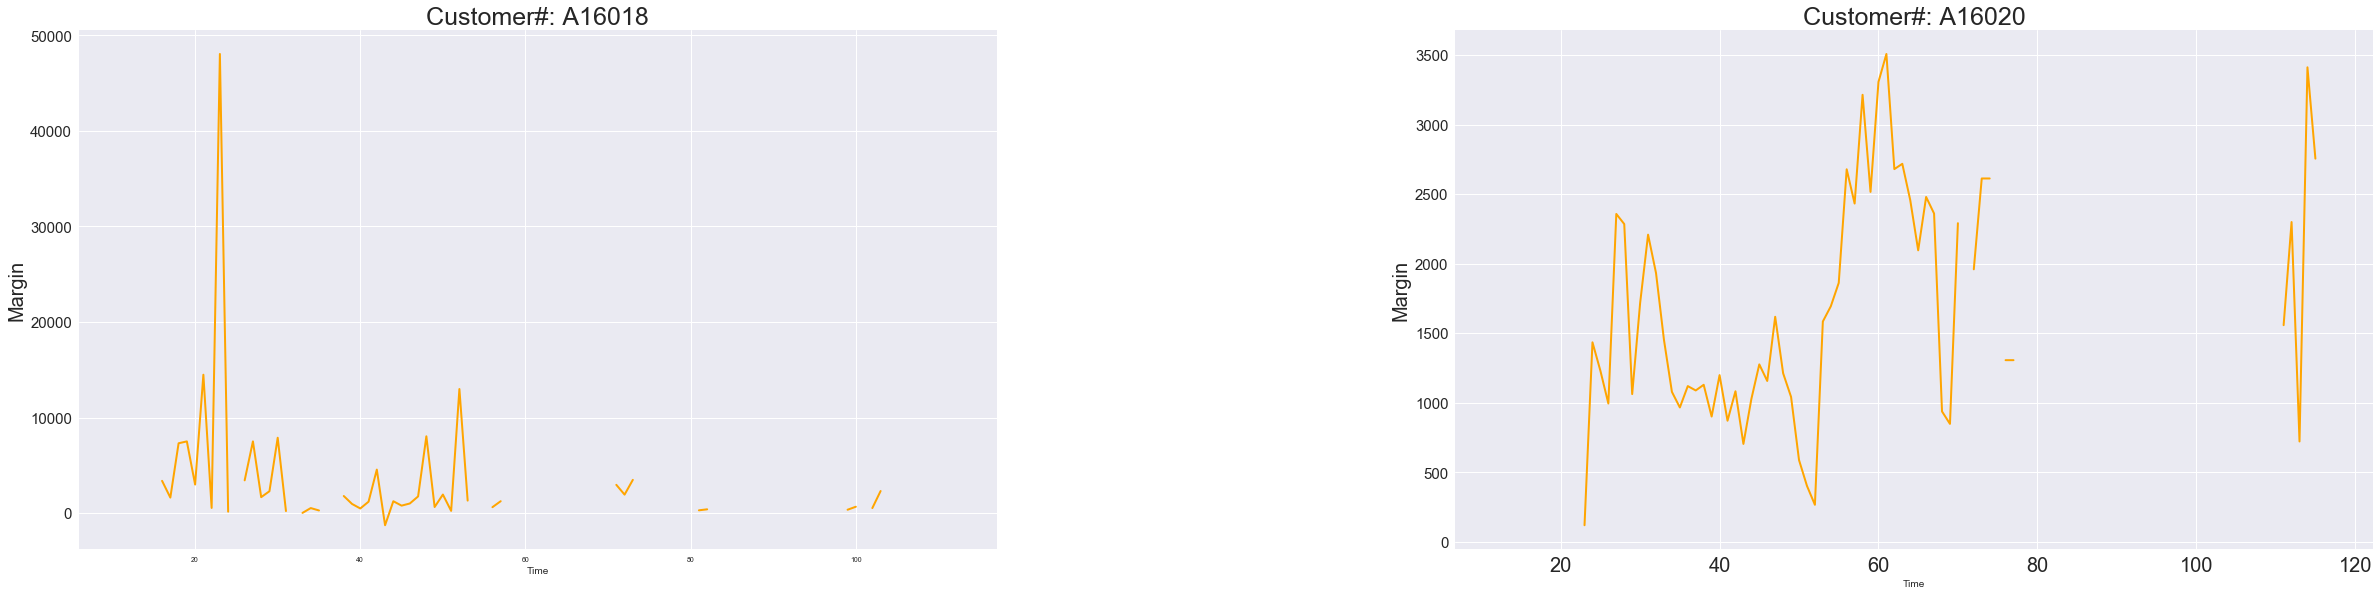

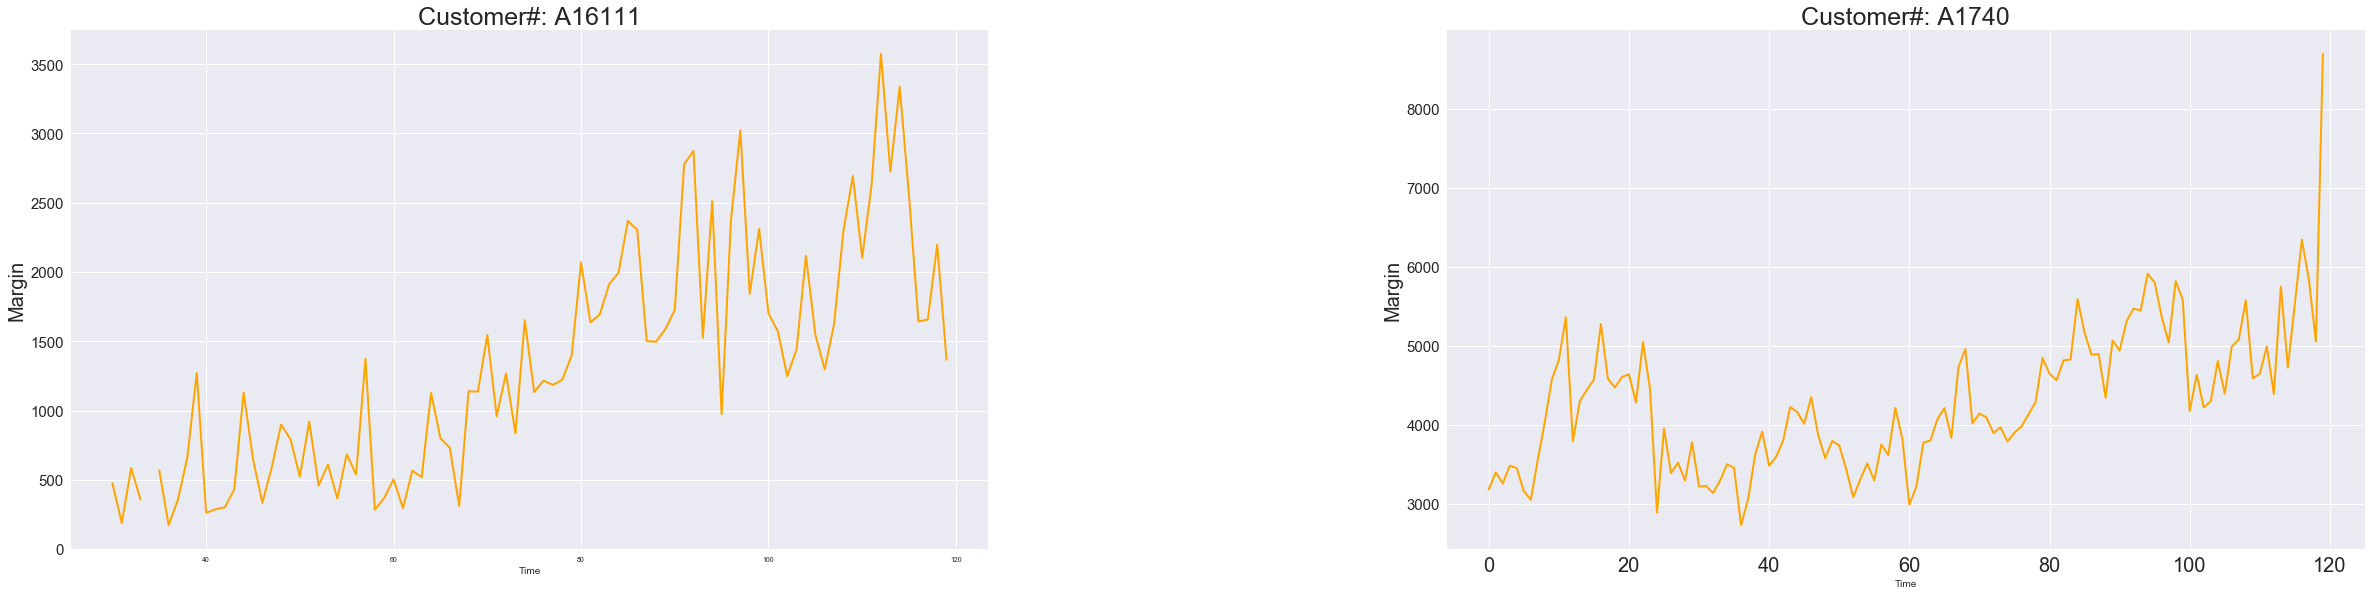

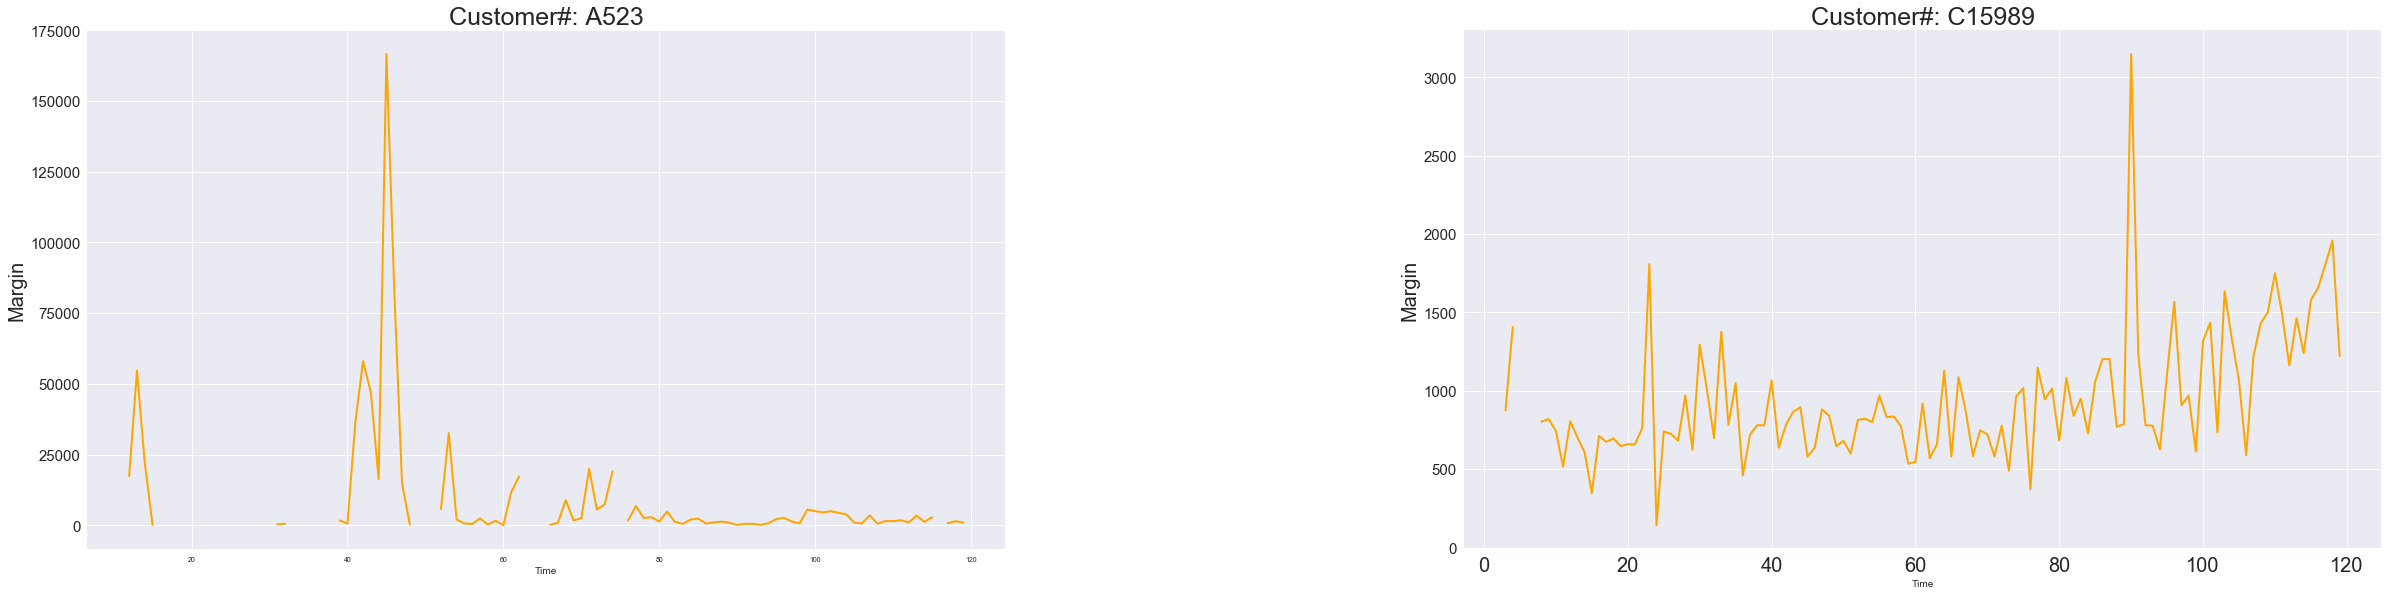

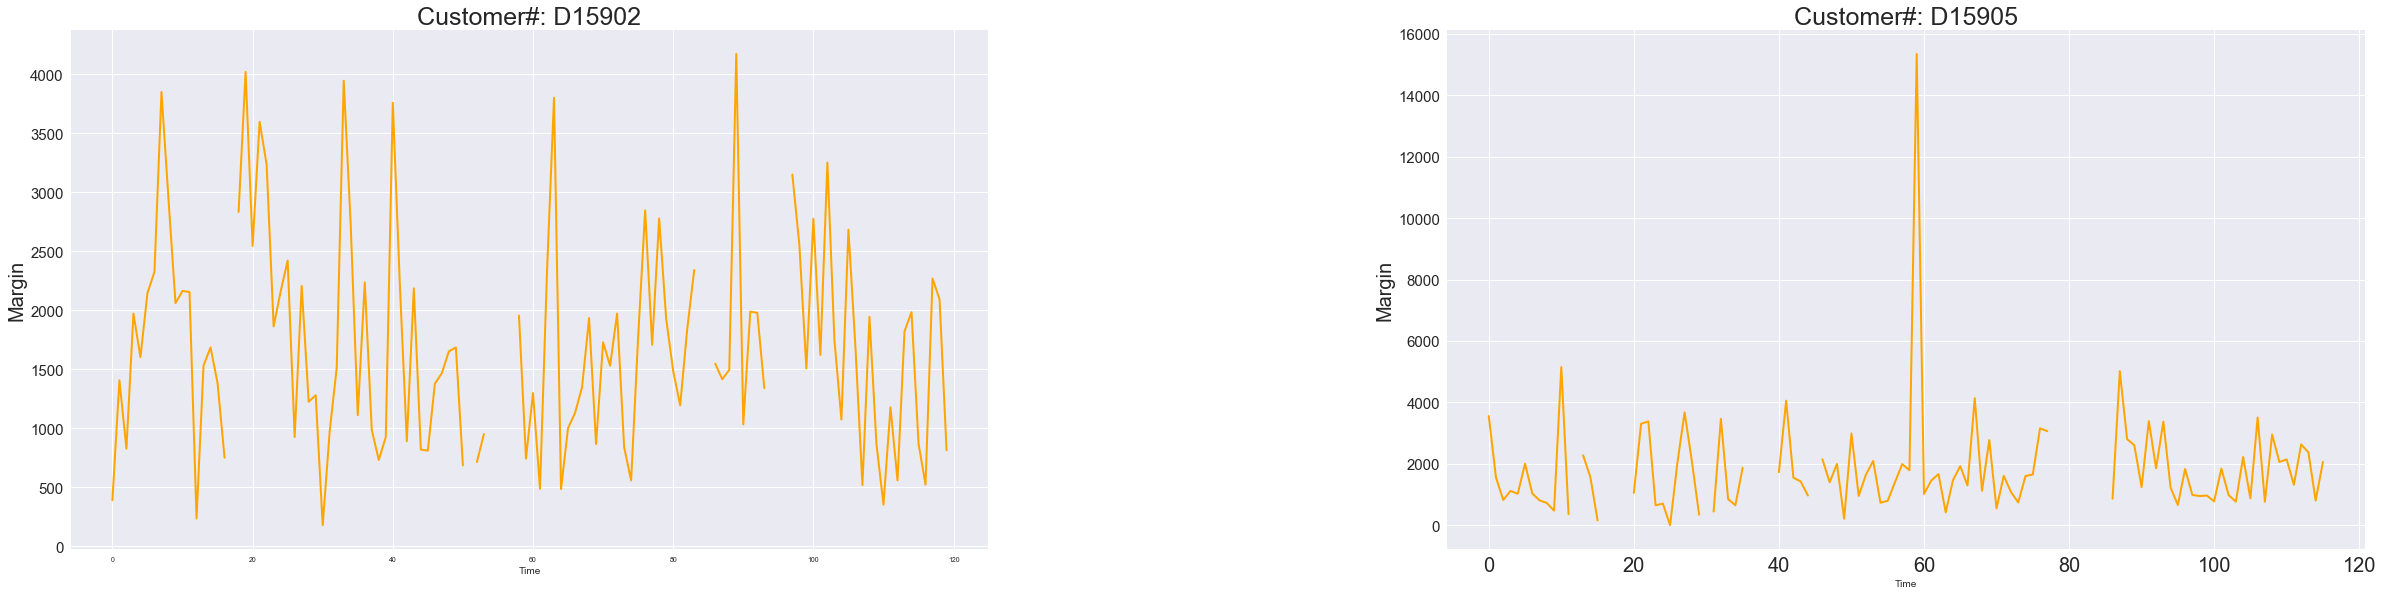

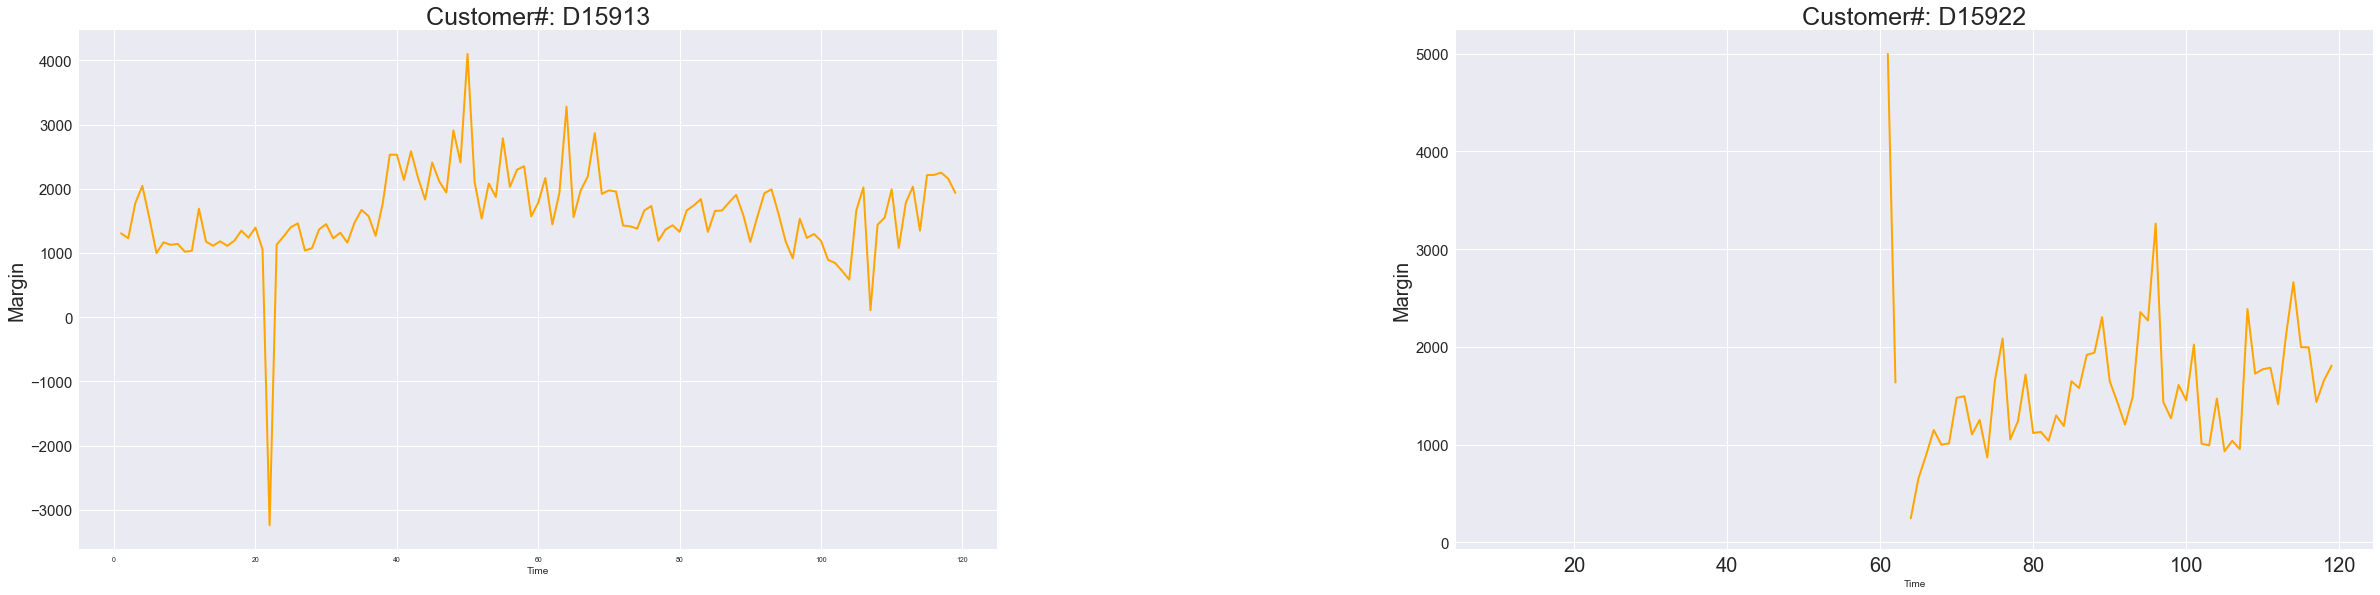

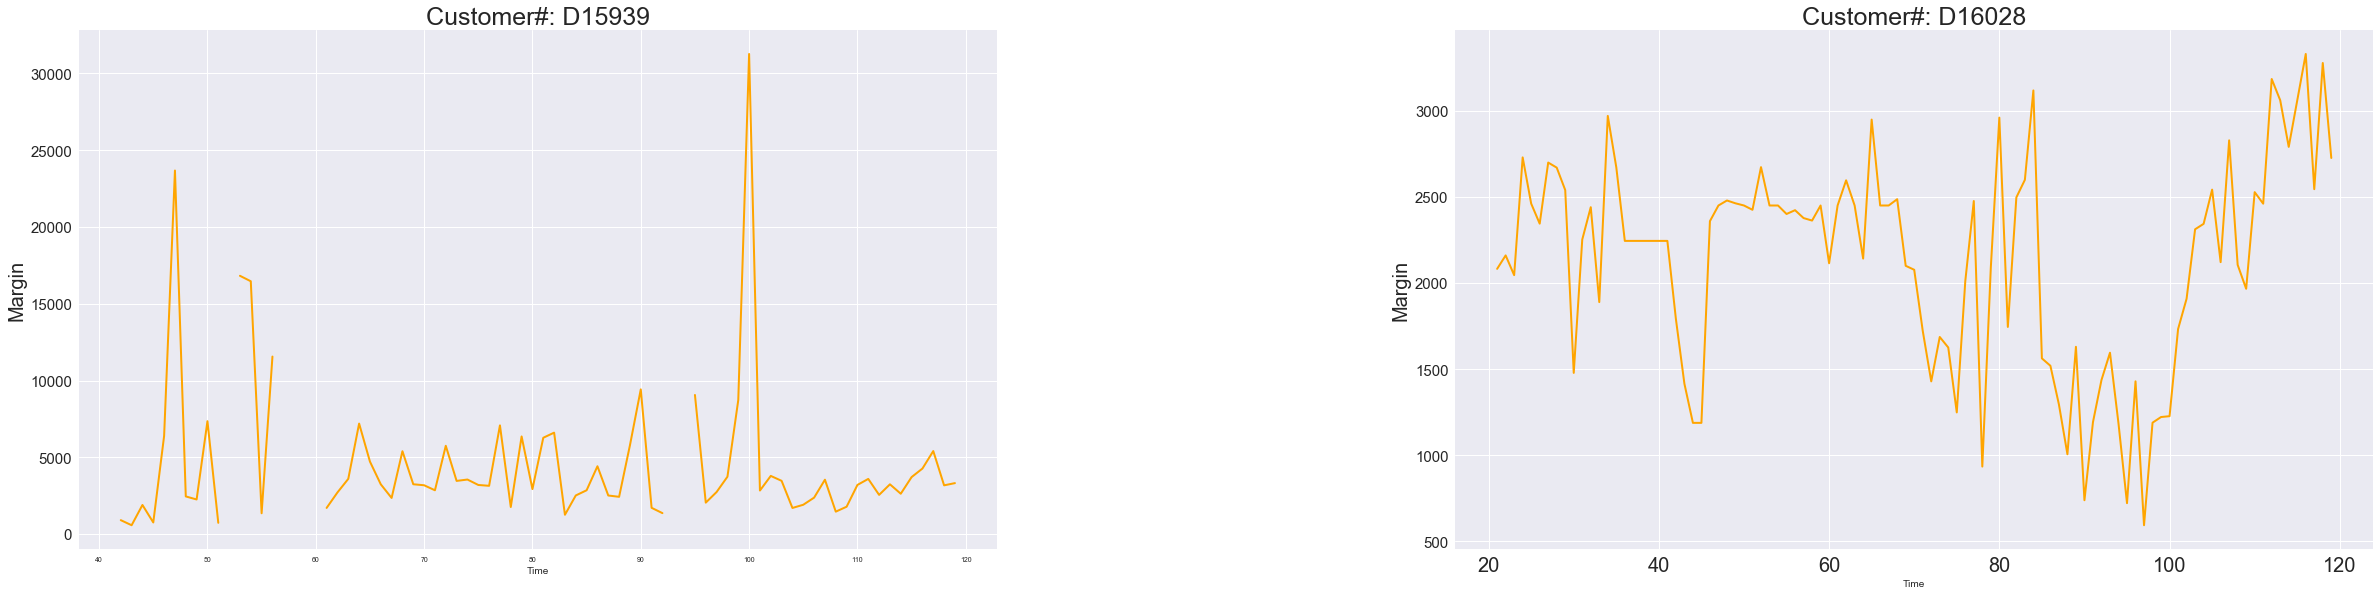

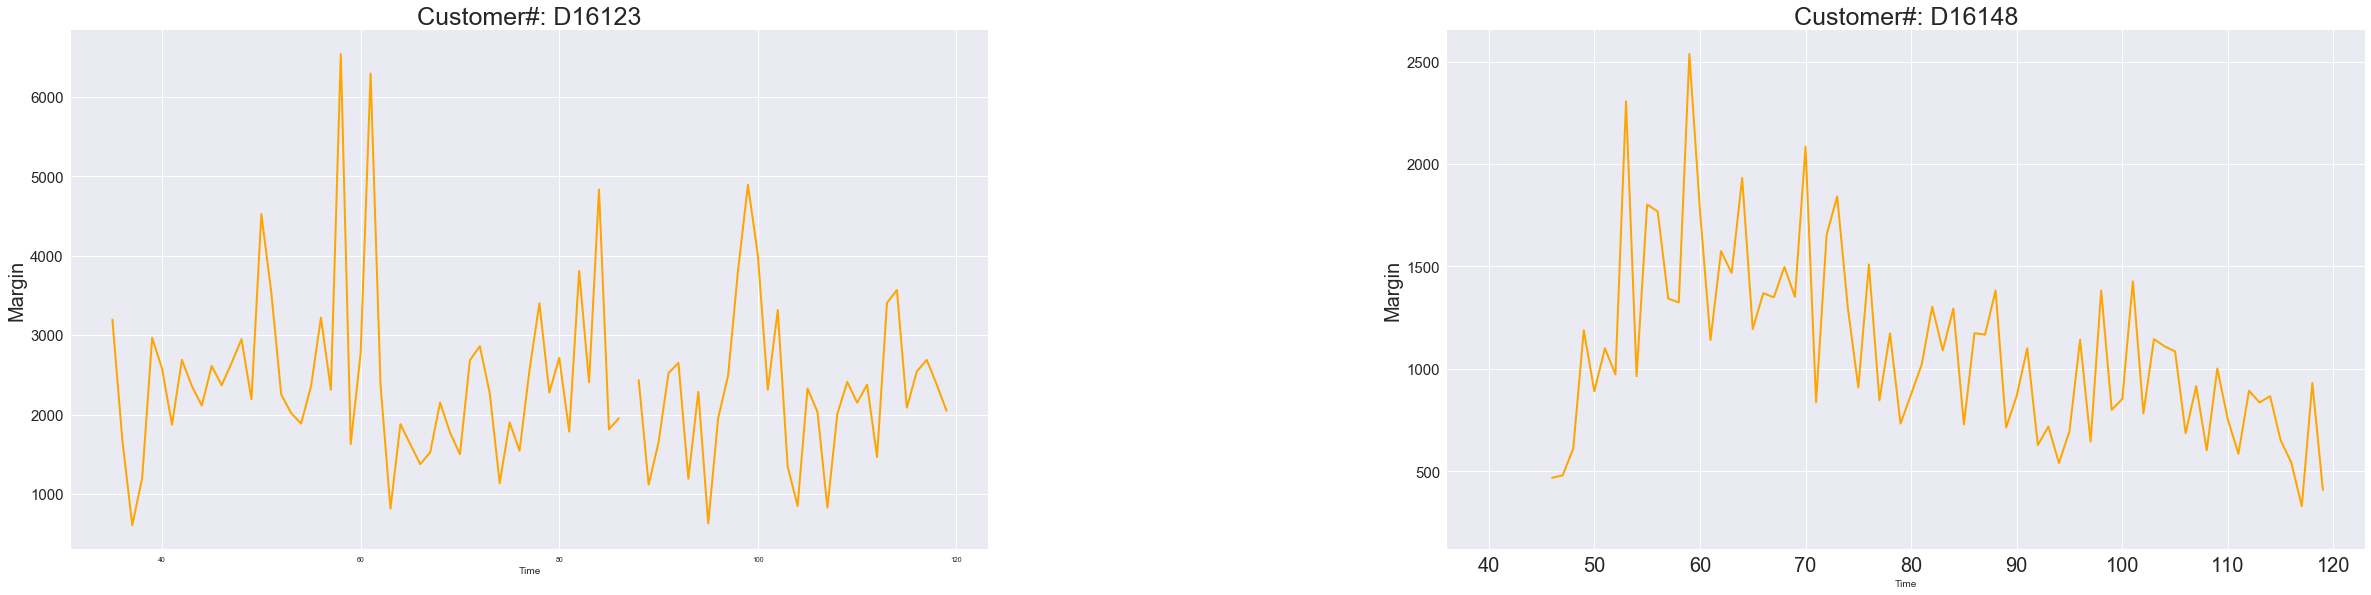

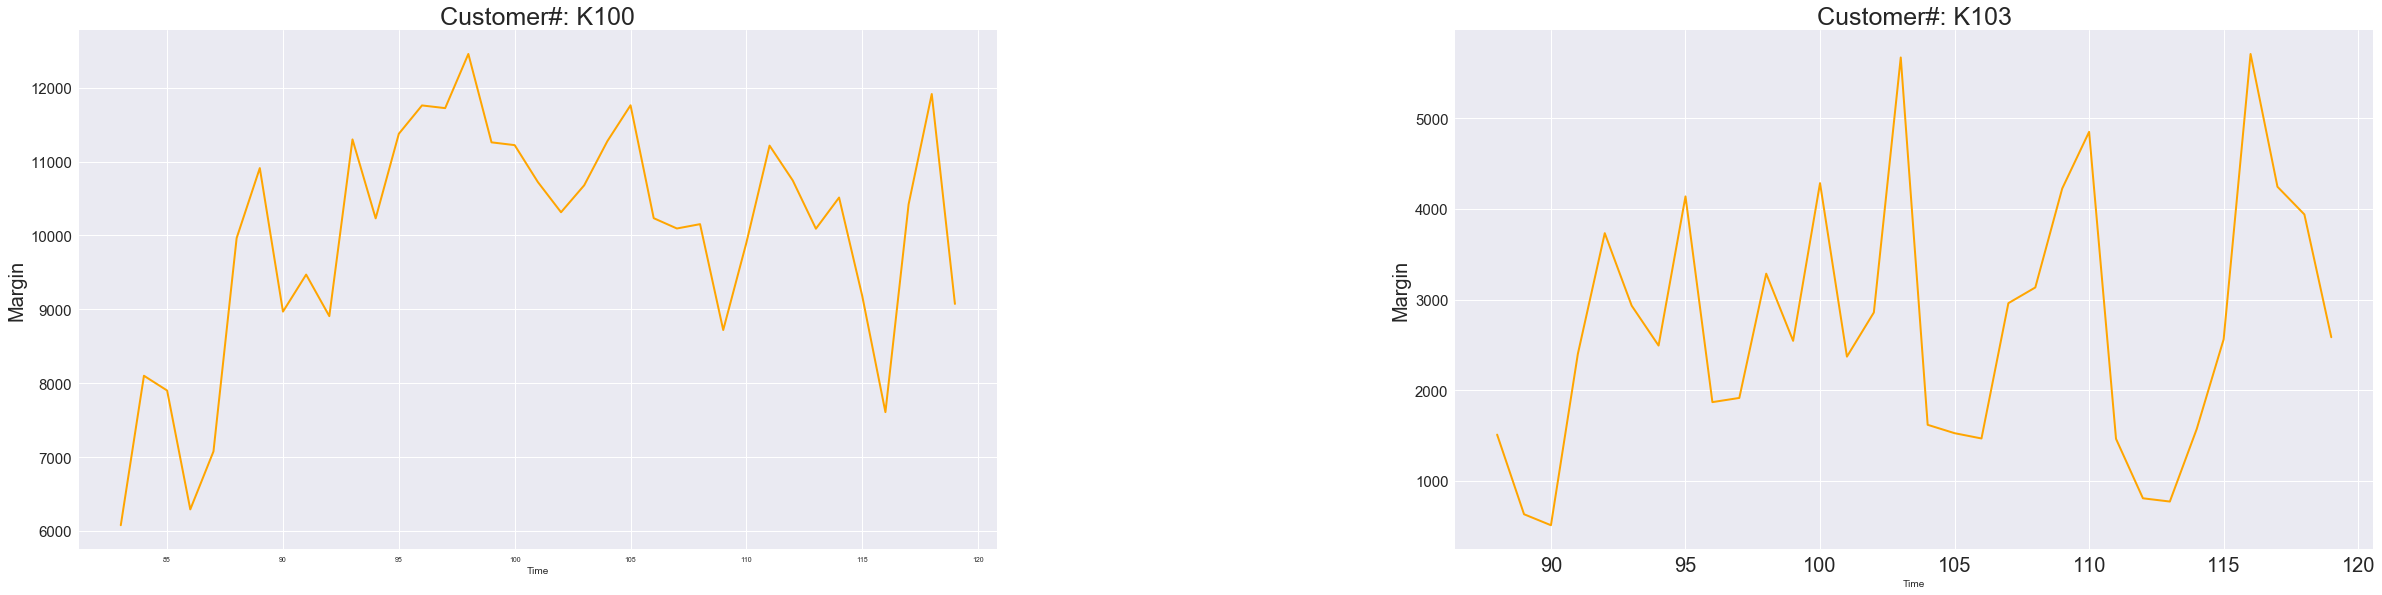

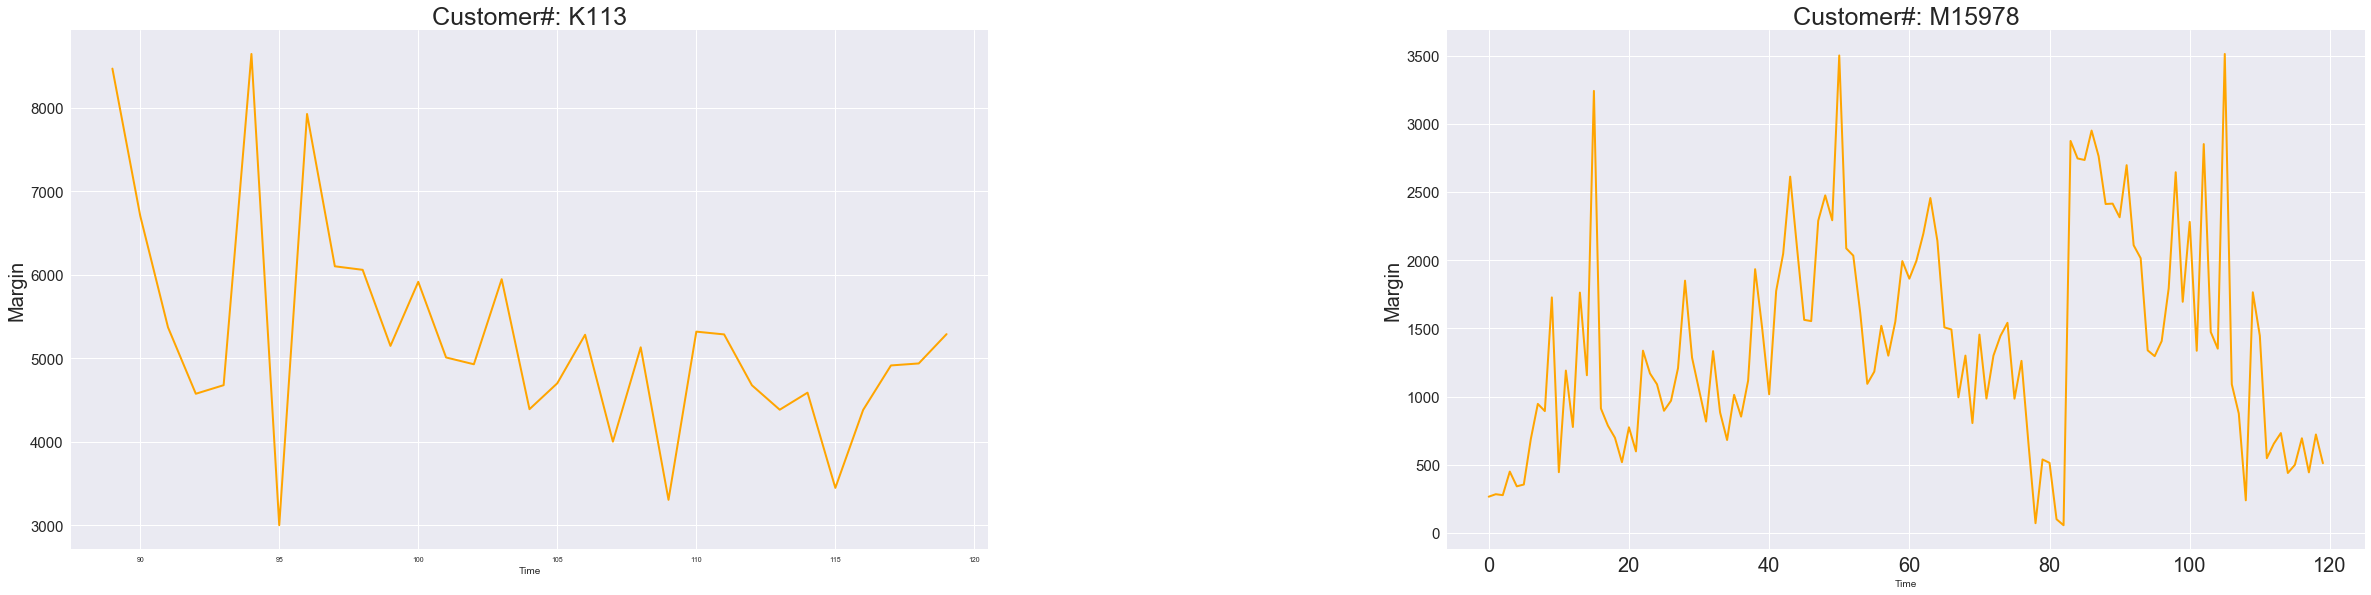

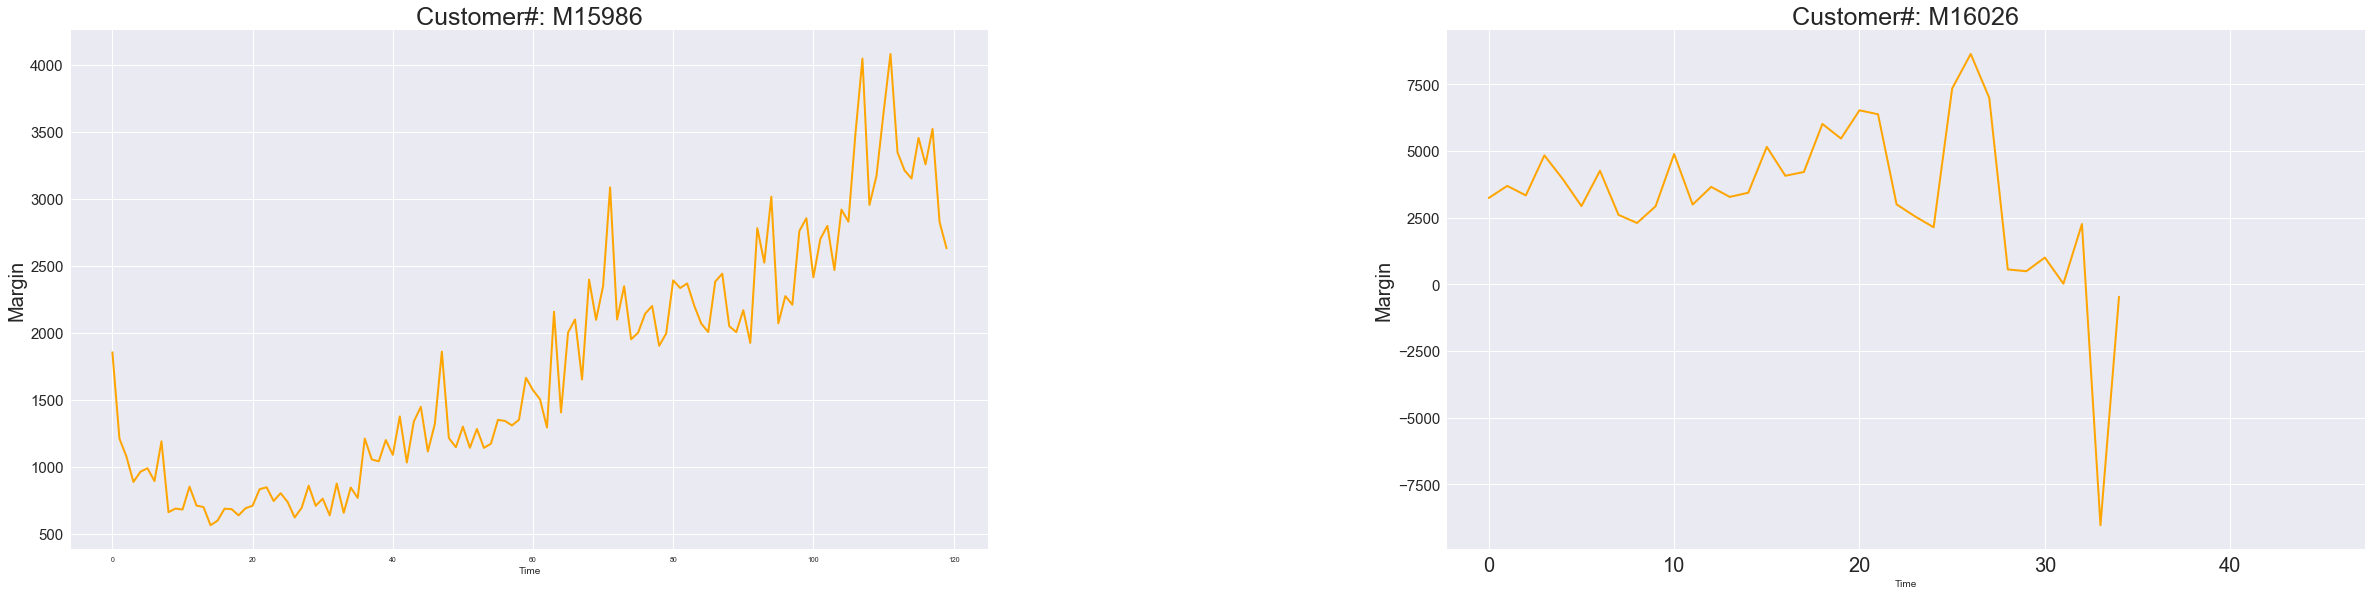

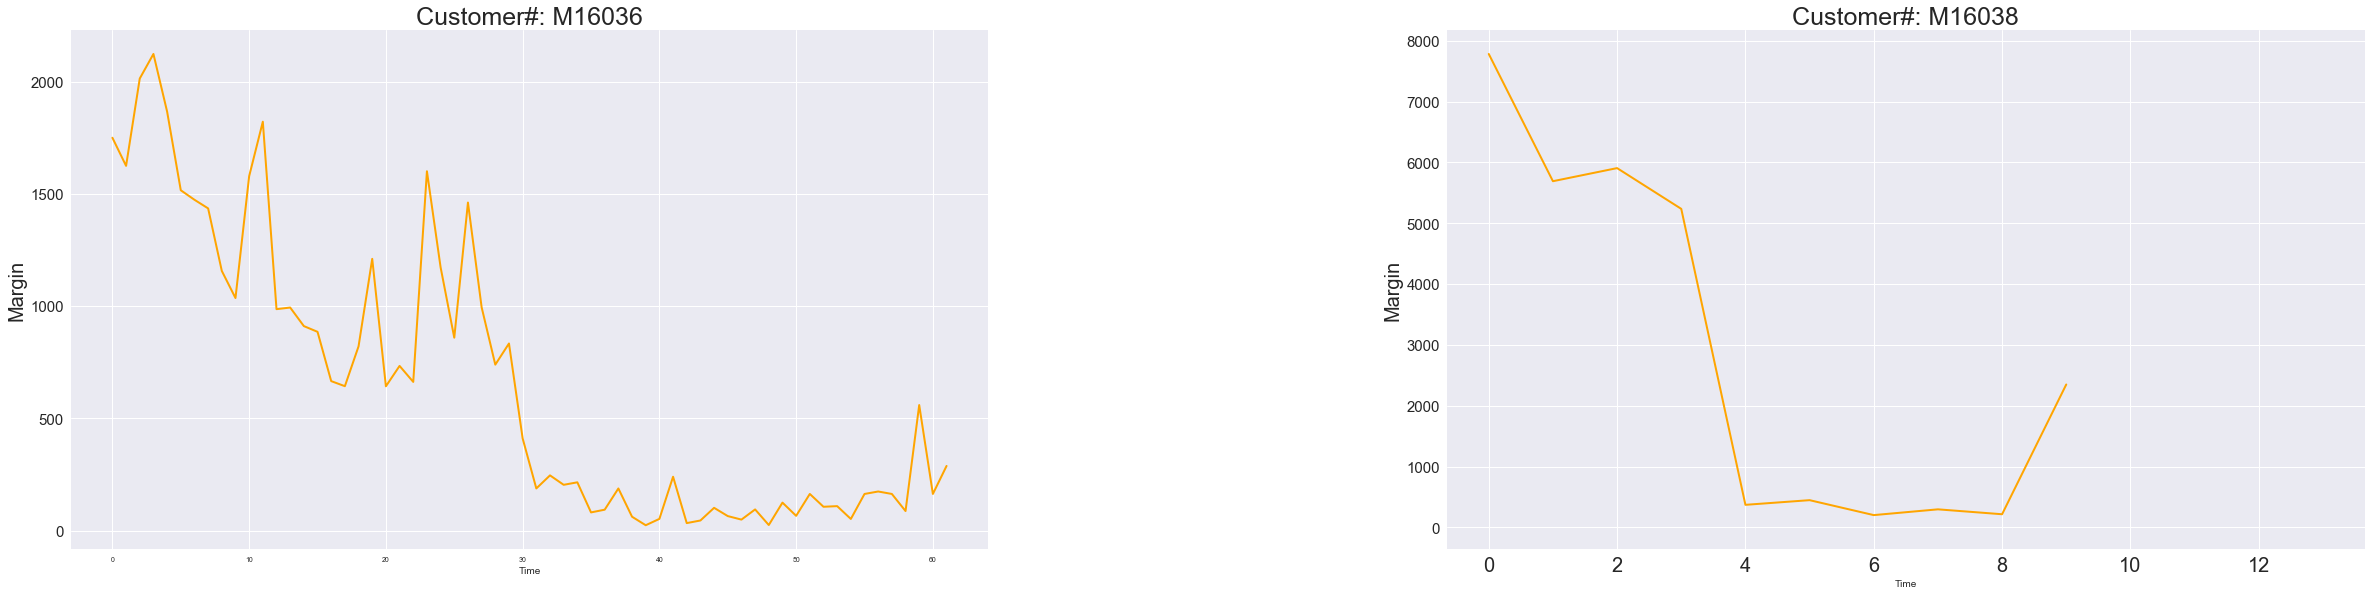

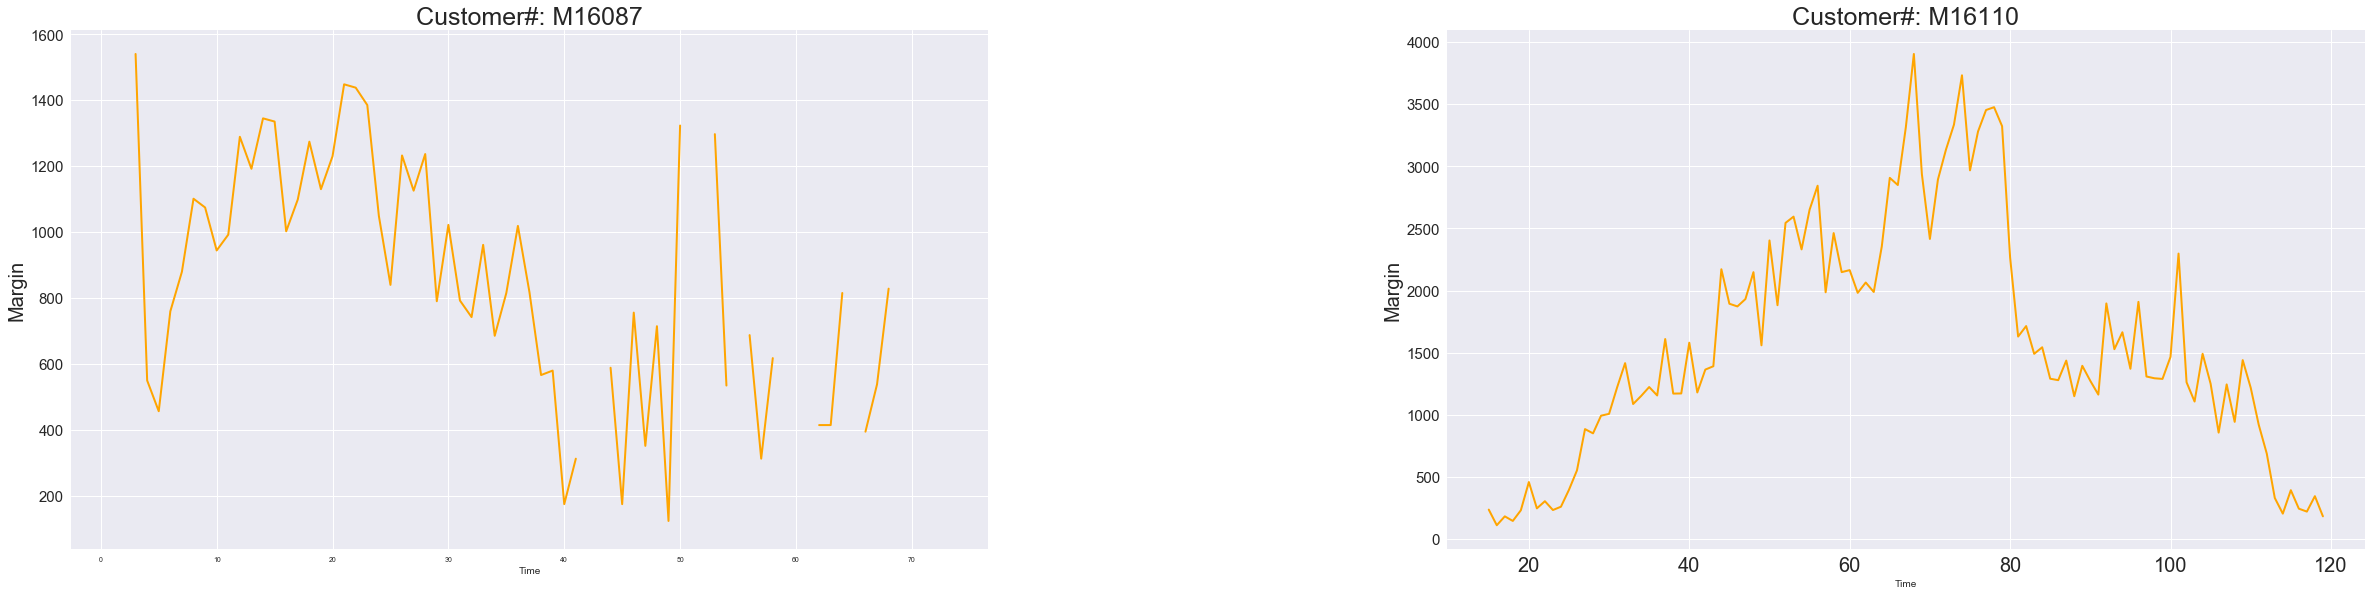

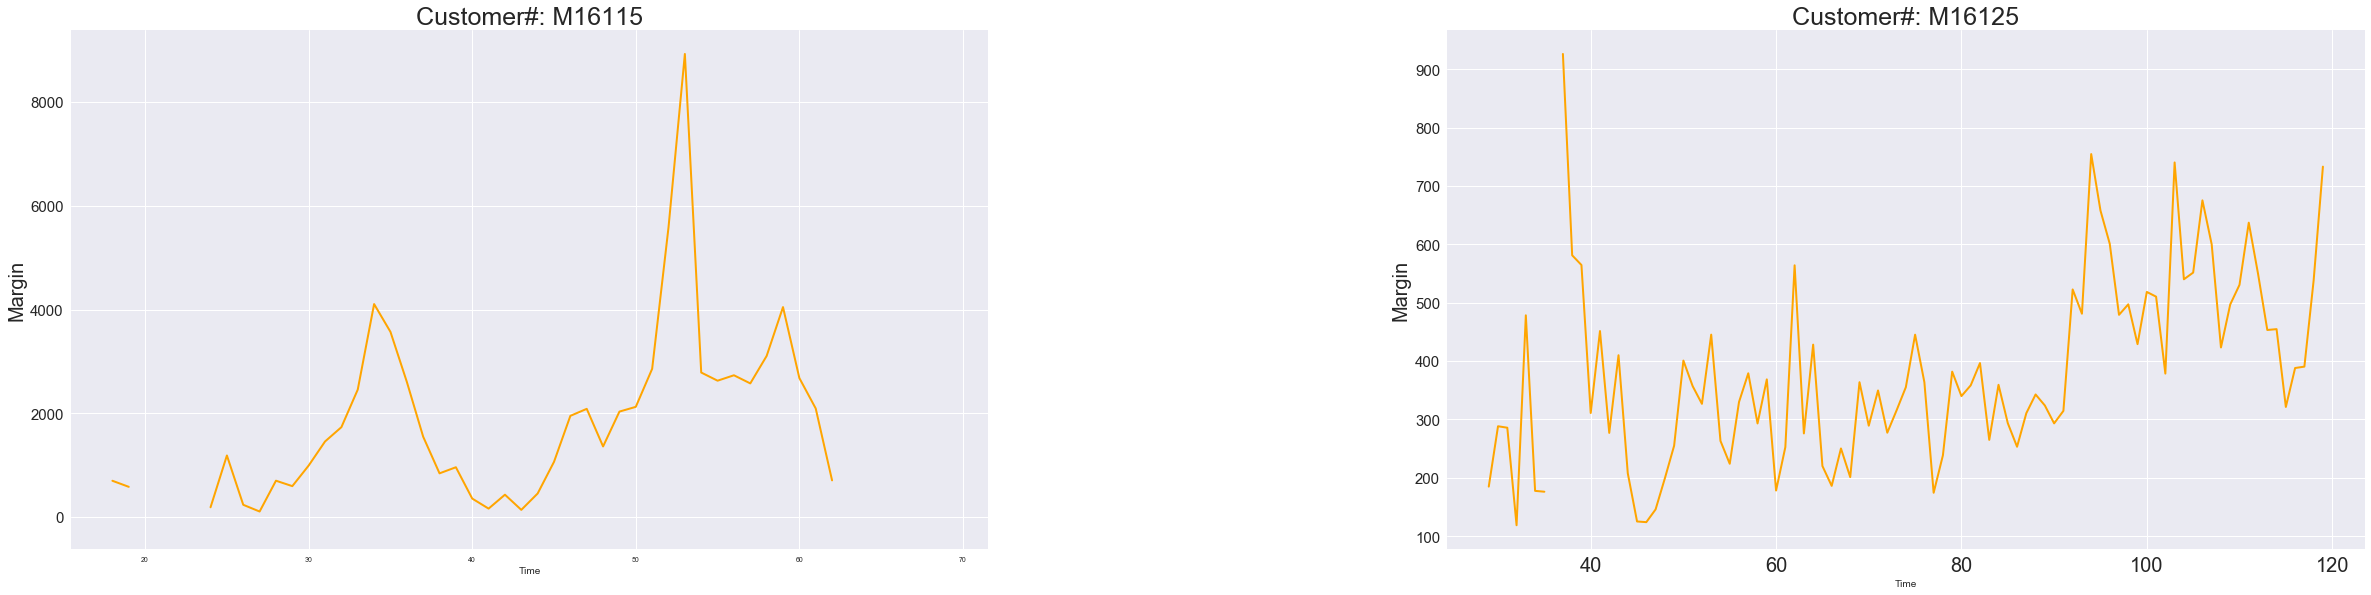

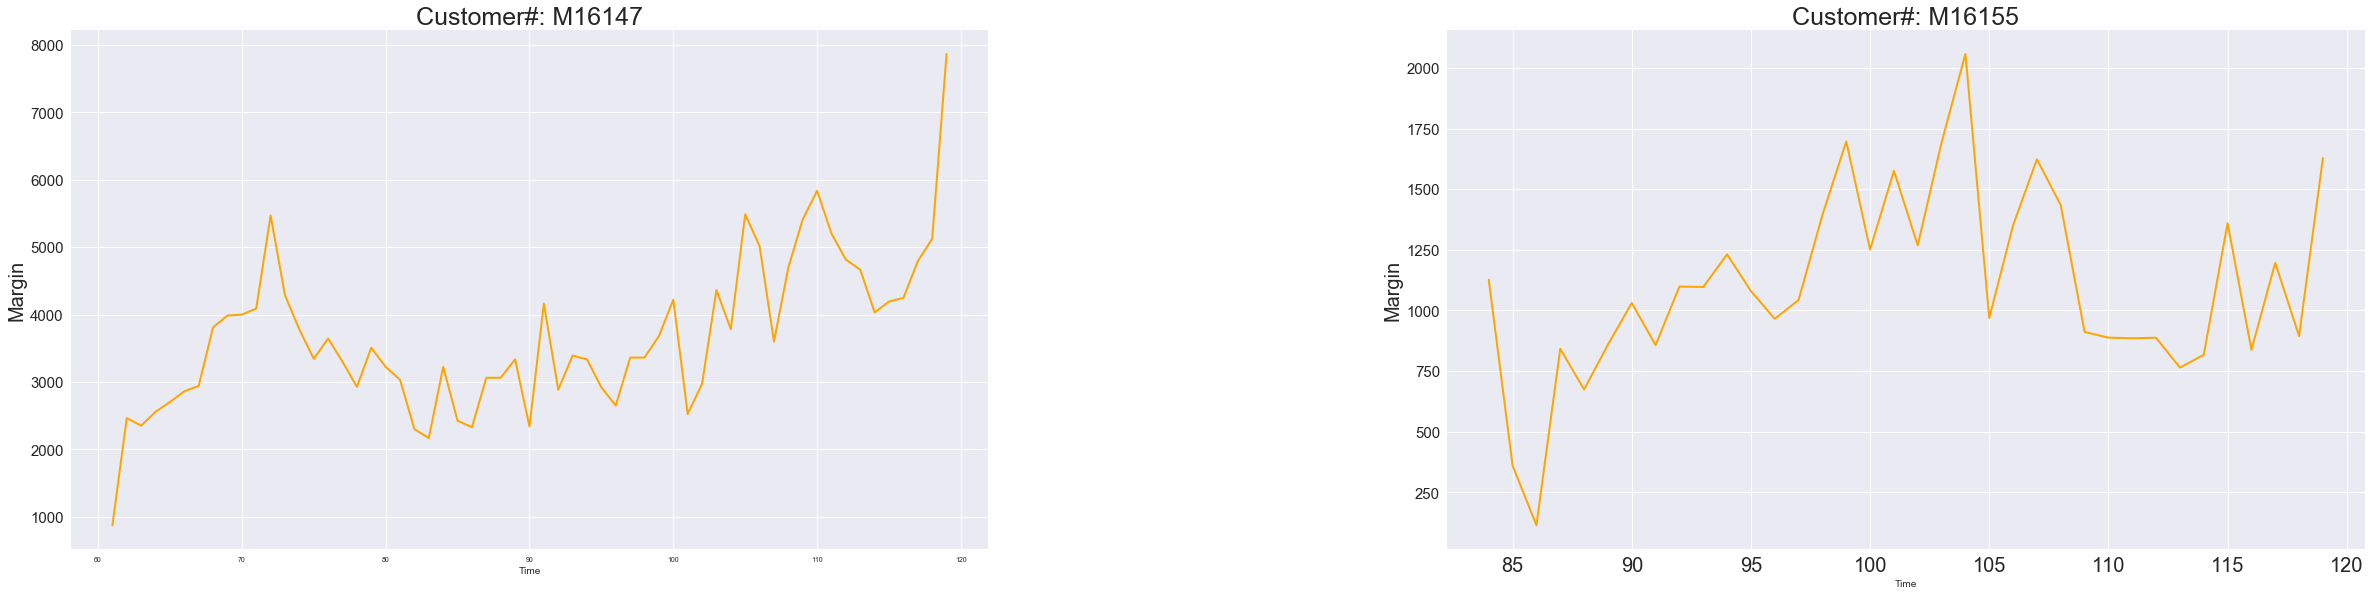

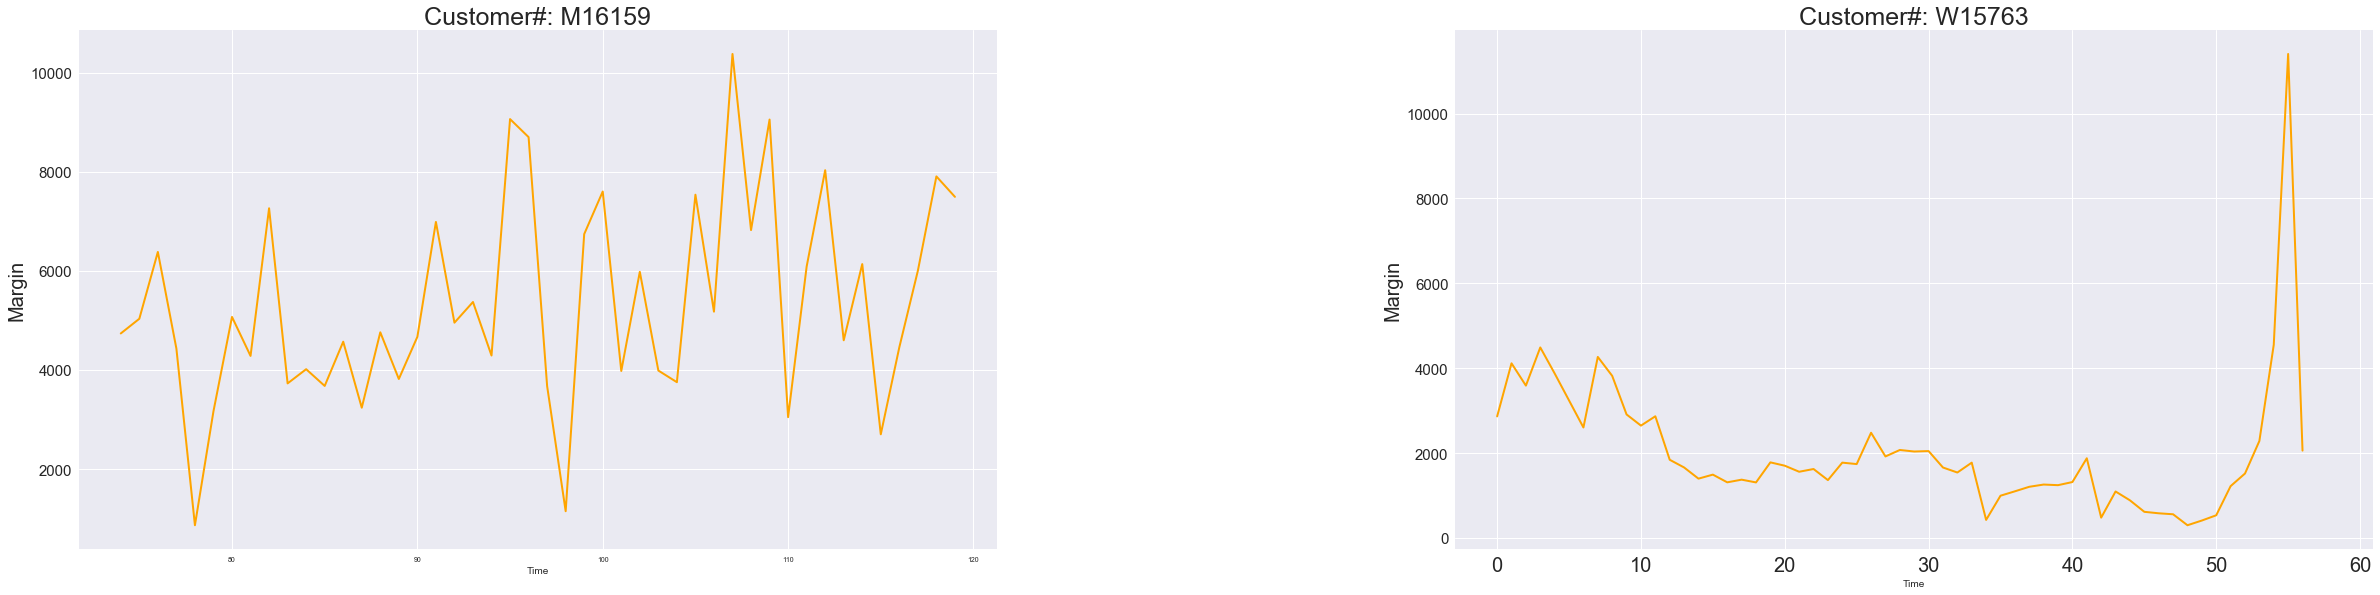

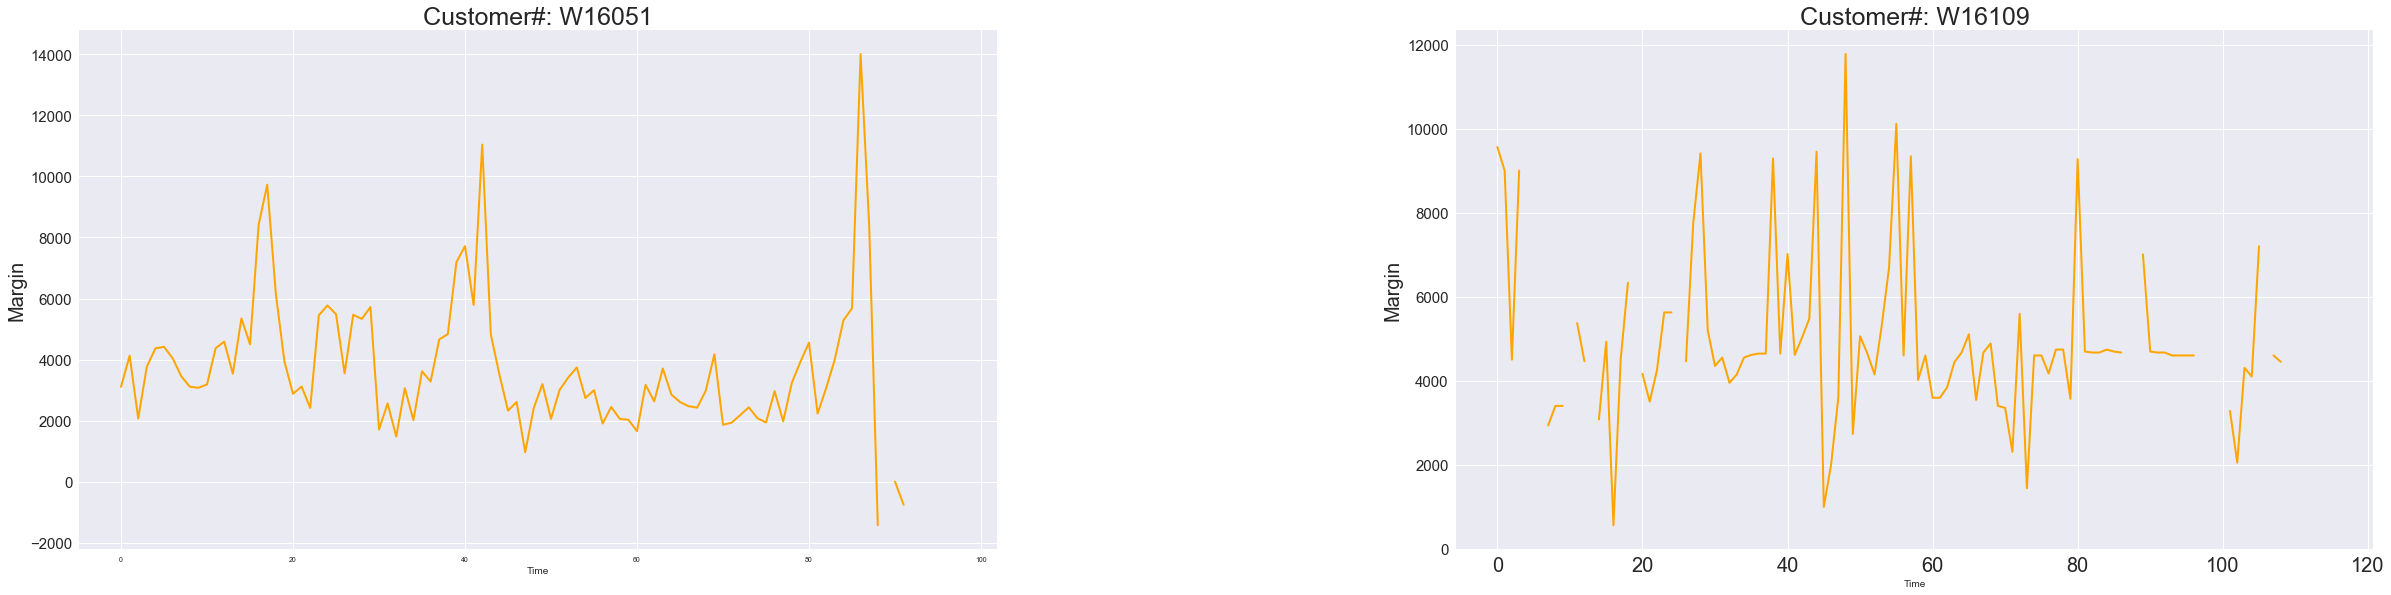

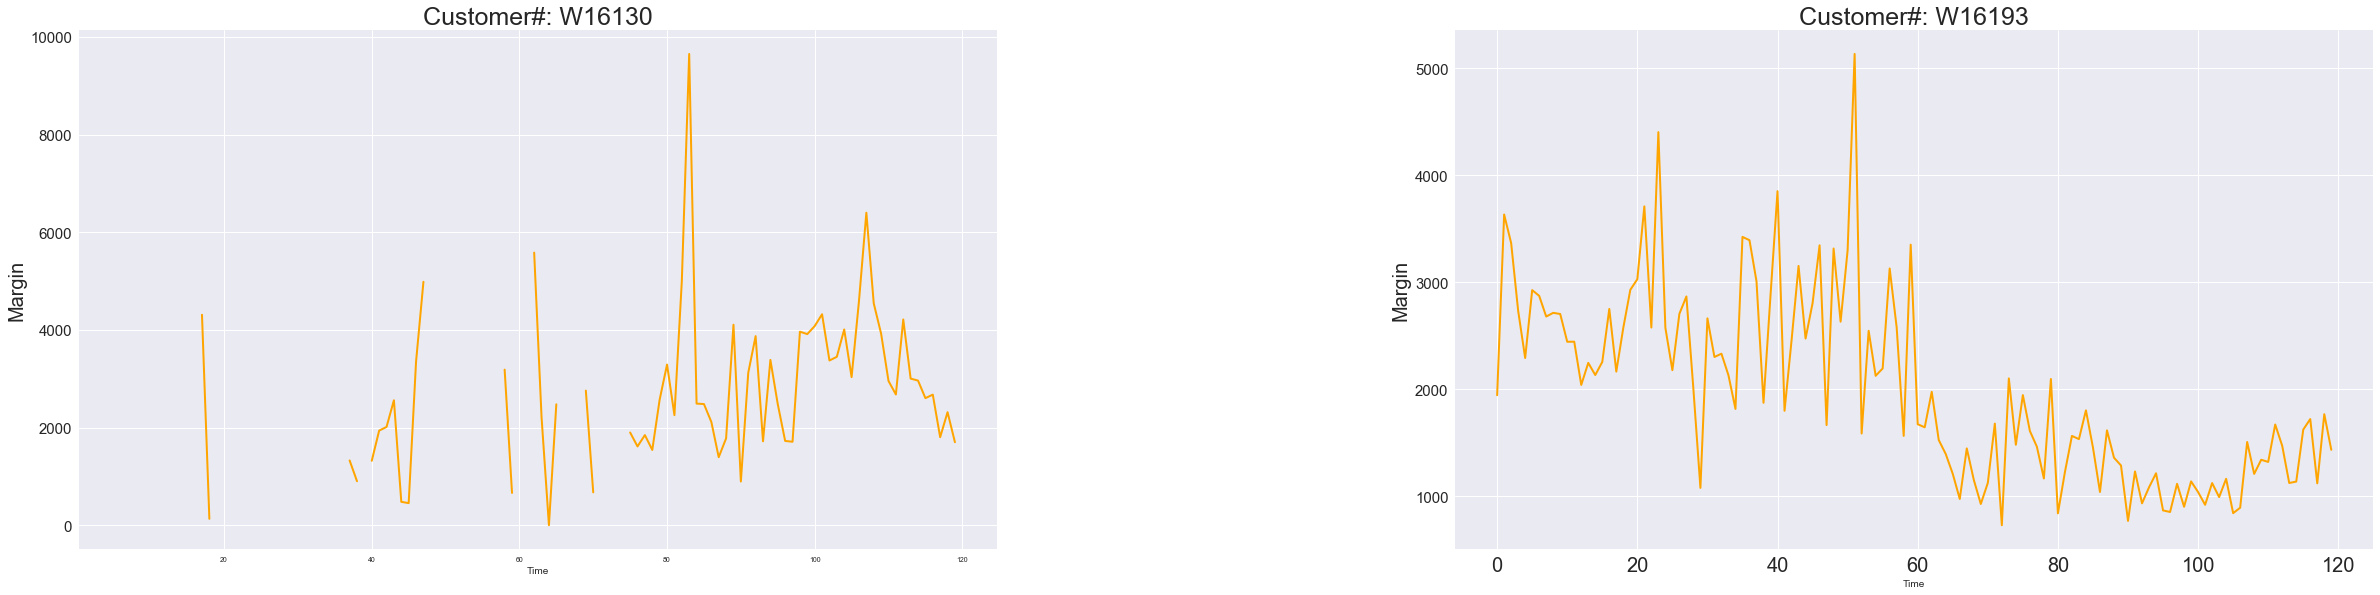

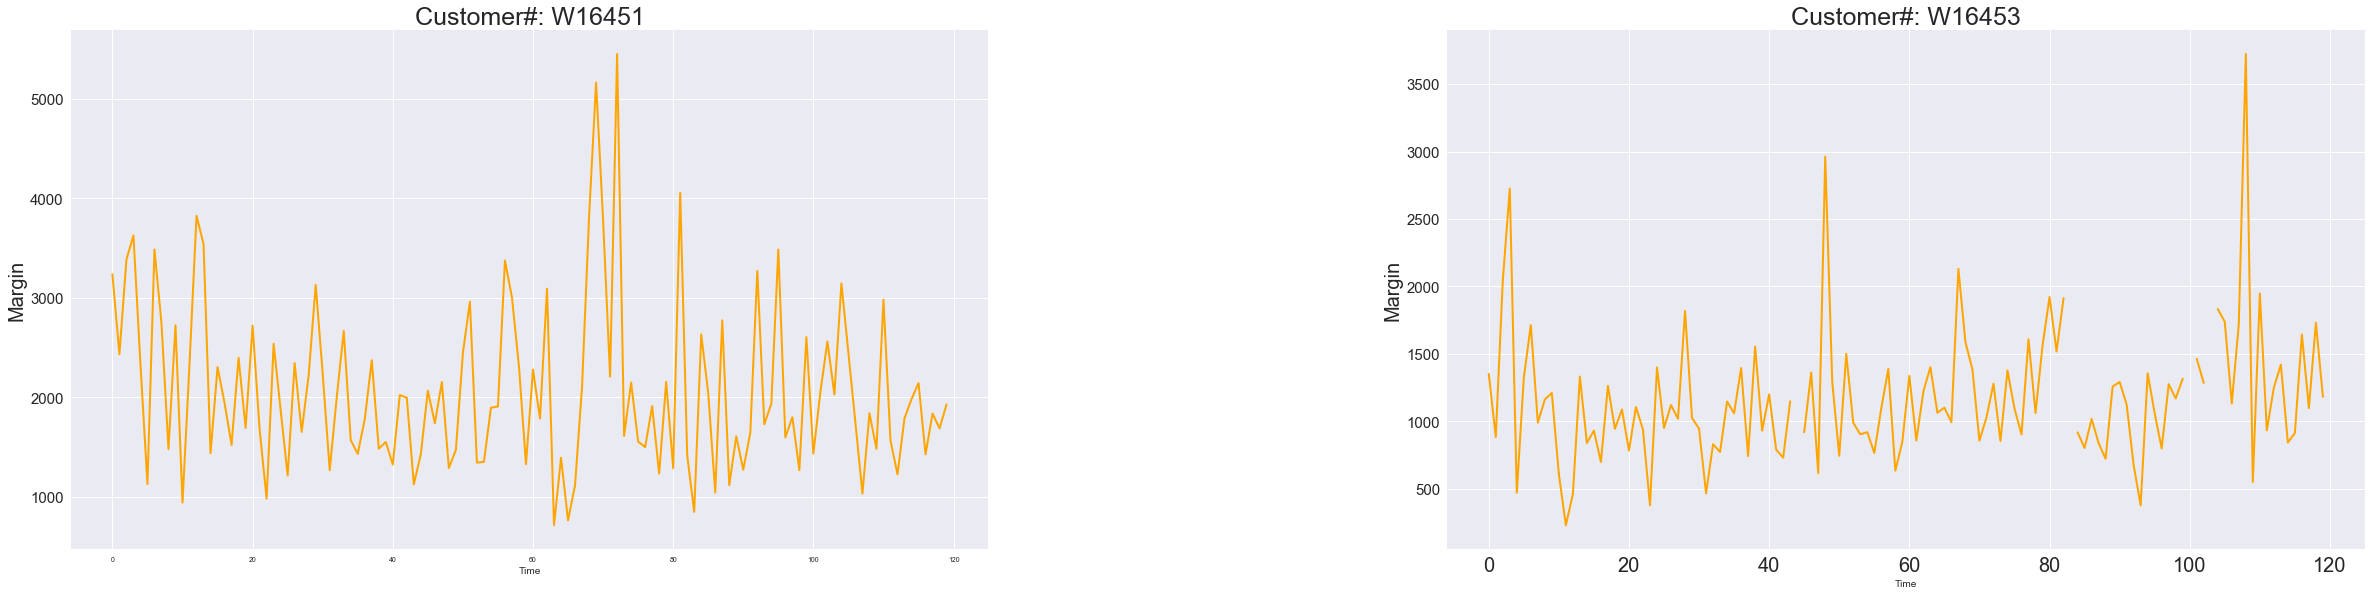

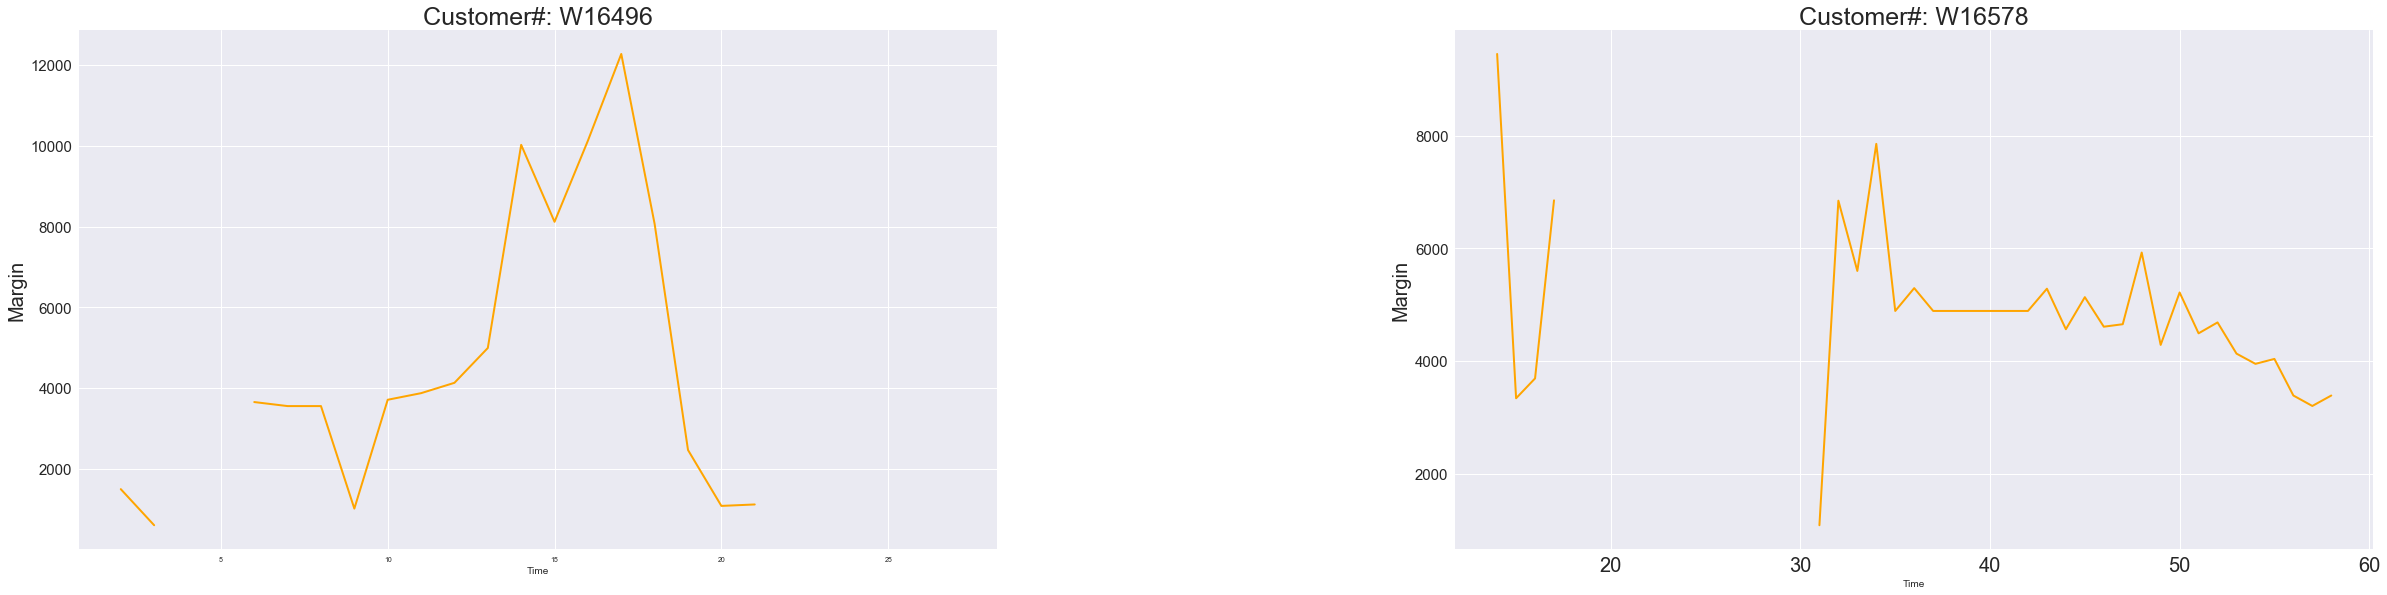

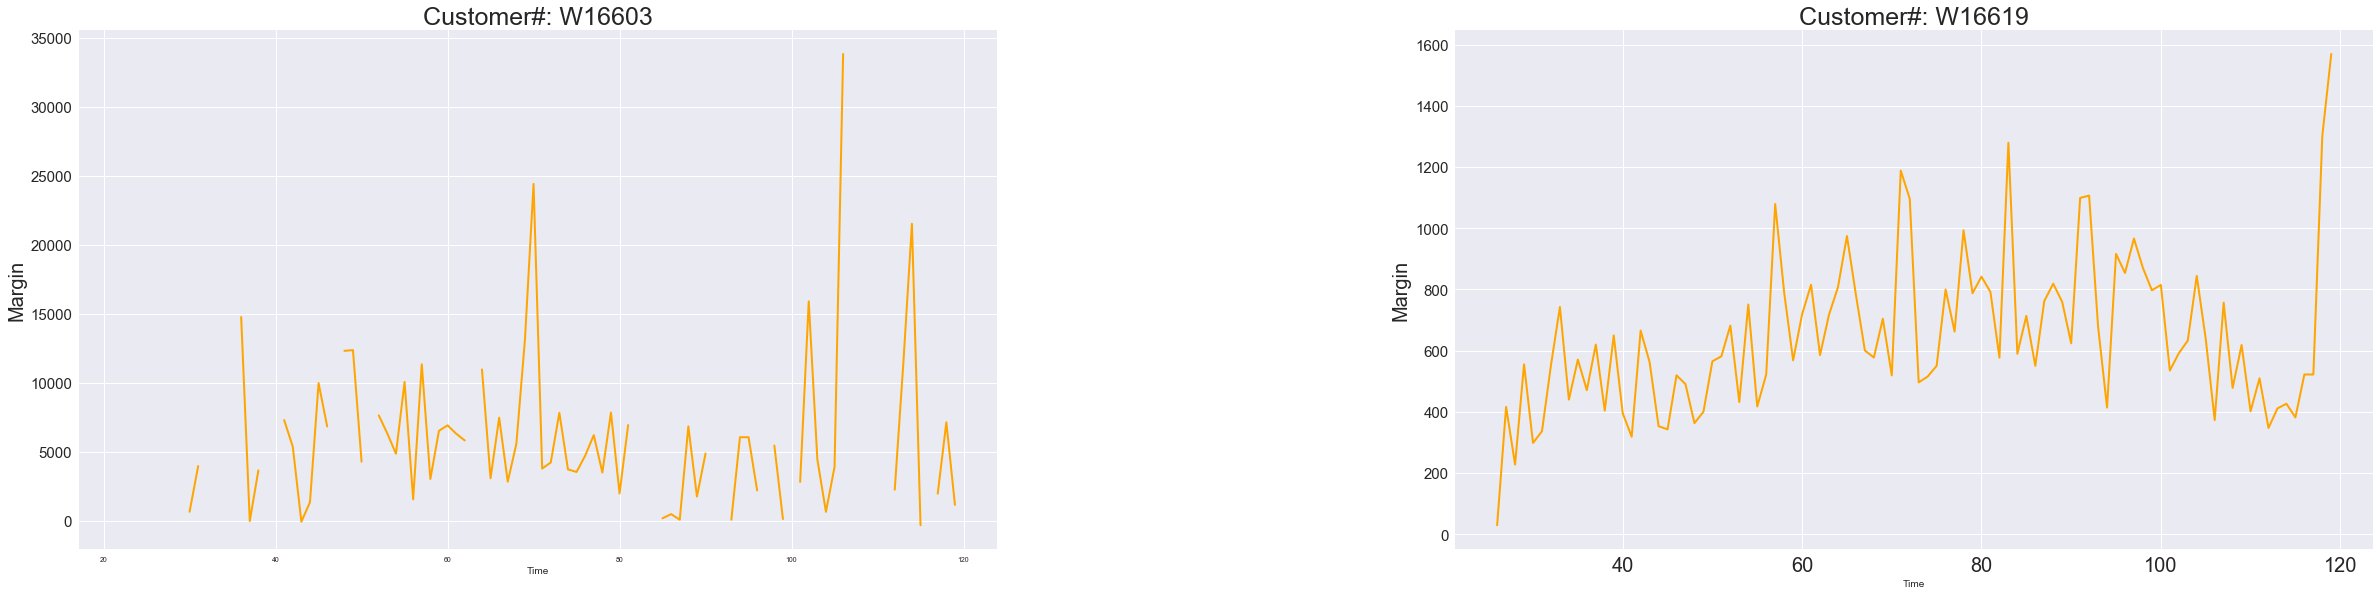

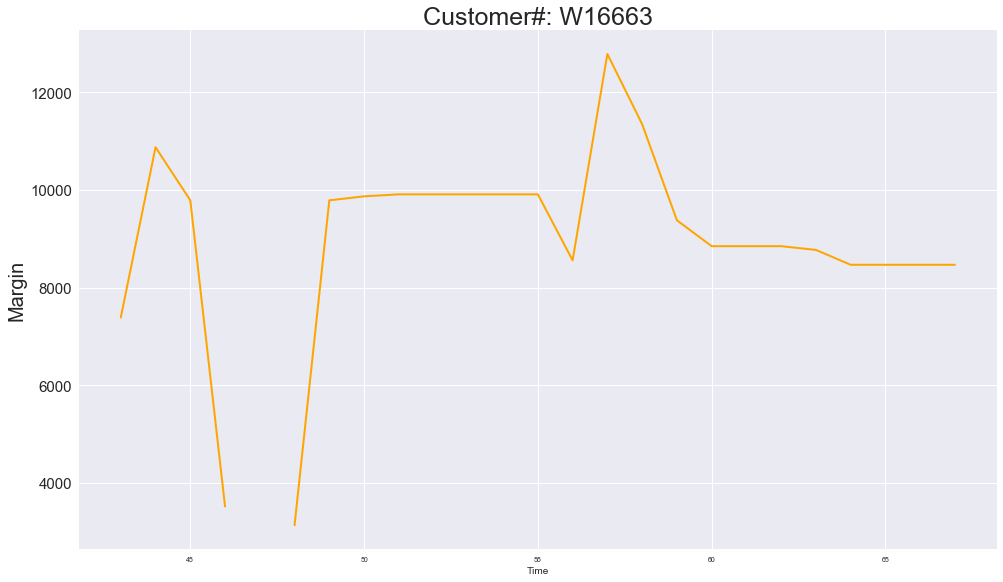

In [199]:

i=1
l=1
for col in topCustomersTable.columns:
    if col not in ['index', 'Year', 'Month']:
        if i<=2:
            #plt.figure(figsize=(10,4))
            plt.subplot(1,2,i)
            plt.plot(topCustomersTable[col],marker='', color='orange', linewidth=2)
            plt.xlabel('Time', size=10)
            plt.title('Customer#: ' + col, size=25)
            plt.ylabel('Margin', size=20)
            plt.xticks(size=20)
            plt.yticks(size=15)
            i = i + 1
            #if l >= 5:
            #    i = i + 1
            #    l = 1
            #l = l + 1
        else:

            plt.subplots_adjust(top=1, bottom=0.1, left=0.03, right=1.8, hspace=2, wspace=.5)
            plt.show()

            i=1
            plt.subplot(1,2,i)
            plt.plot(topCustomersTable[col],marker='', color='orange', linewidth=2)
            plt.xlabel('Time', size=10)
            plt.title('Customer#: ' + col, size=25)
            plt.ylabel('Margin', size=20)
            plt.xticks(size=7)
            plt.yticks(size=15)
            i = i + 1
            #if l >= 5:
            #    i = i + 1
            #    l = 1
            #l = l + 1


        

plt.subplots_adjust(top=1, bottom=0.1, left=0.03, right=1.8, hspace=2, wspace=.5)
plt.show() 

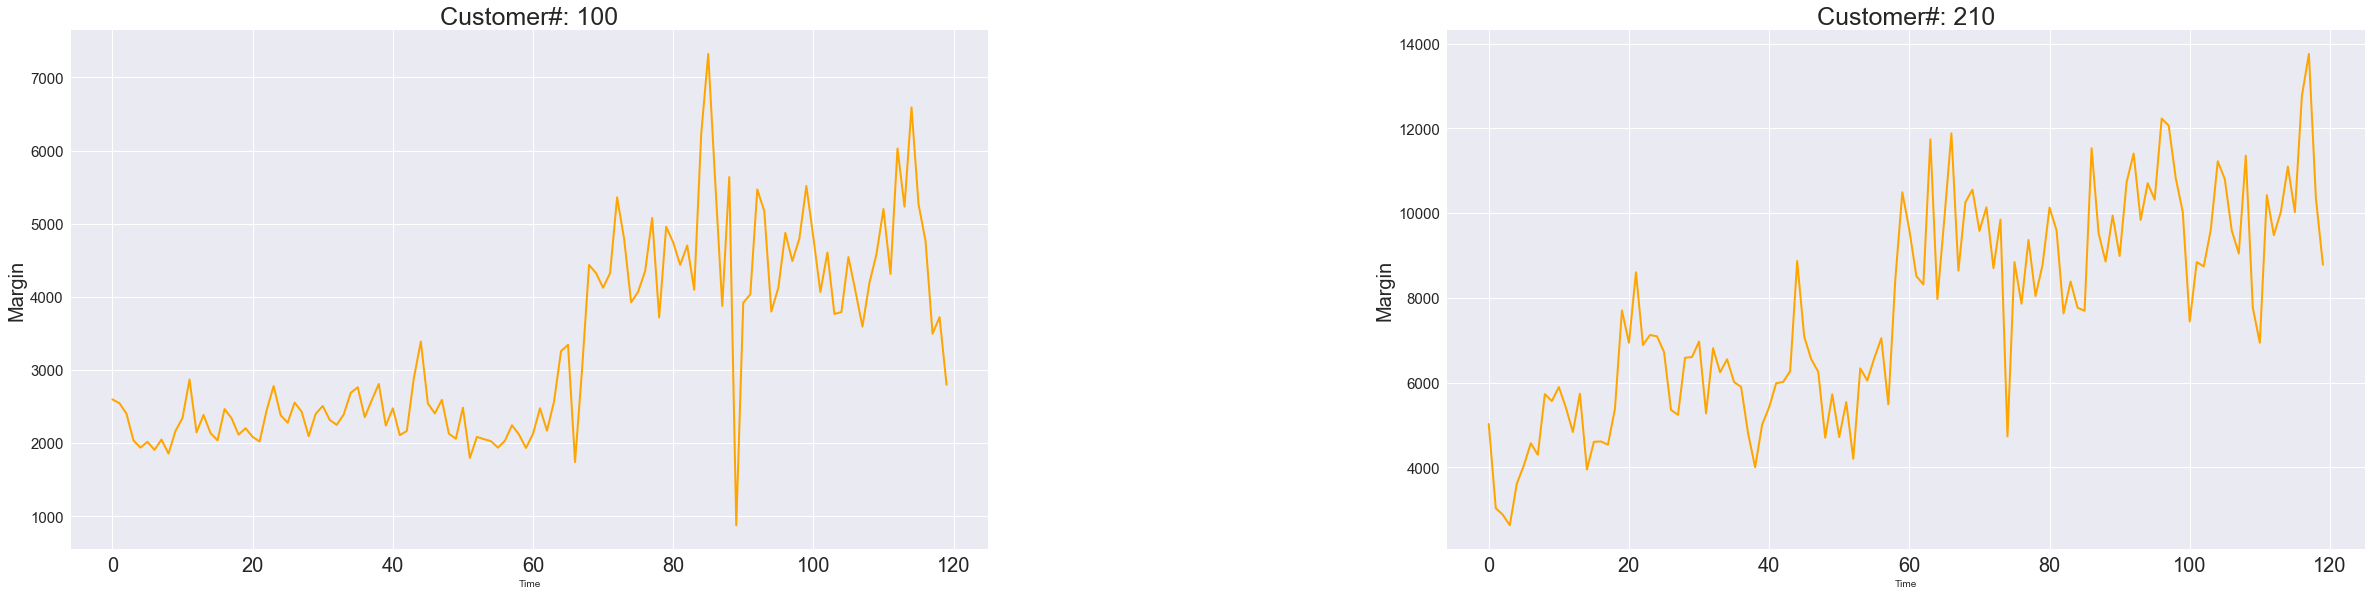

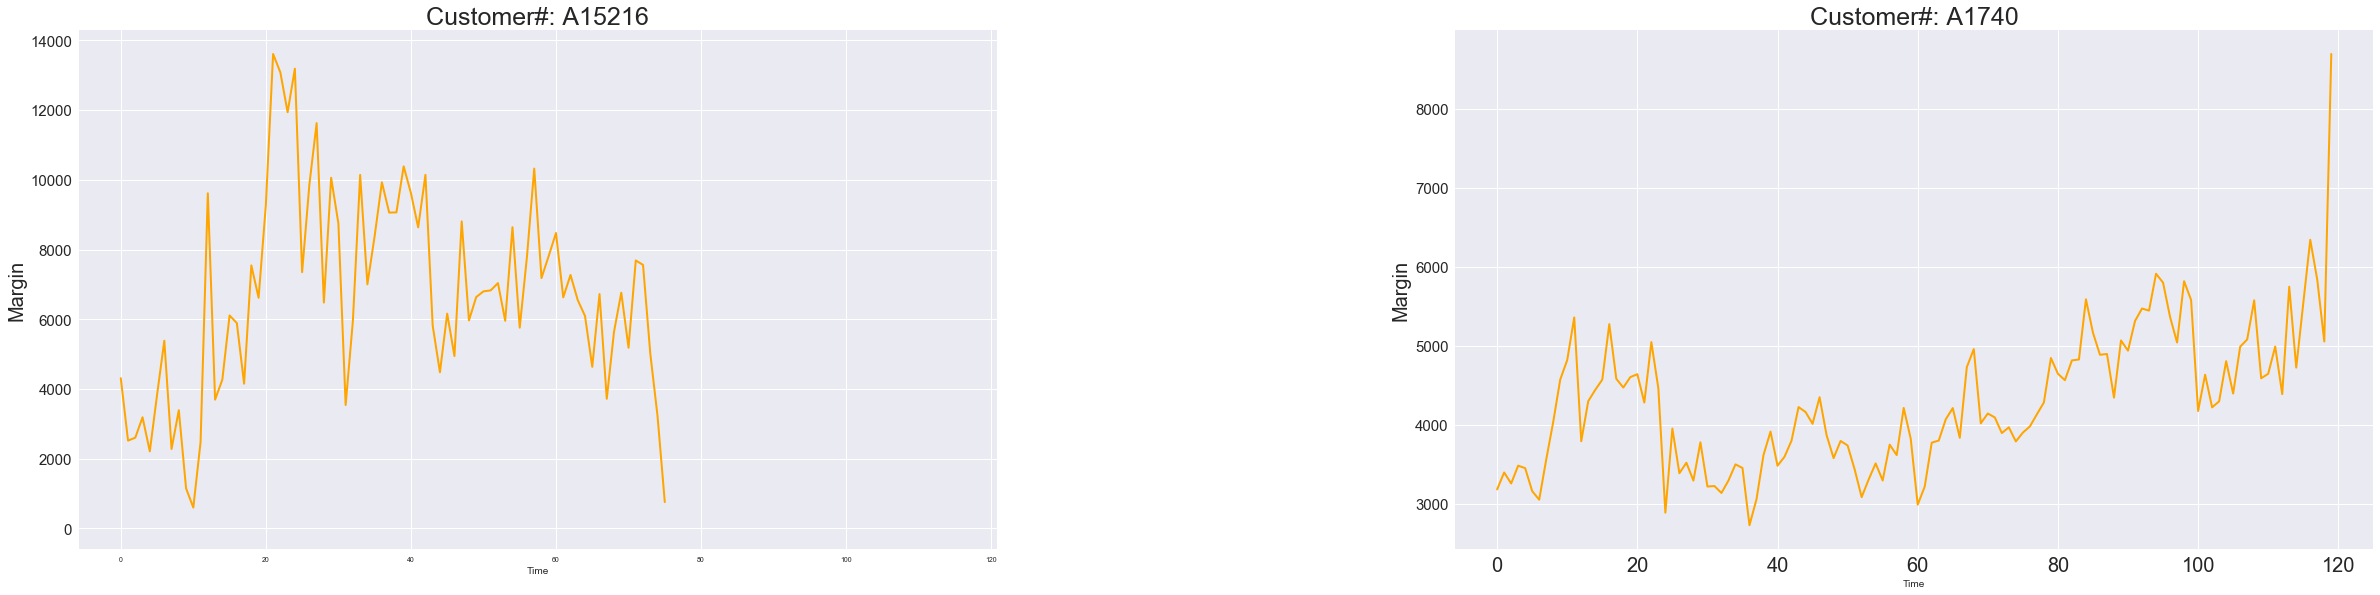

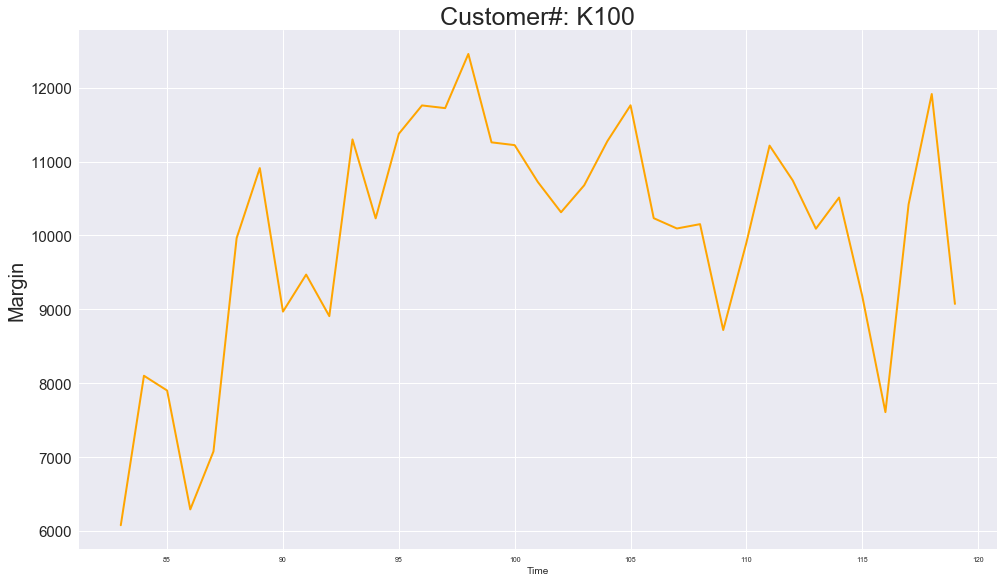

In [204]:

i=1
l=1
for col in topCustomersTable.columns:
    if col in ['210', 'A15216', 'A1740', 'K100', '100']:
        if i<=2:
            #plt.figure(figsize=(10,4))
            plt.subplot(1,2,i)
            plt.plot(topCustomersTable[col],marker='', color='orange', linewidth=2)
            plt.xlabel('Time', size=10)
            plt.title('Customer#: ' + col, size=25)
            plt.ylabel('Margin', size=20)
            plt.xticks(size=20)
            plt.yticks(size=15)
            i = i + 1
            #if l >= 5:
            #    i = i + 1
            #    l = 1
            #l = l + 1
        else:

            plt.subplots_adjust(top=1, bottom=0.1, left=0.03, right=1.8, hspace=2, wspace=.5)
            plt.show()

            i=1
            plt.subplot(1,2,i)
            plt.plot(topCustomersTable[col],marker='', color='orange', linewidth=2)
            plt.xlabel('Time', size=10)
            plt.title('Customer#: ' + col, size=25)
            plt.ylabel('Margin', size=20)
            plt.xticks(size=7)
            plt.yticks(size=15)
            i = i + 1
            #if l >= 5:
            #    i = i + 1
            #    l = 1
            #l = l + 1


        

plt.subplots_adjust(top=1, bottom=0.1, left=0.03, right=1.8, hspace=2, wspace=.5)
plt.show() 